## 1. 시작

In [1]:
import tensorflow as tf

C:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = tf.constant(30.0, tf.float32)
y = tf.constant(35.0)
xy= tf.add(x, y)

In [3]:
sess=tf.Session()

In [4]:
sess.run(xy)

65.0

In [5]:
x =tf.placeholder(tf.float32)
y =tf.placeholder(tf.float32)
add_node= x+y


In [6]:
print(sess.run(add_node,feed_dict={x:1, y:2}))
print(sess.run(add_node, feed_dict={x:[3,4,5, 6], y:[2,2, 2, 3]}))

3.0
[5. 6. 7. 9.]


# 2. Linear Regression

In [7]:
x_train = [1,2,3,4]
y_train = [3,5,7, 8]
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = x_train*W + b
cost = tf.reduce_mean(tf.square(hypothesis - y_train))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
ses = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001) :
    sess.run(train)
    if step % 20 ==0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 32.836075 [0.5426326] [-1.1821265]
20 0.7197261 [2.3090546] [-0.44812626]
40 0.62783766 [2.3175628] [-0.3197839]
60 0.56534183 [2.282755] [-0.21347603]
80 0.509922 [2.2488651] [-0.11373287]
100 0.4607662 [2.2169187] [-0.01980485]
120 0.41716582 [2.1868315] [0.06865576]
140 0.37849325 [2.1584954] [0.15196739]
160 0.34419185 [2.1318088] [0.2304298]
180 0.3137669 [2.1066754] [0.3043254]
200 0.28678083 [2.0830045] [0.3739199]
220 0.26284504 [2.0607116] [0.43946368]
240 0.24161407 [2.0397162] [0.5011924]
260 0.22278315 [2.019943] [0.55932814]
280 0.20608027 [2.0013206] [0.61408025]
300 0.19126521 [1.9837823] [0.6656454]
320 0.17812479 [1.9672647] [0.71420914]
340 0.16646916 [1.9517086] [0.7599462]
360 0.15613118 [1.9370579] [0.8030211]
380 0.14696153 [1.9232597] [0.8435889]
400 0.13882837 [1.910265] [0.8817954]
420 0.1316143 [1.8980266] [0.91777813]
440 0.12521544 [1.8865004] [0.95166636]
460 0.11954008 [1.875645] [0.98358214]
480 0.114506006 [1.8654217] [1.0136402]
500 0.11004107 [1.8557

In [ ]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))


# 3. cost function graph

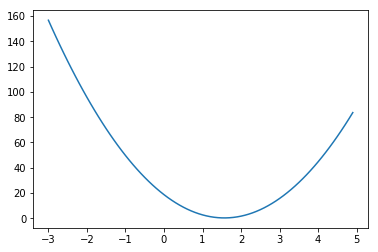

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

X = [1, 2, 3, 4]
Y = [2.3, 3.8, 4.5, 5.9]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()


# 4. Multi variable linear regression

In [10]:
# Lab 4 Multi-variable linear regression
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  9906.199 
Prediction:
 [[57.672665]
 [82.11399 ]
 [74.2933  ]
 [83.27143 ]
 [63.47494 ]]
10 Cost:  11.106576 
Prediction:
 [[145.6813 ]
 [187.87114]
 [178.50948]
 [196.75824]
 [144.13704]]
20 Cost:  10.966005 
Prediction:
 [[145.95955]
 [188.18297]
 [178.82854]
 [197.1037 ]
 [144.37091]]
30 Cost:  10.916243 
Prediction:
 [[145.97237]
 [188.17581]
 [178.83327]
 [197.10686]
 [144.3615 ]]
40 Cost:  10.866821 
Prediction:
 [[145.98428]
 [188.16766]
 [178.83698]
 [197.10892]
 [144.35135]]
50 Cost:  10.817602 
Prediction:
 [[145.9962 ]
 [188.15956]
 [178.84071]
 [197.11101]
 [144.34122]]
60 Cost:  10.768616 
Prediction:
 [[146.0081 ]
 [188.15147]
 [178.84444]
 [197.11308]
 [144.33113]]
70 Cost:  10.719934 
Prediction:
 [[146.01996]
 [188.14342]
 [178.84814]
 [197.11514]
 [144.32108]]
80 Cost:  10.6715145 
Prediction:
 [[146.03177]
 [188.13536]
 [178.85184]
 [197.1172 ]
 [144.31104]]
90 Cost:  10.623359 
Prediction:
 [[146.04356]
 [188.12735]
 [178.85555]
 [197.11928]
 [144.30104]]
1

990 Cost:  7.188099 
Prediction:
 [[146.98656]
 [187.48643]
 [179.15154]
 [197.27846]
 [143.50638]]
1000 Cost:  7.158438 
Prediction:
 [[146.99582]
 [187.48016]
 [179.15445]
 [197.27997]
 [143.49863]]
1010 Cost:  7.1288805 
Prediction:
 [[147.00507]
 [187.47388]
 [179.15735]
 [197.28146]
 [143.49089]]
1020 Cost:  7.099492 
Prediction:
 [[147.0143 ]
 [187.46762]
 [179.16028]
 [197.28299]
 [143.4832 ]]
1030 Cost:  7.0702295 
Prediction:
 [[147.02348]
 [187.46135]
 [179.16315]
 [197.28444]
 [143.4755 ]]
1040 Cost:  7.041173 
Prediction:
 [[147.03267]
 [187.45515]
 [179.16606]
 [197.28595]
 [143.46785]]
1050 Cost:  7.0122795 
Prediction:
 [[147.0418 ]
 [187.44893]
 [179.16891]
 [197.28741]
 [143.4602 ]]
1060 Cost:  6.9835052 
Prediction:
 [[147.05092]
 [187.44273]
 [179.17178]
 [197.2889 ]
 [143.45258]]
1070 Cost:  6.954909 
Prediction:
 [[147.06001]
 [187.43657]
 [179.17467]
 [197.29037]
 [143.44498]]
1080 Cost:  6.9264083 
Prediction:
 [[147.0691 ]
 [187.4304 ]
 [179.17752]
 [197.29182]


1930 Cost:  4.980767 
Prediction:
 [[147.75952]
 [186.96222]
 [179.39558]
 [197.39888]
 [142.86584]]
1940 Cost:  4.9626317 
Prediction:
 [[147.76678]
 [186.95734]
 [179.39789]
 [197.39996]
 [142.85991]]
1950 Cost:  4.9446135 
Prediction:
 [[147.77399]
 [186.95242]
 [179.40016]
 [197.40102]
 [142.85397]]
1960 Cost:  4.926652 
Prediction:
 [[147.7812 ]
 [186.94754]
 [179.40245]
 [197.40207]
 [142.84808]]
1970 Cost:  4.9088383 
Prediction:
 [[147.78838]
 [186.94267]
 [179.40472]
 [197.40314]
 [142.8422 ]]
1980 Cost:  4.8910837 
Prediction:
 [[147.79553]
 [186.9378 ]
 [179.40698]
 [197.40417]
 [142.8363 ]]
1990 Cost:  4.8734155 
Prediction:
 [[147.8027 ]
 [186.93298]
 [179.40927]
 [197.40524]
 [142.83047]]
2000 Cost:  4.8558493 
Prediction:
 [[147.80983]
 [186.92816]
 [179.41151]
 [197.40627]
 [142.82463]]


# 5. Logistic Regression Classifier

In [11]:
# Lab 5 Logistic Regression Classifier
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)


0 5.371324
200 0.532556
400 0.48621842
600 0.44627488
800 0.41059008
1000 0.3793148
1200 0.35240468
1400 0.32961607
1600 0.31053942
1800 0.29465792
2000 0.2814162
2200 0.27028087
2400 0.2607824
2600 0.25253406
2800 0.24523407
3000 0.23865603
3200 0.23263477
3400 0.22705211
3600 0.22182415
3800 0.21689105
4000 0.21221016
4200 0.20775001
4400 0.2034872
4600 0.19940358
4800 0.19548482
5000 0.191719
5200 0.18809597
5400 0.18460715
5600 0.18124487
5800 0.17800212
6000 0.17487252
6200 0.17185037
6400 0.16893029
6600 0.16610731
6800 0.16337682
7000 0.16073431
7200 0.15817595
7400 0.15569766
7600 0.15329595
7800 0.15096743
8000 0.14870884
8200 0.14651716
8400 0.14438951
8600 0.14232321
8800 0.14031573
9000 0.13836466
9200 0.13646765
9400 0.1346225
9600 0.13282724
9800 0.13107984
10000 0.12937838

Hypothesis:  [[0.02274872]
 [0.1463214 ]
 [0.26406255]
 [0.8007133 ]
 [0.951108  ]
 [0.9841098 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


# 6. Softmax Classifier

In [12]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('c:\\anaconda\pytfworks\data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))


(101, 16) (101, 1)
one_hot Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Step:     0	Loss: 3.999	Acc: 4.95%
Step:   100	Loss: 0.763	Acc: 75.25%
Step:   200	Loss: 0.425	Acc: 85.15%
Step:   300	Loss: 0.301	Acc: 93.07%
Step:   400	Loss: 0.236	Acc: 94.06%
Step:   500	Loss: 0.195	Acc: 96.04%
Step:   600	Loss: 0.166	Acc: 96.04%
Step:   700	Loss: 0.144	Acc: 96.04%
Step:   800	Loss: 0.128	Acc: 99.01%
Step:   900	Loss: 0.115	Acc: 100.00%
Step:  1000	Loss: 0.104	Acc: 100.00%
Step:  1100	Loss: 0.095	Acc: 100.00%
Step:  1200	Loss: 0.088	Acc: 100.00%
Step:  1300	Loss: 0.082	Acc: 100.00%
Step:  1400	Loss: 0.076	Acc: 100.00%
Step:  1500	Loss: 0.071	Acc: 100.00%
Step:  1600	Loss: 0.067	Acc: 100.00%
Step:  1700	Loss: 0.064	Acc: 100.00%
Step:  1800	Loss

# 7. Learning rate and Evaluation

In [13]:
# Lab 7 Learning rate and Evaluation :  lab-07-1-learning_rate_and_evaluation.py

import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Try to change learning_rate to small numbers : learning_rate=1e-10 or learning_rate=0.1
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

    
    ## the result depend on learning rate 

Instructions for updating:
Use `argmax` instead
0 8.426722 [[ 0.22286522  0.346946    1.0441211 ]
 [-2.0489273   0.46896315 -1.4782763 ]
 [-1.9395945  -1.5496699  -0.75848466]]
1 6.4358354 [[ 0.24785349  0.29352248  1.0725564 ]
 [-1.8864516   0.22605495 -1.3978438 ]
 [-1.7771114  -1.7585939  -0.7120437 ]]
2 4.826496 [[ 0.27280873  0.25245547  1.0886681 ]
 [-1.7240484   0.01960504 -1.3537971 ]
 [-1.6146815  -1.9158356  -0.71723187]]
3 3.722249 [[ 0.29766205  0.23217614  1.0840942 ]
 [-1.5618856  -0.08940256 -1.4069521 ]
 [-1.4524415  -1.973389   -0.8219186 ]]
4 2.8876715 [[ 0.32218257  0.21336822  1.0783815 ]
 [-1.4006153  -0.19161287 -1.4660121 ]
 [-1.2911255  -2.0250003  -0.93162304]]
5 2.071945 [[ 0.34507075  0.194765    1.0740966 ]
 [-1.2448843  -0.2943132  -1.5190428 ]
 [-1.1361517  -2.0780182  -1.0335791 ]]
6 1.3883393 [[ 0.35723603  0.18224181  1.0744544 ]
 [-1.1386445  -0.36525193 -1.5543439 ]
 [-1.0347837  -2.1012714  -1.1116939 ]]
7 1.222593 [[ 0.34475818  0.1829968   1.086177

147 0.61010087 [[-0.42734557 -0.02169005  2.0629673 ]
 [-0.88002574 -1.0748596  -1.1033543 ]
 [-1.0355133  -1.2177187  -1.9945161 ]]
148 0.60926914 [[-0.4314837  -0.02217611  2.0675914 ]
 [-0.87986207 -1.0746886  -1.1036892 ]
 [-1.0340337  -1.2175083  -1.9962062 ]]
149 0.60844326 [[-0.43561238 -0.02265381  2.072198  ]
 [-0.87970024 -1.074513   -1.1040266 ]
 [-1.0325555  -1.2173069  -1.9978858 ]]
150 0.6076225 [[-0.4397319  -0.02312312  2.0767868 ]
 [-0.8795409  -1.0743326  -1.1043662 ]
 [-1.0310793  -1.2171135  -1.9995553 ]]
151 0.6068073 [[-0.44384217 -0.02358421  2.0813582 ]
 [-0.8793833  -1.0741483  -1.1047081 ]
 [-1.0296046  -1.2169285  -2.001215  ]]
152 0.60599685 [[-0.44794342 -0.02403701  2.0859122 ]
 [-0.87922823 -1.0739595  -1.1050521 ]
 [-1.0281321  -1.2167509  -2.002865  ]]
153 0.6051918 [[-0.4520356  -0.02448175  2.090449  ]
 [-0.8790748  -1.0737671  -1.1053979 ]
 [-1.0266612  -1.2165812  -2.0045056 ]]
154 0.6043921 [[-0.4561189  -0.02491837  2.094969  ]
 [-0.87892354 -1.07

# 7-1 mnist plot

In [ ]:
# Lab 7 Learning rate and Evaluation lab-07-4-mnist_introduction.py 
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28,
                                                  28), cmap='Greys', interpolation='nearest')
    plt.show()


In [15]:
## tensorBoard execution using  Lab 9 XOR
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.01

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope("layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    w1_hist = tf.summary.histogram("weights1", W1)  # record summary.histogram with W1
    b1_hist = tf.summary.histogram("biases1", b1)   # record summary.histogram with b1
    layer1_hist = tf.summary.histogram("layer1", layer1)  # record summary.histogram with layer1


with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)   # record summary.histogram with W2
    b2_hist = tf.summary.histogram("biases2", b2)    # record summary.histogram with b2
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis) # record summarry hypothesis

# cost/loss function
with tf.name_scope("cost"):
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)   # record summary.scala with cost

with tf.name_scope("train"):
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# Launch graph



with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()  # 2. merge all summaries 
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # 3. create writer and add graph   

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)    # 4. run summary 

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.89828086 [array([[-0.06017455,  0.6584375 ],
       [-0.73422843,  1.6871994 ]], dtype=float32), array([[1.531455  ],
       [0.02436116]], dtype=float32)]
100 0.6933994 [array([[-0.22361112, -0.6170694 ],
       [-0.9105946 ,  1.7131828 ]], dtype=float32), array([[ 1.039152  ],
       [-0.45188373]], dtype=float32)]
200 0.66034174 [array([[-0.06848177, -2.2852993 ],
       [-0.5004391 ,  3.7878835 ]], dtype=float32), array([[ 0.97544706],
       [-0.6945513 ]], dtype=float32)]
300 0.60432804 [array([[-0.25108758, -3.6733363 ],
       [ 0.22033185,  5.295916  ]], dtype=float32), array([[ 1.1556832],
       [-1.2406421]], dtype=float32)]
400 0.5395156 [array([[-0.75027823, -4.841096  ],
       [ 0.8212345 ,  6.4559083 ]], dtype=float32), array([[ 1.6118901],
       [-1.9291155]], dtype=float32)]
500 0.42416477 [array([[-2.1204572, -5.8261194],
       [ 1.5682781,  7.3436894]], dtype=float32), array([[ 2.4977994],
       [-2.5723727]], dtype=float32)]
600 0.2498789 [array([[-3.673568

5300 0.0016795916 [array([[ -9.055116, -11.031449],
       [  8.718039,  12.493417]], dtype=float32), array([[ 13.579139],
       [-12.689244]], dtype=float32)]
5400 0.001588414 [array([[ -9.088572, -11.064337],
       [  8.751229,  12.526902]], dtype=float32), array([[ 13.6877985],
       [-12.799321 ]], dtype=float32)]
5500 0.0015026783 [array([[ -9.121573, -11.096789],
       [  8.783966,  12.559949]], dtype=float32), array([[ 13.795867],
       [-12.908776]], dtype=float32)]
5600 0.00142198 [array([[ -9.154144, -11.128831],
       [  8.81627 ,  12.59257 ]], dtype=float32), array([[ 13.9033785],
       [-13.017642 ]], dtype=float32)]
5700 0.0013460342 [array([[ -9.186298, -11.160477],
       [  8.848152,  12.624786]], dtype=float32), array([[ 14.010359],
       [-13.125952]], dtype=float32)]
5800 0.0012745413 [array([[ -9.218056, -11.191742],
       [  8.879637,  12.656614]], dtype=float32), array([[ 14.116842],
       [-13.233741]], dtype=float32)]
5900 0.0012070825 [array([[ -9.24

In [1]:
# Lab 10 MNIST and NN
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

C:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch: 0001 cost = 142.446750370
Epoch: 0002 cost = 38.833989278
Epoch: 0003 cost = 24.367315463
Epoch: 0004 

# 8. MNIST and Xavier

In [2]:
# Lab 10 MNIST and Xavier
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.315138441
Epoch: 0002 cost = 0.116047593
Epoch: 0003 cost = 0.076327937
Epoch: 0004 cost = 0.054819790
Epoch: 0005 cost = 0.041191782
Epoch: 0006 cost = 0.030668411
Epoch: 0007 cost = 0.024590356
Epoch: 0008 cost = 0.020486503
Epoch: 0009 cost = 0.015752085
Epoch: 0010 cost = 0.014208534
Epoch: 0011 cost = 0.011227465
Epoch: 0012 cost = 0.013202520
Epoch: 0013 cost = 0.010413583
Epoch: 0014 cost = 0.011803038
Epoch: 0015 cost = 0.007710957
Learning Finished!
Accuracy: 0.9795
Label:  [3]
Prediction:  [3]


# 8. MNIST and Deep learning

In [3]:
# Lab 10 MNIST and Deep learning
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


# 9. MNIST and Convolutional Neural Network

In [4]:
# Lab 10 MNIST and Convolutional Neural Network
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
'''

# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


ValueError: Variable W3 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


# 10. RNN

In [5]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

tf.set_random_seed(777)  # reproducibility

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape


# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)

# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), l)

# Let's print the last char of each result to check it works
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

3 8            2.9350348
3 9   o        2.9350348
3 10  oo        2.9350348
3 11 ooo        2.9350348
3 12   o        2.9350348
3 13  o         2.9350348
3 14 o          2.9350348
3 15            2.9350348
3 16            2.9350348
3 17   o        2.9350348
3 18   o        2.9350348
3 19  oo        2.9350348
3 20 o o        2.9350348
3 21            2.9350348
3 22 o          2.9350348
3 23            2.9350348
3 24            2.9350348
3 25            2.9350348
3 26            2.9350348
3 27  oo        2.9350348
3 28 ooo        2.9350348
3 29            2.9350348
3 30            2.9350348
3 31            2.9350348
3 32   o        2.9350348
3 33  oo        2.9350348
3 34 ooo        2.9350348
3 35            2.9350348
3 36            2.9350348
3 37            2.9350348
3 38            2.9350348
3 39 o          2.9350348
3 40            2.9350348
3 41            2.9350348
3 42 o          2.9350348
3 43            2.9350348
3 44            2.9350348
3 45            2.9350348
3 46          

5 43   nnnnnnnn 2.9986308
5 44   nnnnnnnn 2.9986308
5 45   nnnnnnnn 2.9986308
5 46   nnnnnnnn 2.9986308
5 47   nnnnnnnn 2.9986308
5 48   nnnnnnnn 2.9986308
5 49   nnnnnnnn 2.9986308
5 50   nnnnnnnn 2.9986308
5 51   nnnnnnnn 2.9986308
5 52   nnnnnnnn 2.9986308
5 53   nnnnnnnn 2.9986308
5 54   nnnnnnnn 2.9986308
5 55   nnnnnnnn 2.9986308
5 56   nnnnnnnn 2.9986308
5 57   nnnnnnnn 2.9986308
5 58   nnnnnnnn 2.9986308
5 59   nnnnnnnn 2.9986308
5 60   nnnnnnnn 2.9986308
5 61   nnnnnnna 2.9986308
5 62   nnnnnnan 2.9986308
5 63   nnnnnnnn 2.9986308
5 64   nnnnnnnn 2.9986308
5 65   nnnnnnnn 2.9986308
5 66   nnannnnn 2.9986308
5 67   nnnnnnnn 2.9986308
5 68   nnnnnnnn 2.9986308
5 69   nnnnnnnn 2.9986308
5 70   nnnnnnnn 2.9986308
5 71   nnnnnnnn 2.9986308
5 72   nnnnnnnn 2.9986308
5 73   nnnnnnnn 2.9986308
5 74   nnnnnnnn 2.9986308
5 75   nnnnnnnn 2.9986308
5 76    nnnnnnn 2.9986308
5 77    nnnnnnn 2.9986308
5 78   nnnnnnnn 2.9986308
5 79   nnnnnnnn 2.9986308
5 80   nnnnnnnn 2.9986308
5 81   nnnnn

7 78            2.892479
7 79            2.892479
7 80            2.892479
7 81            2.892479
7 82            2.892479
7 83            2.892479
7 84            2.892479
7 85            2.892479
7 86            2.892479
7 87            2.892479
7 88            2.892479
7 89            2.892479
7 90            2.892479
7 91            2.892479
7 92            2.892479
7 93            2.892479
7 94            2.892479
7 95            2.892479
7 96            2.892479
7 97            2.892479
7 98            2.892479
7 99            2.892479
7 100            2.892479
7 101            2.892479
7 102            2.892479
7 103            2.892479
7 104            2.892479
7 105            2.892479
7 106            2.892479
7 107            2.892479
7 108            2.892479
7 109            2.892479
7 110            2.892479
7 111            2.892479
7 112            2.892479
7 113            2.892479
7 114            2.892479
7 115            2.892479
7 116            2.892479
7 117   

9 113            2.8353553
9 114            2.8353553
9 115            2.8353553
9 116            2.8353553
9 117            2.8353553
9 118            2.8353553
9 119            2.8353553
9 120            2.8353553
9 121            2.8353553
9 122            2.8353553
9 123            2.8353553
9 124            2.8353553
9 125            2.8353553
9 126            2.8353553
9 127            2.8353553
9 128            2.8353553
9 129            2.8353553
9 130            2.8353553
9 131            2.8353553
9 132            2.8353553
9 133            2.8353553
9 134            2.8353553
9 135            2.8353553
9 136            2.8353553
9 137            2.8353553
9 138            2.8353553
9 139            2.8353553
9 140            2.8353553
9 141            2.8353553
9 142            2.8353553
9 143            2.8353553
9 144            2.8353553
9 145            2.8353553
9 146            2.8353553
9 147            2.8353553
9 148            2.8353553
9 149            2.8353553
9

11 148            2.823114
11 149            2.823114
11 150            2.823114
11 151            2.823114
11 152            2.823114
11 153            2.823114
11 154            2.823114
11 155            2.823114
11 156            2.823114
11 157            2.823114
11 158            2.823114
11 159            2.823114
11 160            2.823114
11 161            2.823114
11 162            2.823114
11 163            2.823114
11 164            2.823114
11 165            2.823114
11 166            2.823114
11 167            2.823114
11 168            2.823114
11 169            2.823114
12 0            2.8083162
12 1            2.8083162
12 2            2.8083162
12 3            2.8083162
12 4            2.8083162
12 5            2.8083162
12 6            2.8083162
12 7            2.8083162
12 8            2.8083162
12 9            2.8083162
12 10            2.8083162
12 11            2.8083162
12 12            2.8083162
12 13            2.8083162
12 14            2.8083162
12 15      

14 12            2.7448246
14 13            2.7448246
14 14            2.7448246
14 15            2.7448246
14 16            2.7448246
14 17            2.7448246
14 18            2.7448246
14 19            2.7448246
14 20            2.7448246
14 21            2.7448246
14 22            2.7448246
14 23            2.7448246
14 24            2.7448246
14 25            2.7448246
14 26            2.7448246
14 27            2.7448246
14 28            2.7448246
14 29            2.7448246
14 30            2.7448246
14 31            2.7448246
14 32            2.7448246
14 33            2.7448246
14 34            2.7448246
14 35            2.7448246
14 36            2.7448246
14 37            2.7448246
14 38            2.7448246
14 39            2.7448246
14 40            2.7448246
14 41            2.7448246
14 42            2.7448246
14 43            2.7448246
14 44            2.7448246
14 45            2.7448246
14 46            2.7448246
14 47            2.7448246
14 48            2.7448246
1

16 47   oo   o   2.6749299
16 48  oo   o    2.6749299
16 49 oo   o   t 2.6749299
16 50 o   o   to 2.6749299
16 51    o   to  2.6749299
16 52   o   to o 2.6749299
16 53  o   to oo 2.6749299
16 54 o   to oo  2.6749299
16 55    to oo   2.6749299
16 56   to oo    2.6749299
16 57  to oo     2.6749299
16 58 oo oo    o 2.6749299
16 59 o to    oo 2.6749299
16 60  to    ooo 2.6749299
16 61 oo    oooo 2.6749299
16 62 o    ooooo 2.6749299
16 63     ooooo  2.6749299
16 64    ooooo   2.6749299
16 65   ooooo  o 2.6749299
16 66  ooooo  o  2.6749299
16 67 ooooo  o   2.6749299
16 68 oooo  o    2.6749299
16 69 ooo  o   o 2.6749299
16 70 o   o   oo 2.6749299
16 71    o   oo  2.6749299
16 72   o   oo   2.6749299
16 73 oo   oo    2.6749299
16 74 o   oo   o 2.6749299
16 75    to   oo 2.6749299
16 76   oo   oo  2.6749299
16 77 ooo   oo   2.6749299
16 78 oo   oo    2.6749299
16 79 o   oo     2.6749299
16 80    oo      2.6749299
16 81   oo       2.6749299
16 82  oo        2.6749299
16 83 oo       o 2.6749299
1

18 82 too        2.5960808
18 83 oo       o 2.5960808
18 84 o       o  2.5960808
18 85        o   2.5960808
18 86       o    2.5960808
18 87      o   t 2.5960808
18 88    to   to 2.5960808
18 89   to   to  2.5960808
18 90  to   to   2.5960808
18 91 oo   to    2.5960808
18 92 o   to     2.5960808
18 93    to      2.5960808
18 94   to       2.5960808
18 95  to        2.5960808
18 96 oo         2.5960808
18 97 o        t 2.5960808
18 98         to 2.5960808
18 99        too 2.5960808
18 100   t   to   2.5960808
18 101  t   to    2.5960808
18 102 o   to     2.5960808
18 103    to    t 2.5960808
18 104   ooo   to 2.5960808
18 105 oooo   to  2.5960808
18 106 ooo   to   2.5960808
18 107 o    to  o 2.5960808
18 108     to  oo 2.5960808
18 109    to  oo  2.5960808
18 110   to  oo   2.5960808
18 111  to  oo    2.5960808
18 112 oo  oo     2.5960808
18 113 t  oo      2.5960808
18 114   oo     t 2.5960808
18 115 ooo     to 2.5960808
18 116 oo     too 2.5960808
18 117       too  2.5960808
18 118    

20 117     t too  2.4985838
20 118    t too   2.4985838
20 119 o   too    2.4985838
20 120    too   t 2.4985838
20 121   too   to 2.4985838
20 122  too t to  2.4985838
20 123 ooo t to t 2.4985838
20 124 oo   to t  2.4985838
20 125     to t t 2.4985838
20 126    to t to 2.4985838
20 127 o to t to  2.4985838
20 128  to t to t 2.4985838
20 129 oo t to to 2.4985838
20 130 o   to to  2.4985838
20 131    to to   2.4985838
20 132   to to    2.4985838
20 133  to to   t 2.4985838
20 134 oo to   to 2.4985838
20 135 o to   to  2.4985838
20 136  to   to   2.4985838
20 137 oo   to  t 2.4985838
20 138     to  to 2.4985838
20 139    to  to  2.4985838
20 140   to  to t 2.4985838
20 141  to  to to 2.4985838
20 142 oo  to too 2.4985838
20 143 o  to too  2.4985838
20 144   to too   2.4985838
20 145  to too    2.4985838
20 146 oo too     2.4985838
20 147 o  oo      2.4985838
20 148   oo       2.4985838
20 149  oo      t 2.4985838
20 150 oo      t  2.4985838
20 151        t   2.4985838
20 152       t    2.

23 0   to  to   2.305891
23 1 ooo  to    2.305891
23 2 too to   t 2.305891
23 3 o  to   to 2.305891
23 4   to   to  2.305891
23 5  to   to t 2.305891
23 6 to   to to 2.305891
23 7 o   to to  2.305891
23 8    to to   2.305891
23 9   to to    2.305891
23 10 ooo to     2.305891
23 11 to to    t 2.305891
23 12 o to    t  2.305891
23 13  to    t t 2.305891
23 14 to    t t  2.305891
23 15 t    t t   2.305891
23 16     t t    2.305891
23 17    t t     2.305891
23 18   t t      2.305891
23 19 oo t     t 2.305891
23 20 t t     to 2.305891
23 21  t     to  2.305891
23 22 t     to   2.305891
23 23      to  t 2.305891
23 24     to  to 2.305891
23 25    to  too 2.305891
23 26   to  tooo 2.305891
23 27  to  toooo 2.305891
23 28 to  toooo  2.305891
23 29 o  toooo   2.305891
23 30   toooo  t 2.305891
23 31  toooo  t  2.305891
23 32 toooo  t   2.305891
23 33 oooo  t  t 2.305891
23 34 too  t  t  2.305891
23 35 o   t  t   2.305891
23 36    t  t    2.305891
23 37   t  t     2.305891
23 38  t  t      2.305

25 17    t t     2.1596556
25 18   t t      2.1596556
25 19  o t     t 2.1596556
25 20 t t     to 2.1596556
25 21  t     to  2.1596556
25 22 t     to   2.1596556
25 23      to  t 2.1596556
25 24     to  to 2.1596556
25 25    to  too 2.1596556
25 26   to  tooo 2.1596556
25 27  to  toooo 2.1596556
25 28 to  tooooe 2.1596556
25 29    tooooe  2.1596556
25 30   tooooe t 2.1596556
25 31  tooooe te 2.1596556
25 32  ooooe te  2.1596556
25 33 ooooe te t 2.1596556
25 34 tooe te t  2.1596556
25 35     te t o 2.1596556
25 36    te t o  2.1596556
25 37   te t o   2.1596556
25 38  te t o    2.1596556
25 39 te too     2.1596556
25 40   t o    t 2.1596556
25 41  t h    to 2.1596556
25 42 toh    to  2.1596556
25 43       to   2.1596556
25 44      to    2.1596556
25 45     to   h 2.1596556
25 46    to   he 2.1596556
25 47   to   oe  2.1596556
25 48  to   oe   2.1596556
25 49 to   oe  t 2.1596556
25 50 o   oe  to 2.1596556
25 51    oe  to  2.1596556
25 52   he  to t 2.1596556
25 53  he  to to 2.1596556
2

28 0   to eton  1.8855228
28 1  toneton   1.8855228
28 2 tooeton  t 1.8855228
28 3 o eton  to 1.8855228
28 4  ston  ton 1.8855228
28 5 eton  tont 1.8855228
28 6 tone tontu 1.8855228
28 7 on  tontue 1.8855228
28 8    tontue  1.8855228
28 9   tontue e 1.8855228
28 10 oaontue e  1.8855228
28 11 tontue e t 1.8855228
28 12 ontue e tn 1.8855228
28 13  tue e t t 1.8855228
28 14 tue e tnt  1.8855228
28 15 ue e tnt e 1.8855228
28 16 e e tnt ep 1.8855228
28 17  e tnteepe 1.8855228
28 18 e tnteepe  1.8855228
28 19  ant epe t 1.8855228
28 20 tnteepe t  1.8855228
28 21  t epe t   1.8855228
28 22 toepe t  s 1.8855228
28 23  ipe t  st 1.8855228
28 24 e e t  st  1.8855228
28 25  e t  st a 1.8855228
28 26 e t  st ao 1.8855228
28 27  tonst aou 1.8855228
28 28 tonst aoun 1.8855228
28 29   st aoun  1.8855228
28 30   t toun u 1.8855228
28 31  t aoun ue 1.8855228
28 32   aoun ue  1.8855228
28 33 oaoun ue t 1.8855228
28 34 toun ue te 1.8855228
28 35   d teite  1.8855228
28 36  t teite n 1.8855228
28 37 e tei

30 42 torneemt n 1.7651863
30 43 e  eemt n  1.7651863
30 44   semt n   1.7651863
30 45  semt n    1.7651863
30 46 eemt n   e 1.7651863
30 47 emton   em 1.7651863
30 48  tone  em  1.7651863
30 49 tone  em t 1.7651863
30 50  n   em to 1.7651863
30 51   them ton 1.7651863
30 52  rhem tont 1.7651863
30 53   em tonto 1.7651863
30 54  em tonton 1.7651863
30 55 em tontone 1.7651863
30 56   tontonee 1.7651863
30 57  thntoneem 1.7651863
30 58 tontoneemt 1.7651863
30 59  ntoneemt  1.7651863
30 60  toneemt a 1.7651863
30 61 toneemt ao 1.7651863
30 62 oneemt aor 1.7651863
30 63  eemt aore 1.7651863
30 64 eemt aore  1.7651863
30 65 emtoaore t 1.7651863
30 66  aoaore tn 1.7651863
30 67 ooaor  tns 1.7651863
30 68  aor  tns  1.7651863
30 69 tor  tns t 1.7651863
30 70 on  tns to 1.7651863
30 71    tns ton 1.7651863
30 72   tns tons 1.7651863
30 73  ans tonst 1.7651863
30 74 tns tonst  1.7651863
30 75  s tonst a 1.7651863
30 76 s tonst an 1.7651863
30 77  aonst an  1.7651863
30 78 tonst an i 1.7651863
3

32 76 s aonsthan 1.5881026
32 77  aonsthani 1.5881026
32 78 tonsthanii 1.5881026
32 79  nsthaniip 1.5881026
32 80  st an ip  1.5881026
32 81 st an ip s 1.5881026
32 82 t an  p st 1.5881026
32 83 oans p sto 1.5881026
32 84 tns p stoe 1.5881026
32 85    p stoer 1.5881026
32 86  ip stoer  1.5881026
32 87  p stoer t 1.5881026
32 88 m stoer to 1.5881026
32 89  stoer ton 1.5881026
32 90 sther tons 1.5881026
32 91 toer tons  1.5881026
32 92 oer tons   1.5881026
32 93 e  tonss a 1.5881026
32 94   tonss an 1.5881026
32 95  ton s ans 1.5881026
32 96 ton   ans  1.5881026
32 97 on   ans t 1.5881026
32 98     ans to 1.5881026
32 99    ans tor 1.5881026
32 100   and tor  1.5881026
32 101  tnt aor s 1.5881026
32 102 tns aor s  1.5881026
32 103  s aor s t 1.5881026
32 104 s aor s tu 1.5881026
32 105  aor s tup 1.5881026
32 106 tor s tup  1.5881026
32 107 oo s tup a 1.5881026
32 108   s tup au 1.5881026
32 109  p tup aup 1.5881026
32 110   tup aup  1.5881026
32 111  tup aup e 1.5881026
32 112 tup aup e

34 111  tut aup e 1.4024969
34 112 tut aup e  1.4024969
34 113 ut aup e   1.4024969
34 114 d aup e  t 1.4024969
34 115  aup e  th 1.4024969
34 116 tup e  tha 1.4024969
34 117  t e  than 1.4024969
34 118  her thanh 1.4024969
34 119  er thanhe 1.4024969
34 120 e  thanhet 1.4024969
34 121 m thanheth 1.4024969
34 122  thanhethe 1.4024969
34 123 toanhethem 1.4024969
34 124  anhethem  1.4024969
34 125 m hethem t 1.4024969
34 126  hethem th 1.4024969
34 127 oethem thn 1.4024969
34 128 ethem thnt 1.4024969
34 129 toer thnto 1.4024969
34 130  er thnton 1.4024969
34 131 e  thnton' 1.4024969
34 132 m thnton'  1.4024969
34 133  tonton' t 1.4024969
34 134 tonton' to 1.4024969
34 135  nton' tor 1.4024969
34 136  ton' tor  1.4024969
34 137 ton' ton t 1.4024969
34 138 ens ton th 1.4024969
34 139  s tor the 1.4024969
34 140 s tor the  1.4024969
34 141  tor thema 1.4024969
34 142 ton themao 1.4024969
34 143  n themaop 1.4024969
34 144   theraop  1.4024969
34 145  theraop e 1.4024969
34 146 toeraop e  1.

36 146 toemaap em 1.2409335
36 147  emaap em  1.2409335
36 148 emaap em i 1.2409335
36 149 mtat ems i 1.2409335
36 150 tad em  i  1.2409335
36 151 mt em  i m 1.2409335
36 152 s e   i m  1.2409335
36 153  em  i m n 1.2409335
36 154 en,ii m ns 1.2409335
36 155 m iimm nsi 1.2409335
36 156  iimm n'it 1.2409335
36 157  imm nsity 1.2409335
36 158 tm  nsity  1.2409335
36 159 m  nsity o 1.2409335
36 160   tsity or 1.2409335
36 161  n'ity or  1.2409335
36 162 mtity or t 1.2409335
36 163 sity or th 1.2409335
36 164  t oor the 1.2409335
36 165 m oor them 1.2409335
36 166  oon thema 1.2409335
36 167 oon themae 1.2409335
36 168 tn themaea 1.2409335
36 169 n themaean 1.2409335
37 0 m toaetand 1.1762398
37 1  toaetand  1.1762398
37 2 toaetand t 1.1762398
37 3 eamtand to 1.1762398
37 4 ndtand tol 1.1762398
37 5 dtand tolt 1.1762398
37 6 tond woltu 1.1762398
37 7 ond toltui 1.1762398
37 8  s doltuil 1.1762398
37 9 s doltuild 1.1762398
37 10  aoltuild  1.1762398
37 11 toltuild a 1.1762398
37 12  ntuild 

39 136 ntong dor  1.0191907
39 137 tolg dor t 1.0191907
39 138 ens dor th 1.0191907
39 139 n' tor the 1.0191907
39 140 s tor the  1.0191907
39 141 etor the a 1.0191907
39 142 tor the aa 1.0191907
39 143  n the to' 1.0191907
39 144 n themaa'  1.0191907
39 145  themto'le 1.0191907
39 146 toe aa' es 1.0191907
39 147  eraa' es  1.0191907
39 148 e ta' ess  1.0191907
39 149 rtod ess i 1.0191907
39 150 tad ess im 1.0191907
39 151 rd ess im  1.0191907
39 152 s ess im e 1.0191907
39 153  e s im en 1.0191907
39 154 en,iimmens 1.0191907
39 155 r iimmensi 1.0191907
39 156  iimmensit 1.0191907
39 157  immensity 1.0191907
39 158 tm  n,itye 1.0191907
39 159 m  n,ityeo 1.0191907
39 160   nsityeor 1.0191907
39 161  nsityeor  1.0191907
39 162 rdityeor t 1.0191907
39 163 sity or th 1.0191907
39 164  ty or the 1.0191907
39 165 m  or the  1.0191907
39 166  oor the a 1.0191907
39 167 eon the ae 1.0191907
39 168 tl the aea 1.0191907
39 169 n the aeap 1.0191907
40 0 m toaetand 0.9589989
40 1  wouetand  0.9589

42 126 sh them to 0.82635546
42 127 eethem tol 0.82635546
42 128 ethem toll 0.82635546
42 129 toer tollo 0.82635546
42 130 her tollon 0.82635546
42 131 em tollong 0.82635546
42 132 r tallong  0.82635546
42 133  talcong f 0.82635546
42 134 tolcong fo 0.82635546
42 135 h tong for 0.82635546
42 136  bong for  0.82635546
42 137 tolg for t 0.82635546
42 138 epg for th 0.82635546
42 139  ' for the 0.82635546
42 140 d for the  0.82635546
42 141 etor the e 0.82635546
42 142 tor the ea 0.82635546
42 143  n themea' 0.82635546
42 144   themea'l 0.82635546
42 145  teemeadle 0.82635546
42 146 toeraa'les 0.82635546
42 147 heraa'less 0.82635546
42 148 emea'less  0.82635546
42 149 rtodless i 0.82635546
42 150 tadless im 0.82635546
42 151 r'less imm 0.82635546
42 152 d ess imme 0.82635546
42 153  ems immen 0.82635546
42 154 ens immens 0.82635546
42 155 rs immensi 0.82635546
42 156 iiimmensit 0.82635546
42 157 iimmensity 0.82635546
42 158 tm ensity  0.82635546
42 159 g ensity o 0.82635546
42 160   nsity

44 161  nsity of  0.7244078
44 162 r'ity of t 0.7244078
44 163 dity of th 0.7244078
44 164 ity of the 0.7244078
44 165 gh of them 0.7244078
44 166 h of theme 0.7244078
44 167 oon themee 0.7244078
44 168 tl themeea 0.7244078
44 169   themeeag 0.7244078
45 0 g aou wand 0.6766261
45 1  wou wand  0.6766261
45 2 tou wand t 0.6766261
45 3 ou wand to 0.6766261
45 4  dwand to  0.6766261
45 5 dwand to b 0.6766261
45 6 tond to bu 0.6766261
45 7 ond to bui 0.6766261
45 8 sd to buil 0.6766261
45 9 d bo build 0.6766261
45 10 hao build  0.6766261
45 11 to build a 0.6766261
45 12 h build a  0.6766261
45 13  build a t 0.6766261
45 14 tuild a th 0.6766261
45 15 uild a thi 0.6766261
45 16 dld a thip 0.6766261
45 17 gd a thip, 0.6766261
45 18 e a thip,  0.6766261
45 19  anthip, d 0.6766261
45 20 tnthip, do 0.6766261
45 21 sthip, don 0.6766261
45 22 thip, don' 0.6766261
45 23  ip, don't 0.6766261
45 24 ep, don't  0.6766261
45 25 g, bon't d 0.6766261
45 26 e bon't dr 0.6766261
45 27  bon't dru 0.6766261
45

47 26   don't dr 0.5936636
47 27  bon't dru 0.5936636
47 28 ton't drum 0.5936636
47 29  n't drum  0.5936636
47 30  't drum u 0.5936636
47 31 dt drum up 0.5936636
47 32 t arum up  0.5936636
47 33 haoum up p 0.5936636
47 34 toum up pe 0.5936636
47 35  um up peo 0.5936636
47 36  t up peop 0.5936636
47 37 d up peopl 0.5936636
47 38  tp people 0.5936636
47 39 tp people  0.5936636
47 40 d people t 0.5936636
47 41  foople to 0.5936636
47 42 teople tog 0.5936636
47 43   nle toge 0.5936636
47 44  ple toget 0.5936636
47 45  le togeth 0.5936636
47 46  e togethe 0.5936636
47 47 e todethe  0.5936636
47 48  to ethe   0.5936636
47 49 to ethem t 0.5936636
47 50 h ethem to 0.5936636
47 51  ether to  0.5936636
47 52  ther to c 0.5936636
47 53  her te co 0.5936636
47 54 her to col 0.5936636
47 55 em to coll 0.5936636
47 56   to colle 0.5936636
47 57  te collec 0.5936636
47 58 to bollect 0.5936636
47 59 h bollect  0.5936636
47 60  bollect w 0.5936636
47 61 tollect wo 0.5936636
47 62 ollect woo 0.5936636
4

49 61 tollect wo 0.5151952
49 62 ollect woo 0.5151952
49 63  lect wood 0.5151952
49 64 eect wood  0.5151952
49 65 e t wood a 0.5151952
49 66  t wood an 0.5151952
49 67 oowood and 0.5151952
49 68 haood and  0.5151952
49 69 tood and d 0.5151952
49 70 ord and do 0.5151952
49 71  g and don 0.5151952
49 72   and don' 0.5151952
49 73  and don't 0.5151952
49 74 tnd don't  0.5151952
49 75 sd don't a 0.5151952
49 76 d don't as 0.5151952
49 77  aon't ass 0.5151952
49 78 ton't assi 0.5151952
49 79  n't assig 0.5151952
49 80  't assign 0.5151952
49 81 dt assign  0.5151952
49 82 t assign t 0.5151952
49 83 hassign th 0.5151952
49 84 tnsign the 0.5151952
49 85 ssign them 0.5151952
49 86   gn them  0.5151952
49 87  tn them t 0.5151952
49 88 gn them ta 0.5151952
49 89   them tas 0.5151952
49 90 dshem task 0.5151952
49 91 toer tasks 0.5151952
49 92 her tasks  0.5151952
49 93 em tosks a 0.5151952
49 94   tasks an 0.5151952
49 95  tasks and 0.5151952
49 96 tosks and  0.5151952
49 97 h ks and w 0.5151952
4

52 0 g dou want 0.43670362
52 1  dou want  0.43670362
52 2 tou want t 0.43670362
52 3 ou want to 0.43670362
52 4 n want to  0.43670362
52 5 pwant to b 0.43670362
52 6 tont to bu 0.43670362
52 7 ond to bui 0.43670362
52 8 sd to buil 0.43670362
52 9 d to build 0.43670362
52 10 hao build  0.43670362
52 11 to luild a 0.43670362
52 12 h luild a  0.43670362
52 13 ncuild a s 0.43670362
52 14 tuild a sh 0.43670362
52 15 utld a shi 0.43670362
52 16 pld a ship 0.43670362
52 17 gg a ship, 0.43670362
52 18 e a ship,  0.43670362
52 19  a ship, d 0.43670362
52 20 tnship, do 0.43670362
52 21 sship, don 0.43670362
52 22 thip, don' 0.43670362
52 23  ip, don't 0.43670362
52 24 ep, don't  0.43670362
52 25 g, don't d 0.43670362
52 26 , don't dr 0.43670362
52 27  don't dru 0.43670362
52 28 ton't drum 0.43670362
52 29  n't drum  0.43670362
52 30 n't drum u 0.43670362
52 31 dt drum up 0.43670362
52 32 t arum up  0.43670362
52 33 harum up p 0.43670362
52 34 toum up pe 0.43670362
52 35  um up peo 0.43670362
52

54 85 ssign them 0.39955258
54 86 iign them  0.39955258
54 87 itn them t 0.39955258
54 88 gn them ta 0.39955258
54 89   them tas 0.39955258
54 90 dthe  task 0.39955258
54 91 toe  tasks 0.39955258
54 92 her tasks  0.39955258
54 93 e  tasks a 0.39955258
54 94 r tasks an 0.39955258
54 95  tasks and 0.39955258
54 96 tosks and  0.39955258
54 97 hsks and w 0.39955258
54 98 sss and wo 0.39955258
54 99 is and wor 0.39955258
54 100 , and work 0.39955258
54 101 iind work, 0.39955258
54 102 tnd dork,  0.39955258
54 103 sd dork, b 0.39955258
54 104 d dork, bu 0.39955258
54 105  aork, but 0.39955258
54 106 took, but  0.39955258
54 107 ork, but r 0.39955258
54 108 n , but ra 0.39955258
54 109  , but rat 0.39955258
54 110 , but rath 0.39955258
54 111  but rathe 0.39955258
54 112 tui rather 0.39955258
54 113 ui rather  0.39955258
54 114 p rather t 0.39955258
54 115 haather te 0.39955258
54 116 tather tea 0.39955258
54 117  ther teac 0.39955258
54 118 sher teach 0.39955258
54 119 her teach  0.39955258


56 120 em toach t 0.3700511
56 121   toach th 0.3700511
56 122  teach the 0.3700511
56 123 toach them 0.3700511
56 124 hash them  0.3700511
56 125  gh them t 0.3700511
56 126 sh them to 0.3700511
56 127 o them to  0.3700511
56 128 ethem to l 0.3700511
56 129 toe  to lo 0.3700511
56 130 her to lon 0.3700511
56 131 em ta long 0.3700511
56 132   to long  0.3700511
56 133  ta long f 0.3700511
56 134 to bong fo 0.3700511
56 135 h bong for 0.3700511
56 136 nbong for  0.3700511
56 137 tong for t 0.3700511
56 138 eng for th 0.3700511
56 139 n' for the 0.3700511
56 140 d for the  0.3700511
56 141  for the e 0.3700511
56 142 tor the en 0.3700511
56 143  r the end 0.3700511
56 144 n themendl 0.3700511
56 145  teemendle 0.3700511
56 146 toe endles 0.3700511
56 147 herendless 0.3700511
56 148 emendless  0.3700511
56 149  tndless i 0.3700511
56 150 tadless im 0.3700511
56 151  'less imm 0.3700511
56 152 d ess imme 0.3700511
56 153  ess immen 0.3700511
56 154 ecs immens 0.3700511
56 155  s immensi 0.

58 155  s immensi 0.34536484
58 156  iimmensit 0.34536484
58 157  immensity 0.34536484
58 158 tmmensity  0.34536484
58 159 l ensity o 0.34536484
58 160  ensity of 0.34536484
58 161  nsity of  0.34536484
58 162  dity of t 0.34536484
58 163 dity of th 0.34536484
58 164  gy of the 0.34536484
58 165 ly of the  0.34536484
58 166 h of the s 0.34536484
58 167 oof the se 0.34536484
58 168 tf themsea 0.34536484
58 169 n themseap 0.34536484
59 0 l you want 0.3354964
59 1 odou want  0.3354964
59 2 tou want t 0.3354964
59 3 ou want to 0.3354964
59 4 n want to  0.3354964
59 5 pwant to b 0.3354964
59 6 tont to bu 0.3354964
59 7 ont to bui 0.3354964
59 8 sd to buil 0.3354964
59 9 d to build 0.3354964
59 10 hao build  0.3354964
59 11 to luild a 0.3354964
59 12 h build a  0.3354964
59 13 nbuild a s 0.3354964
59 14 tutld a sh 0.3354964
59 15 uild a shi 0.3354964
59 16 pld a ship 0.3354964
59 17 ld a ship, 0.3354964
59 18 e a ship,  0.3354964
59 19  anship, d 0.3354964
59 20 tnship, do 0.3354964
59 21 ss

61 145  tee endle 0.3204225
61 146 toemendles 0.3204225
61 147 herendless 0.3204225
61 148 erendless  0.3204225
61 149 rtndless i 0.3204225
61 150 tndless im 0.3204225
61 151 rsless imm 0.3204225
61 152 d ess imme 0.3204225
61 153  ess immen 0.3204225
61 154 ecs immens 0.3204225
61 155 rs immensi 0.3204225
61 156 iiimmensit 0.3204225
61 157 iimmensity 0.3204225
61 158 tmmensity  0.3204225
61 159 lmensity o 0.3204225
61 160  ensity of 0.3204225
61 161  nsity of  0.3204225
61 162 rsity of t 0.3204225
61 163 dity of th 0.3204225
61 164 igy of the 0.3204225
61 165 ly of the  0.3204225
61 166 h of the s 0.3204225
61 167 oof the se 0.3204225
61 168 tf the sea 0.3204225
61 169 r the seap 0.3204225
62 0 l you want 0.31384796
62 1 odou want  0.31384796
62 2 tou want t 0.31384796
62 3 ou want to 0.31384796
62 4 r want to  0.31384796
62 5 mwant to b 0.31384796
62 6 tont to bu 0.31384796
62 7 ont to bui 0.31384796
62 8 sd to buil 0.31384796
62 9 d to build 0.31384796
62 10 hao build  0.31384796
62

64 10 hdo build  0.30199757
64 11 to build a 0.30199757
64 12 h build a  0.30199757
64 13  build a s 0.30199757
64 14 tuild a sh 0.30199757
64 15 uild a shi 0.30199757
64 16 mld a ship 0.30199757
64 17 md a ship, 0.30199757
64 18 e a ship,  0.30199757
64 19  anship, d 0.30199757
64 20 tnship, do 0.30199757
64 21 sship, don 0.30199757
64 22 thip, don' 0.30199757
64 23 iip, don't 0.30199757
64 24 ep, don't  0.30199757
64 25 m, don't d 0.30199757
64 26   don't dr 0.30199757
64 27  don't dru 0.30199757
64 28 ton't drum 0.30199757
64 29  n't arum  0.30199757
64 30  't drum u 0.30199757
64 31 dt drum up 0.30199757
64 32 t arum up  0.30199757
64 33 hdrum up p 0.30199757
64 34 toum up pe 0.30199757
64 35  um up peo 0.30199757
64 36  m up peop 0.30199757
64 37 m up peopl 0.30199757
64 38  tp people 0.30199757
64 39 tp people  0.30199757
64 40 m people t 0.30199757
64 41  feople to 0.30199757
64 42 teople tog 0.30199757
64 43  ople toge 0.30199757
64 44  ple toget 0.30199757
64 45  le togeth 0.3

67 0 g you want 0.28806
67 1 oyou want  0.28806
67 2 tou want t 0.28806
67 3 ou want to 0.28806
67 4   want to  0.28806
67 5 iwant to b 0.28806
67 6 tont to bu 0.28806
67 7 ont to bui 0.28806
67 8 nd to buil 0.28806
67 9 d to build 0.28806
67 10  do build  0.28806
67 11 to build a 0.28806
67 12   build a  0.28806
67 13  luild a s 0.28806
67 14 tuild a sh 0.28806
67 15 utld a shi 0.28806
67 16 ild a ship 0.28806
67 17 gd a ship, 0.28806
67 18 e a ship,  0.28806
67 19  anship, d 0.28806
67 20 tnship, do 0.28806
67 21 nship, don 0.28806
67 22 thip, don' 0.28806
67 23 iip, don't 0.28806
67 24 ep, don't  0.28806
67 25 g, don't d 0.28806
67 26   don't dr 0.28806
67 27  don't dru 0.28806
67 28 ton't drum 0.28806
67 29  n't arum  0.28806
67 30  't drum u 0.28806
67 31 dt drum up 0.28806
67 32 t arum up  0.28806
67 33  drum up p 0.28806
67 34 toum up pe 0.28806
67 35  um up peo 0.28806
67 36  m up peop 0.28806
67 37 i up peopl 0.28806
67 38  tp people 0.28806
67 39 tp people  0.28806
67 40 i pe

69 160  ensity of 0.28161326
69 161  nsity of  0.28161326
69 162  sity of t 0.28161326
69 163 dity of th 0.28161326
69 164 ity of the 0.28161326
69 165 gy of the  0.28161326
69 166 h of the s 0.28161326
69 167 oof the se 0.28161326
69 168 tf the sea 0.28161326
69 169   the seap 0.28161326
70 0 p you want 0.2765269
70 1 oyou want  0.2765269
70 2 tou want t 0.2765269
70 3 ou want to 0.2765269
70 4   want to  0.2765269
70 5 iwant to b 0.2765269
70 6 tont to bu 0.2765269
70 7 ont to bui 0.2765269
70 8 nd to buil 0.2765269
70 9 d to build 0.2765269
70 10 hdo build  0.2765269
70 11 to build a 0.2765269
70 12 h build a  0.2765269
70 13  luild a s 0.2765269
70 14 tuild a sh 0.2765269
70 15 utld a shi 0.2765269
70 16 ild a ship 0.2765269
70 17 pd a ship, 0.2765269
70 18 e a ship,  0.2765269
70 19  anship, d 0.2765269
70 20 tnship, do 0.2765269
70 21 nship, don 0.2765269
70 22 thip, don' 0.2765269
70 23 iip, don't 0.2765269
70 24 ep, don't  0.2765269
70 25 p, don't d 0.2765269
70 26 , don't dr 0

72 59 h bollect  0.27210957
72 60  collect w 0.27210957
72 61 tollect wo 0.27210957
72 62 hllect woo 0.27210957
72 63  lect wood 0.27210957
72 64 eect wood  0.27210957
72 65 ect wood a 0.27210957
72 66  t wood an 0.27210957
72 67 h wood and 0.27210957
72 68 hdood and  0.27210957
72 69 tood and d 0.27210957
72 70 ood and do 0.27210957
72 71  g and don 0.27210957
72 72   and don' 0.27210957
72 73  a d don't 0.27210957
72 74 tsd don't  0.27210957
72 75 nd won't a 0.27210957
72 76 d don't as 0.27210957
72 77  aon't ass 0.27210957
72 78 ton't assi 0.27210957
72 79  n't assig 0.27210957
72 80  't dssign 0.27210957
72 81 dt dssign  0.27210957
72 82 t assign t 0.27210957
72 83 hdssign th 0.27210957
72 84 tssign the 0.27210957
72 85 nkign them 0.27210957
72 86 s gn them  0.27210957
72 87 stn them t 0.27210957
72 88 pn them ta 0.27210957
72 89 e them tas 0.27210957
72 90 dthem task 0.27210957
72 91 toem tasks 0.27210957
72 92 her tosks  0.27210957
72 93 em tosks a 0.27210957
72 94   tosks an 0.2

75 0 p you want 0.26564482
75 1 oyou want  0.26564482
75 2 tou want t 0.26564482
75 3 ou want to 0.26564482
75 4   want to  0.26564482
75 5 mwant to b 0.26564482
75 6 tont to bu 0.26564482
75 7 ont to bui 0.26564482
75 8 nd to buil 0.26564482
75 9 d to build 0.26564482
75 10 hao build  0.26564482
75 11 th build a 0.26564482
75 12 h build a  0.26564482
75 13  cuild a s 0.26564482
75 14 tutld a sh 0.26564482
75 15 utld a shi 0.26564482
75 16 mld a ship 0.26564482
75 17 pd a ship, 0.26564482
75 18 e a ship,  0.26564482
75 19  a ship, d 0.26564482
75 20 tnship, do 0.26564482
75 21 nship, don 0.26564482
75 22 thip, don' 0.26564482
75 23 iip, don't 0.26564482
75 24 ep, don't  0.26564482
75 25 p, don't d 0.26564482
75 26   don't dr 0.26564482
75 27  bon't dru 0.26564482
75 28 ton't arum 0.26564482
75 29  n't arum  0.26564482
75 30  't drum u 0.26564482
75 31 dt drum up 0.26564482
75 32 t arum up  0.26564482
75 33 harum up p 0.26564482
75 34 toum up pe 0.26564482
75 35  um up peo 0.26564482
75

77 49 to ether t 0.26293918
77 50   ether to 0.26293918
77 51  ether to  0.26293918
77 52 nther to c 0.26293918
77 53  her to co 0.26293918
77 54  em to col 0.26293918
77 55 em te coll 0.26293918
77 56   to colle 0.26293918
77 57  to collec 0.26293918
77 58 to lollect 0.26293918
77 59   lollect  0.26293918
77 60  lollect w 0.26293918
77 61 tollect wo 0.26293918
77 62 tllect woo 0.26293918
77 63  lect wood 0.26293918
77 64 eect wood  0.26293918
77 65 e t wood a 0.26293918
77 66  t wood an 0.26293918
77 67 t wood and 0.26293918
77 68  dood and  0.26293918
77 69 tord and d 0.26293918
77 70 ood and do 0.26293918
77 71  g and don 0.26293918
77 72   and don' 0.26293918
77 73  and don't 0.26293918
77 74 tnd don't  0.26293918
77 75 nd don't a 0.26293918
77 76 d don't as 0.26293918
77 77  aon't ass 0.26293918
77 78 ton't dssi 0.26293918
77 79  n't dssig 0.26293918
77 80  't dssign 0.26293918
77 81 dt dssign  0.26293918
77 82 t dssign t 0.26293918
77 83  dssign th 0.26293918
77 84 tnsign the 0.2

79 169   the seap 0.25806576
80 0 p you want 0.25696608
80 1 oyou want  0.25696608
80 2 tou want t 0.25696608
80 3 ou want to 0.25696608
80 4   want to  0.25696608
80 5 mwant to b 0.25696608
80 6 tont to bu 0.25696608
80 7 ont to bui 0.25696608
80 8 nd to buil 0.25696608
80 9 d to build 0.25696608
80 10  ao build  0.25696608
80 11 to luild a 0.25696608
80 12   luild a  0.25696608
80 13  luild a s 0.25696608
80 14 tuild a sh 0.25696608
80 15 uild a shi 0.25696608
80 16 mld a ship 0.25696608
80 17 pd a ship, 0.25696608
80 18 e a ship,  0.25696608
80 19  anship, d 0.25696608
80 20 tnship, do 0.25696608
80 21 nship, don 0.25696608
80 22 thip, don' 0.25696608
80 23  ip, don't 0.25696608
80 24 ep, don't  0.25696608
80 25 p, don't d 0.25696608
80 26   don't dr 0.25696608
80 27  don't dru 0.25696608
80 28 ton't drum 0.25696608
80 29  n't drum  0.25696608
80 30  't drum u 0.25696608
80 31 dt drum up 0.25696608
80 32 t drum up  0.25696608
80 33  arum up p 0.25696608
80 34 toum up pe 0.25696608
8

82 0 p you want 0.25421804
82 1 oyou want  0.25421804
82 2 tou want t 0.25421804
82 3  u want to 0.25421804
82 4   want to  0.25421804
82 5 mwant to b 0.25421804
82 6 tont to bu 0.25421804
82 7 ont to bui 0.25421804
82 8 nd to buil 0.25421804
82 9 d to build 0.25421804
82 10  wo build  0.25421804
82 11 to build a 0.25421804
82 12   cuild a  0.25421804
82 13  luild a s 0.25421804
82 14 tutld a sh 0.25421804
82 15 utld a shi 0.25421804
82 16 mld a ship 0.25421804
82 17 pd a ship, 0.25421804
82 18 e a ship,  0.25421804
82 19  a ship, d 0.25421804
82 20 tnship, do 0.25421804
82 21 nship, don 0.25421804
82 22 thip, don' 0.25421804
82 23 iip, don't 0.25421804
82 24 ep, don't  0.25421804
82 25 p, don't d 0.25421804
82 26   don't dr 0.25421804
82 27  don't dru 0.25421804
82 28 ton't drum 0.25421804
82 29  n't arum  0.25421804
82 30  't drum u 0.25421804
82 31 dt arum up 0.25421804
82 32 t drum up  0.25421804
82 33  wrum up p 0.25421804
82 34 toum up pe 0.25421804
82 35  um up peo 0.25421804
82

84 109  , but rat 0.25180674
84 110 s but rath 0.25180674
84 111  but rathe 0.25180674
84 112 tut rather 0.25180674
84 113 ut rather  0.25180674
84 114 m rather t 0.25180674
84 115  wather te 0.25180674
84 116 tather tea 0.25180674
84 117  ther teac 0.25180674
84 118 nher teach 0.25180674
84 119  em toach  0.25180674
84 120 em teach t 0.25180674
84 121   teach th 0.25180674
84 122  thach the 0.25180674
84 123 toach them 0.25180674
84 124  ach them  0.25180674
84 125  ch them t 0.25180674
84 126 nh them to 0.25180674
84 127 h them to  0.25180674
84 128 ethem to l 0.25180674
84 129 toem to lo 0.25180674
84 130  em to lon 0.25180674
84 131 em to long 0.25180674
84 132   ta long  0.25180674
84 133  ta long f 0.25180674
84 134 to long fo 0.25180674
84 135   long for 0.25180674
84 136  long for  0.25180674
84 137 tong for t 0.25180674
84 138 eng for th 0.25180674
84 139  ' for the 0.25180674
84 140 d for the  0.25180674
84 141  for the e 0.25180674
84 142 tor the en 0.25180674
84 143 or the 

87 0 f you want 0.24949336
87 1 oyou want  0.24949336
87 2 tou want t 0.24949336
87 3 ou want to 0.24949336
87 4   want to  0.24949336
87 5 mwant to b 0.24949336
87 6 tont to bu 0.24949336
87 7 ont to bui 0.24949336
87 8 nd to buil 0.24949336
87 9 d to build 0.24949336
87 10 hwo build  0.24949336
87 11 to luild a 0.24949336
87 12 h luild a  0.24949336
87 13  luild a s 0.24949336
87 14 tuild a sh 0.24949336
87 15 uild a shi 0.24949336
87 16 mld a ship 0.24949336
87 17 fd a ship, 0.24949336
87 18 e a ship,  0.24949336
87 19  anship, d 0.24949336
87 20 tnship, do 0.24949336
87 21 nship, don 0.24949336
87 22 thip, don' 0.24949336
87 23 sip, don't 0.24949336
87 24 ep, don't  0.24949336
87 25 f, don't d 0.24949336
87 26   don't dr 0.24949336
87 27  don't dru 0.24949336
87 28 ton't drum 0.24949336
87 29  n't drum  0.24949336
87 30  't drum u 0.24949336
87 31 dt arum up 0.24949336
87 32 t arum up  0.24949336
87 33 hwrum up p 0.24949336
87 34 toum up pe 0.24949336
87 35  um up peo 0.24949336
87

89 134 to bong fo 0.2473849
89 135 h cong for 0.2473849
89 136  bong for  0.2473849
89 137 tong for t 0.2473849
89 138 eng for th 0.2473849
89 139  ' for the 0.2473849
89 140 d for the  0.2473849
89 141  for the e 0.2473849
89 142 tor the en 0.2473849
89 143 or the end 0.2473849
89 144  kthe endl 0.2473849
89 145  tee endle 0.2473849
89 146 toe endles 0.2473849
89 147 herendless 0.2473849
89 148 erendless  0.2473849
89 149 rendless i 0.2473849
89 150 tndless im 0.2473849
89 151 rdless imm 0.2473849
89 152 d ess imme 0.2473849
89 153  ess immen 0.2473849
89 154 ecs immens 0.2473849
89 155 rs immensi 0.2473849
89 156 iiimmensit 0.2473849
89 157 iammensity 0.2473849
89 158 tmmensity  0.2473849
89 159 gmensity o 0.2473849
89 160  ensity of 0.2473849
89 161  nsity of  0.2473849
89 162 rdity of t 0.2473849
89 163 dity of th 0.2473849
89 164 ity of the 0.2473849
89 165 gy of the  0.2473849
89 166 h of the s 0.2473849
89 167 oof the se 0.2473849
89 168 tf the sea 0.2473849
89 169   the sea. 0.

92 123 toach them 0.24571708
92 124 hach them  0.24571708
92 125  ch them t 0.24571708
92 126 nh them to 0.24571708
92 127 h them to  0.24571708
92 128 ethem to l 0.24571708
92 129 toem ta lo 0.24571708
92 130 her ta lon 0.24571708
92 131 er ta long 0.24571708
92 132   ta long  0.24571708
92 133  ta long f 0.24571708
92 134 to bong fo 0.24571708
92 135 h cong for 0.24571708
92 136  bong for  0.24571708
92 137 tong for t 0.24571708
92 138 eng for th 0.24571708
92 139  ' for the 0.24571708
92 140 d for the  0.24571708
92 141  for the e 0.24571708
92 142 tor the en 0.24571708
92 143 or the end 0.24571708
92 144  kthe endl 0.24571708
92 145  tee endle 0.24571708
92 146 toemendles 0.24571708
92 147 herendless 0.24571708
92 148 erendless  0.24571708
92 149  tndless i 0.24571708
92 150 tndless im 0.24571708
92 151  sless imm 0.24571708
92 152 d ess imme 0.24571708
92 153  ess immen 0.24571708
92 154 ecs immens 0.24571708
92 155  s immensi 0.24571708
92 156 iiimmensit 0.24571708
92 157 iimmens

95 113 ut rather  0.2442262
95 114 m rather t 0.2442262
95 115 hwather te 0.2442262
95 116 tather tea 0.2442262
95 117  ther teac 0.2442262
95 118 nher teach 0.2442262
95 119 hem toach  0.2442262
95 120 er teach t 0.2442262
95 121   teach th 0.2442262
95 122  thach the 0.2442262
95 123 thach them 0.2442262
95 124 hach them  0.2442262
95 125  ch them t 0.2442262
95 126 nh them to 0.2442262
95 127 h them to  0.2442262
95 128 ethem to l 0.2442262
95 129 them ta lo 0.2442262
95 130 hem ta lon 0.2442262
95 131 er ta long 0.2442262
95 132   ta long  0.2442262
95 133  ta long f 0.2442262
95 134 th bong fo 0.2442262
95 135 h cong for 0.2442262
95 136  bong for  0.2442262
95 137 tong for t 0.2442262
95 138 eng for th 0.2442262
95 139  ' for the 0.2442262
95 140 d for the  0.2442262
95 141  for the e 0.2442262
95 142 tor the en 0.2442262
95 143  r the end 0.2442262
95 144   the endl 0.2442262
95 145  the endle 0.2442262
95 146 themendles 0.2442262
95 147 hemendless 0.2442262
95 148 erendless  0.

98 103 nd dork, b 0.2425718
98 104 d dork, bu 0.2425718
98 105  aork, but 0.2425718
98 106 took, but  0.2425718
98 107 ork, but r 0.2425718
98 108   , but ra 0.2425718
98 109  , but rat 0.2425718
98 110 s but rath 0.2425718
98 111  but rathe 0.2425718
98 112 tui rather 0.2425718
98 113 ut rather  0.2425718
98 114 p rather t 0.2425718
98 115  wather te 0.2425718
98 116 tather tea 0.2425718
98 117  ther teac 0.2425718
98 118 nher teach 0.2425718
98 119  em teach  0.2425718
98 120 em teach t 0.2425718
98 121   teach th 0.2425718
98 122  thach the 0.2425718
98 123 toach them 0.2425718
98 124  ach them  0.2425718
98 125  ch them t 0.2425718
98 126 nh them to 0.2425718
98 127 o them to  0.2425718
98 128 ethem to l 0.2425718
98 129 toem ta lo 0.2425718
98 130  em ta lon 0.2425718
98 131 em ta long 0.2425718
98 132   ta long  0.2425718
98 133  ta long f 0.2425718
98 134 to bong fo 0.2425718
98 135   bong for 0.2425718
98 136  bong for  0.2425718
98 137 tong for t 0.2425718
98 138 eng for th 0.

101 0 l you want 0.24197039
101 1 oyou want  0.24197039
101 2 tou want t 0.24197039
101 3 ou want to 0.24197039
101 4   want to  0.24197039
101 5 mwant to b 0.24197039
101 6 tont to bu 0.24197039
101 7 ont to bui 0.24197039
101 8 nd to buil 0.24197039
101 9 d to build 0.24197039
101 10 hto build  0.24197039
101 11 to build a 0.24197039
101 12 h luild a  0.24197039
101 13  luild a s 0.24197039
101 14 tuild a sh 0.24197039
101 15 utld a shi 0.24197039
101 16 mld a ship 0.24197039
101 17 ld a ship, 0.24197039
101 18 e a ship,  0.24197039
101 19  anship, d 0.24197039
101 20 tnship, do 0.24197039
101 21 nship, don 0.24197039
101 22 thip, don' 0.24197039
101 23 sip, don't 0.24197039
101 24 ep, don't  0.24197039
101 25 l, don't d 0.24197039
101 26   don't dr 0.24197039
101 27  don't dru 0.24197039
101 28 ton't drum 0.24197039
101 29  n't drum  0.24197039
101 30  't drum u 0.24197039
101 31 dt arum up 0.24197039
101 32 t drum up  0.24197039
101 33 htrum up p 0.24197039
101 34 toum up pe 0.2419

103 128 ethem to l 0.2407954
103 129 toe  ta lo 0.2407954
103 130  er ta lon 0.2407954
103 131 er ta long 0.2407954
103 132   ta long  0.2407954
103 133  to long f 0.2407954
103 134 to long fo 0.2407954
103 135   long for 0.2407954
103 136  long for  0.2407954
103 137 tong for t 0.2407954
103 138 eng for th 0.2407954
103 139  ' for the 0.2407954
103 140 d for the  0.2407954
103 141 efor the e 0.2407954
103 142 tor the en 0.2407954
103 143 or the end 0.2407954
103 144   the endl 0.2407954
103 145  toe endle 0.2407954
103 146 toe endles 0.2407954
103 147  erendless 0.2407954
103 148 erendless  0.2407954
103 149  tndless i 0.2407954
103 150 tndless im 0.2407954
103 151  sless imm 0.2407954
103 152 d ess imme 0.2407954
103 153  ess immen 0.2407954
103 154 ecs immens 0.2407954
103 155  s immensi 0.2407954
103 156 s immensit 0.2407954
103 157 simmensity 0.2407954
103 158 tmmensity  0.2407954
103 159 lmensity o 0.2407954
103 160  ensity of 0.2407954
103 161  nsity of  0.2407954
103 162  sity 

106 97  sks and w 0.24025089
106 98 nks and wo 0.24025089
106 99 is and wor 0.24025089
106 100 , and work 0.24025089
106 101 iand work, 0.24025089
106 102 tnd dork,  0.24025089
106 103 nd dork, b 0.24025089
106 104 d dork, bu 0.24025089
106 105  aork, but 0.24025089
106 106 took, but  0.24025089
106 107 ook, but r 0.24025089
106 108   , but ra 0.24025089
106 109  , but rat 0.24025089
106 110 , but rath 0.24025089
106 111  dut rathe 0.24025089
106 112 tut rather 0.24025089
106 113 ut rather  0.24025089
106 114 p rather t 0.24025089
106 115  aather te 0.24025089
106 116 tather tea 0.24025089
106 117  ther teac 0.24025089
106 118 nher teach 0.24025089
106 119  er toach  0.24025089
106 120 er toach t 0.24025089
106 121 n teach th 0.24025089
106 122  toach the 0.24025089
106 123 toach them 0.24025089
106 124  ach them  0.24025089
106 125 nch them t 0.24025089
106 126 nh them to 0.24025089
106 127 o them to  0.24025089
106 128 ethem to l 0.24025089
106 129 toe  ta lo 0.24025089
106 130  er t

108 153  ess immen 0.23890884
108 154 ess immens 0.23890884
108 155 ms immensi 0.23890884
108 156   immensit 0.23890884
108 157  immensity 0.23890884
108 158 tmmensity  0.23890884
108 159 gmensity o 0.23890884
108 160  ensity of 0.23890884
108 161  nsity of  0.23890884
108 162 msity of t 0.23890884
108 163 dity of th 0.23890884
108 164  gy of the 0.23890884
108 165 gy of the  0.23890884
108 166 h of the s 0.23890884
108 167 oof the se 0.23890884
108 168 tf the sea 0.23890884
108 169   the sea. 0.23890884
109 0 p you want 0.23928949
109 1 oyou want  0.23928949
109 2 tou want t 0.23928949
109 3  u want to 0.23928949
109 4   want to  0.23928949
109 5 mwant to b 0.23928949
109 6 tont to bu 0.23928949
109 7 ont to bui 0.23928949
109 8 nd to buil 0.23928949
109 9 d to build 0.23928949
109 10  ao build  0.23928949
109 11 to luild a 0.23928949
109 12   cuild a  0.23928949
109 13  luild a s 0.23928949
109 14 tuild a sh 0.23928949
109 15 utld a shi 0.23928949
109 16 mld a ship 0.23928949
109 17 

111 143 or the end 0.23816554
111 144   the endl 0.23816554
111 145  the endle 0.23816554
111 146 toemendles 0.23816554
111 147  emendless 0.23816554
111 148 emendless  0.23816554
111 149  tndless i 0.23816554
111 150 tndless im 0.23816554
111 151  sless imm 0.23816554
111 152 d ess imme 0.23816554
111 153  ess immen 0.23816554
111 154 ess immens 0.23816554
111 155  s immensi 0.23816554
111 156  iimmensit 0.23816554
111 157  immensity 0.23816554
111 158 tmmensity  0.23816554
111 159 pmensity o 0.23816554
111 160  ensity of 0.23816554
111 161  nsity of  0.23816554
111 162  sity of t 0.23816554
111 163 dity of th 0.23816554
111 164  gy of the 0.23816554
111 165 py of the  0.23816554
111 166   of the s 0.23816554
111 167 oof the se 0.23816554
111 168 tf the sea 0.23816554
111 169   the sea. 0.23816554
112 0 p you want 0.23825294
112 1 oyou want  0.23825294
112 2 tou want t 0.23825294
112 3 ou want to 0.23825294
112 4   want to  0.23825294
112 5 mwant to b 0.23825294
112 6 tont to bu 0.238

114 132   to long  0.23756456
114 133  to long f 0.23756456
114 134 to bong fo 0.23756456
114 135   cong for 0.23756456
114 136  bong for  0.23756456
114 137 tong for t 0.23756456
114 138 eng for th 0.23756456
114 139  ' for the 0.23756456
114 140 d for the  0.23756456
114 141 efor the e 0.23756456
114 142 tor the en 0.23756456
114 143 or the end 0.23756456
114 144   the endl 0.23756456
114 145  the endle 0.23756456
114 146 toemendles 0.23756456
114 147  emendless 0.23756456
114 148 emendless  0.23756456
114 149  tndless i 0.23756456
114 150 tndless im 0.23756456
114 151  dless imm 0.23756456
114 152 d ess imme 0.23756456
114 153  ess immen 0.23756456
114 154 e s immens 0.23756456
114 155  s immensi 0.23756456
114 156  iimmensit 0.23756456
114 157  immensity 0.23756456
114 158 tmmensity  0.23756456
114 159 gmensity o 0.23756456
114 160  ensity of 0.23756456
114 161  nsity of  0.23756456
114 162  dity of t 0.23756456
114 163 dity of th 0.23756456
114 164  ty of the 0.23756456
114 165 gy

117 0 g you want 0.2373076
117 1 oyou want  0.2373076
117 2 tou want t 0.2373076
117 3 ou want to 0.2373076
117 4 n want to  0.2373076
117 5 iwant to b 0.2373076
117 6 tont to bu 0.2373076
117 7 ont to bui 0.2373076
117 8 nd to buil 0.2373076
117 9 d to build 0.2373076
117 10 hdo build  0.2373076
117 11 to build a 0.2373076
117 12 h build a  0.2373076
117 13 nbuild a s 0.2373076
117 14 tutld a sh 0.2373076
117 15 utld a shi 0.2373076
117 16 ild a ship 0.2373076
117 17 gd a ship, 0.2373076
117 18 e a ship,  0.2373076
117 19  anship, d 0.2373076
117 20 tnship, do 0.2373076
117 21 nship, don 0.2373076
117 22 thip, don' 0.2373076
117 23 iip, don't 0.2373076
117 24 ep, don't  0.2373076
117 25 g, don't d 0.2373076
117 26   don't dr 0.2373076
117 27  don't dru 0.2373076
117 28 ton't drum 0.2373076
117 29  n't drum  0.2373076
117 30 n't drum u 0.2373076
117 31 dt drum up 0.2373076
117 32 t drum up  0.2373076
117 33 hdrum up p 0.2373076
117 34 toum up pe 0.2373076
117 35  um up peo 0.2373076
11

119 32 t drum up  0.23815712
119 33  rrum up p 0.23815712
119 34 toum up pe 0.23815712
119 35  um up peo 0.23815712
119 36  m up peop 0.23815712
119 37 i up peopl 0.23815712
119 38  tp people 0.23815712
119 39 tp people  0.23815712
119 40 i people t 0.23815712
119 41  people to 0.23815712
119 42 teople tog 0.23815712
119 43  ople toge 0.23815712
119 44 rple toget 0.23815712
119 45 nle togeth 0.23815712
119 46  e togethe 0.23815712
119 47 estogether 0.23815712
119 48 reogether  0.23815712
119 49 to ether t 0.23815712
119 50   ether to 0.23815712
119 51 nether to  0.23815712
119 52  ther to c 0.23815712
119 53 rher to co 0.23815712
119 54  er to col 0.23815712
119 55 er to coll 0.23815712
119 56 r to colle 0.23815712
119 57  to collec 0.23815712
119 58 to lollect 0.23815712
119 59   lollect  0.23815712
119 60 nbollect w 0.23815712
119 61 tollect wo 0.23815712
119 62 ollect woo 0.23815712
119 63 nlect wood 0.23815712
119 64 eect wood  0.23815712
119 65 est wood a 0.23815712
119 66 rt wood

122 22 thip, don' 0.23646408
122 23  ip, don't 0.23646408
122 24 ep, don't  0.23646408
122 25 g, don't d 0.23646408
122 26   don't dr 0.23646408
122 27  don't dru 0.23646408
122 28 ton't drum 0.23646408
122 29  n't drum  0.23646408
122 30 n't drum u 0.23646408
122 31 dt drum up 0.23646408
122 32 t arum up  0.23646408
122 33 harum up p 0.23646408
122 34 toum up pe 0.23646408
122 35  um up peo 0.23646408
122 36  m up peop 0.23646408
122 37 i up peopl 0.23646408
122 38  tp people 0.23646408
122 39 tp people  0.23646408
122 40 i people t 0.23646408
122 41  people to 0.23646408
122 42 teople tog 0.23646408
122 43  ople toge 0.23646408
122 44  ple toget 0.23646408
122 45 nle togeth 0.23646408
122 46  e togethe 0.23646408
122 47 estogether 0.23646408
122 48  eogether  0.23646408
122 49 to ether t 0.23646408
122 50 h ether to 0.23646408
122 51 nether to  0.23646408
122 52  ther to c 0.23646408
122 53  her to co 0.23646408
122 54 hem te col 0.23646408
122 55 em te coll 0.23646408
122 56   te co

124 57  to collec 0.23611811
124 58 to bollect 0.23611811
124 59   bollect  0.23611811
124 60 nbollect w 0.23611811
124 61 tollect wo 0.23611811
124 62 ollect woo 0.23611811
124 63 nlect wood 0.23611811
124 64 eect wood  0.23611811
124 65 est wood a 0.23611811
124 66 nt wood an 0.23611811
124 67 o wood and 0.23611811
124 68  aood and  0.23611811
124 69 tood and d 0.23611811
124 70 ood and do 0.23611811
124 71 nd and don 0.23611811
124 72 n and don' 0.23611811
124 73  a d don't 0.23611811
124 74 tnd don't  0.23611811
124 75 nd won't a 0.23611811
124 76 d don't as 0.23611811
124 77  aon't ass 0.23611811
124 78 ton't assi 0.23611811
124 79  n't assig 0.23611811
124 80 n't dssign 0.23611811
124 81 dt dssign  0.23611811
124 82 t assign t 0.23611811
124 83  assign th 0.23611811
124 84 tnsign the 0.23611811
124 85 nsign them 0.23611811
124 86  ign them  0.23611811
124 87  gn them t 0.23611811
124 88 pn them ta 0.23611811
124 89   them tas 0.23611811
124 90 dthem task 0.23611811
124 91 toem to

126 92  er tosks  0.23570135
126 93 er tosks a 0.23570135
126 94 r tosks an 0.23570135
126 95  tasks and 0.23570135
126 96 tosks and  0.23570135
126 97  sks and w 0.23570135
126 98 nks and wo 0.23570135
126 99  s and wor 0.23570135
126 100 , and work 0.23570135
126 101  ind work, 0.23570135
126 102 tnd work,  0.23570135
126 103 nd work, b 0.23570135
126 104 d dork, bu 0.23570135
126 105  aork, but 0.23570135
126 106 took, but  0.23570135
126 107 ook, but r 0.23570135
126 108 n , but ra 0.23570135
126 109  , but rat 0.23570135
126 110 , but rath 0.23570135
126 111  dut rathe 0.23570135
126 112 tui rather 0.23570135
126 113 ui rather  0.23570135
126 114 i rather t 0.23570135
126 115  dather te 0.23570135
126 116 tather tea 0.23570135
126 117  ther teac 0.23570135
126 118 nher teach 0.23570135
126 119  er teach  0.23570135
126 120 er teach t 0.23570135
126 121 r teach th 0.23570135
126 122  thach the 0.23570135
126 123 toach them 0.23570135
126 124  ach them  0.23570135
126 125 rch them t

128 127 h them to  0.23535182
128 128 ethem to l 0.23535182
128 129 toem ta lo 0.23535182
128 130 hem ta lon 0.23535182
128 131 em ta long 0.23535182
128 132   ta long  0.23535182
128 133  ta long f 0.23535182
128 134 to long fo 0.23535182
128 135 h long for 0.23535182
128 136 nlong for  0.23535182
128 137 tong for t 0.23535182
128 138 eng for th 0.23535182
128 139 n' for the 0.23535182
128 140 d for the  0.23535182
128 141  for the e 0.23535182
128 142 tor the en 0.23535182
128 143 or the end 0.23535182
128 144 n the endl 0.23535182
128 145  the endle 0.23535182
128 146 toemendles 0.23535182
128 147 hemendless 0.23535182
128 148 emendless  0.23535182
128 149  tndless i 0.23535182
128 150 tndless im 0.23535182
128 151  sless imm 0.23535182
128 152 d ess imme 0.23535182
128 153  ess immen 0.23535182
128 154 ecs immens 0.23535182
128 155  s immensi 0.23535182
128 156 i immensit 0.23535182
128 157 iammensity 0.23535182
128 158 tmmensity  0.23535182
128 159 gmensity o 0.23535182
128 160  e

131 117  ther teac 0.2350422
131 118 nher teach 0.2350422
131 119 hem teach  0.2350422
131 120 em teach t 0.2350422
131 121   teach th 0.2350422
131 122  thach the 0.2350422
131 123 toach them 0.2350422
131 124 hach them  0.2350422
131 125  ch them t 0.2350422
131 126 nh them to 0.2350422
131 127 h them to  0.2350422
131 128 ethem to l 0.2350422
131 129 toem ta lo 0.2350422
131 130 hem ta lon 0.2350422
131 131 em ta long 0.2350422
131 132   ta long  0.2350422
131 133  ta long f 0.2350422
131 134 to long fo 0.2350422
131 135 h long for 0.2350422
131 136  long for  0.2350422
131 137 tong for t 0.2350422
131 138 eng for th 0.2350422
131 139  ' for the 0.2350422
131 140 d for the  0.2350422
131 141 efor the e 0.2350422
131 142 tor the en 0.2350422
131 143 or the end 0.2350422
131 144   the endl 0.2350422
131 145  the endle 0.2350422
131 146 toemendles 0.2350422
131 147 hemendless 0.2350422
131 148 emendless  0.2350422
131 149  tndless i 0.2350422
131 150 tndless im 0.2350422
131 151  dless

134 106 tork, but  0.2345536
134 107 ork, but r 0.2345536
134 108 n , but ra 0.2345536
134 109  , but rat 0.2345536
134 110 , but rath 0.2345536
134 111  but rathe 0.2345536
134 112 tut rather 0.2345536
134 113 ut rather  0.2345536
134 114   rather t 0.2345536
134 115 haather te 0.2345536
134 116 tather tea 0.2345536
134 117  ther teac 0.2345536
134 118 nher teach 0.2345536
134 119 her toach  0.2345536
134 120 er teach t 0.2345536
134 121 n teach th 0.2345536
134 122  thach the 0.2345536
134 123 toach them 0.2345536
134 124 hach them  0.2345536
134 125 nch them t 0.2345536
134 126 nh them to 0.2345536
134 127 h them to  0.2345536
134 128 ethem to l 0.2345536
134 129 toem ta lo 0.2345536
134 130 her ta lon 0.2345536
134 131 er to long 0.2345536
134 132 n ta long  0.2345536
134 133  ta long f 0.2345536
134 134 to bong fo 0.2345536
134 135 h cong for 0.2345536
134 136 ncong for  0.2345536
134 137 tong for t 0.2345536
134 138 eng for th 0.2345536
134 139 n' for the 0.2345536
134 140 d for 

137 96 tosks and  0.23421042
137 97  sks and w 0.23421042
137 98 nss and wo 0.23421042
137 99  s and wor 0.23421042
137 100 s and work 0.23421042
137 101  and work, 0.23421042
137 102 tnd dork,  0.23421042
137 103 nd dork, b 0.23421042
137 104 d dork, bu 0.23421042
137 105  aork, but 0.23421042
137 106 took, but  0.23421042
137 107 ook, but r 0.23421042
137 108   , but ra 0.23421042
137 109  , but rat 0.23421042
137 110 s but rath 0.23421042
137 111  dut rathe 0.23421042
137 112 tut rather 0.23421042
137 113 ut rather  0.23421042
137 114   rather t 0.23421042
137 115  aather te 0.23421042
137 116 tather tea 0.23421042
137 117  ther teac 0.23421042
137 118 nher teach 0.23421042
137 119  em toach  0.23421042
137 120 er toach t 0.23421042
137 121   toach th 0.23421042
137 122  thach the 0.23421042
137 123 toach them 0.23421042
137 124  ach them  0.23421042
137 125  ch them t 0.23421042
137 126 nh them to 0.23421042
137 127 o them to  0.23421042
137 128 ethem to l 0.23421042
137 129 toem t

140 0 p you want 0.233959
140 1 oyou want  0.233959
140 2 tou want t 0.233959
140 3 ou want to 0.233959
140 4   want to  0.233959
140 5  want to b 0.233959
140 6 tont to bu 0.233959
140 7 ont to bui 0.233959
140 8 nd to buil 0.233959
140 9 d to build 0.233959
140 10  ro build  0.233959
140 11 to luild a 0.233959
140 12   luild a  0.233959
140 13  build a s 0.233959
140 14 tuild a sh 0.233959
140 15 uild a shi 0.233959
140 16  ld a ship 0.233959
140 17 pd a ship, 0.233959
140 18 e a ship,  0.233959
140 19  a ship, d 0.233959
140 20 tnship, do 0.233959
140 21 nship, don 0.233959
140 22 thip, don' 0.233959
140 23 iip, don't 0.233959
140 24 ep, don't  0.233959
140 25 p, don't d 0.233959
140 26   don't dr 0.233959
140 27  bon't dru 0.233959
140 28 ton't drum 0.233959
140 29  n't drum  0.233959
140 30  't drum u 0.233959
140 31 dt drum up 0.233959
140 32 t drum up  0.233959
140 33  rrum up p 0.233959
140 34 toum up pe 0.233959
140 35  um up peo 0.233959
140 36  m up peop 0.233959
140 37   up

141 166 h of the s 0.2341132
141 167 oof the se 0.2341132
141 168 tf the sea 0.2341132
141 169 n the sea. 0.2341132
142 0 g you want 0.23417191
142 1  you want  0.23417191
142 2 tou want t 0.23417191
142 3  u want to 0.23417191
142 4   want to  0.23417191
142 5  want to b 0.23417191
142 6 tont to bu 0.23417191
142 7 ont to bui 0.23417191
142 8 nd to buil 0.23417191
142 9 d to build 0.23417191
142 10  wo build  0.23417191
142 11 to luild a 0.23417191
142 12   luild a  0.23417191
142 13  luild a s 0.23417191
142 14 tutld a sh 0.23417191
142 15 utld a shi 0.23417191
142 16  ld a ship 0.23417191
142 17 gd a ship, 0.23417191
142 18 e a ship,  0.23417191
142 19  a ship, d 0.23417191
142 20 tnship, do 0.23417191
142 21 nship, don 0.23417191
142 22 thip, don' 0.23417191
142 23  ip, don't 0.23417191
142 24 ep, don't  0.23417191
142 25 g, don't d 0.23417191
142 26   don't dr 0.23417191
142 27  don't dru 0.23417191
142 28 ton't arum 0.23417191
142 29  n't arum  0.23417191
142 30  't arum u 0.2341

144 156   immensit 0.23356244
144 157  immensity 0.23356244
144 158 tmmensity  0.23356244
144 159 mmensity o 0.23356244
144 160  ensity of 0.23356244
144 161  nsity of  0.23356244
144 162 msity of t 0.23356244
144 163 dity of th 0.23356244
144 164  ty of the 0.23356244
144 165 my of the  0.23356244
144 166 h of the s 0.23356244
144 167 oof the se 0.23356244
144 168 tf the sea 0.23356244
144 169   the sea. 0.23356244
145 0 p you want 0.23348896
145 1 oyou want  0.23348896
145 2 tou want t 0.23348896
145 3 ou want to 0.23348896
145 4   want to  0.23348896
145 5 iwant to b 0.23348896
145 6 tont to bu 0.23348896
145 7 ont to bui 0.23348896
145 8 nd to buil 0.23348896
145 9 d to build 0.23348896
145 10  ao build  0.23348896
145 11 to luild a 0.23348896
145 12   luild a  0.23348896
145 13  luild a s 0.23348896
145 14 tuild a sh 0.23348896
145 15 uild a shi 0.23348896
145 16 ild a ship 0.23348896
145 17 pd a ship, 0.23348896
145 18 e a ship,  0.23348896
145 19  anship, d 0.23348896
145 20 tns

147 146 toemendles 0.23358159
147 147  emendless 0.23358159
147 148 emendless  0.23358159
147 149  tndless i 0.23358159
147 150 tndless im 0.23358159
147 151  dless imm 0.23358159
147 152 d ess imme 0.23358159
147 153  ess immen 0.23358159
147 154 ess immens 0.23358159
147 155  s immensi 0.23358159
147 156  iimmensit 0.23358159
147 157  ammensity 0.23358159
147 158 tmmensity  0.23358159
147 159 gmensity o 0.23358159
147 160  ensity of 0.23358159
147 161  nsity of  0.23358159
147 162  dity of t 0.23358159
147 163 dity of th 0.23358159
147 164  gy of the 0.23358159
147 165 gy of the  0.23358159
147 166   of the s 0.23358159
147 167 oof the se 0.23358159
147 168 tf the sea 0.23358159
147 169 n the sea. 0.23358159
148 0 g you want 0.23336922
148 1 oyou want  0.23336922
148 2 tou want t 0.23336922
148 3 ou want to 0.23336922
148 4 n want to  0.23336922
148 5 iwant to b 0.23336922
148 6 tont to bu 0.23336922
148 7 ont to bui 0.23336922
148 8 nd to buil 0.23336922
148 9 d to build 0.23336922


150 11 to luild a 0.23324469
150 12   luild a  0.23324469
150 13 nluild a s 0.23324469
150 14 tutld a sh 0.23324469
150 15 utld a shi 0.23324469
150 16  ld a ship 0.23324469
150 17 md a ship, 0.23324469
150 18 e a ship,  0.23324469
150 19  anship, d 0.23324469
150 20 tnship, do 0.23324469
150 21 nship, don 0.23324469
150 22 thip, don' 0.23324469
150 23  ip, don't 0.23324469
150 24 ep, don't  0.23324469
150 25 m, don't d 0.23324469
150 26   don't dr 0.23324469
150 27  don't dru 0.23324469
150 28 ton't arum 0.23324469
150 29  n't arum  0.23324469
150 30 n't arum u 0.23324469
150 31 dt arum up 0.23324469
150 32 t arum up  0.23324469
150 33  wrum up p 0.23324469
150 34 toum up pe 0.23324469
150 35  um up peo 0.23324469
150 36  m up peop 0.23324469
150 37   up peopl 0.23324469
150 38  tp people 0.23324469
150 39 tp people  0.23324469
150 40   people t 0.23324469
150 41  people to 0.23324469
150 42 teople tog 0.23324469
150 43  ople toge 0.23324469
150 44  ple toget 0.23324469
150 45 nle tog

152 46  e togethe 0.23338832
152 47 estogether 0.23338832
152 48  together  0.23338832
152 49 th ether t 0.23338832
152 50 h ether to 0.23338832
152 51 nether to  0.23338832
152 52  ther to c 0.23338832
152 53  her to co 0.23338832
152 54 hem te col 0.23338832
152 55 em te coll 0.23338832
152 56   te colle 0.23338832
152 57  th collec 0.23338832
152 58 th bollect 0.23338832
152 59 h lollect  0.23338832
152 60 nbollect w 0.23338832
152 61 tollect wo 0.23338832
152 62 hllect woo 0.23338832
152 63 nlect wood 0.23338832
152 64 eect wood  0.23338832
152 65 est wood a 0.23338832
152 66  t wood an 0.23338832
152 67 h wood and 0.23338832
152 68 hwood and  0.23338832
152 69 tord and d 0.23338832
152 70 ord and do 0.23338832
152 71 nd and don 0.23338832
152 72 n and don' 0.23338832
152 73  and don't 0.23338832
152 74 tnd don't  0.23338832
152 75 nd won't a 0.23338832
152 76 d won't as 0.23338832
152 77  aon't ass 0.23338832
152 78 ton't assi 0.23338832
152 79  n't assig 0.23338832
152 80 n't ass

154 80 n't assign 0.23345926
154 81 dt assign  0.23345926
154 82 t assign t 0.23345926
154 83 htssign th 0.23345926
154 84 tnsign the 0.23345926
154 85 nsign them 0.23345926
154 86 iign them  0.23345926
154 87 itn them t 0.23345926
154 88 pn them ta 0.23345926
154 89   them tas 0.23345926
154 90 dthem task 0.23345926
154 91 them tasks 0.23345926
154 92 hem tasks  0.23345926
154 93 em tasks a 0.23345926
154 94 m tasks an 0.23345926
154 95  tasks and 0.23345926
154 96 thsks and  0.23345926
154 97 hsks and w 0.23345926
154 98 nss and wo 0.23345926
154 99 is and wor 0.23345926
154 100 s and work 0.23345926
154 101 iind work, 0.23345926
154 102 tnd work,  0.23345926
154 103 nd work, b 0.23345926
154 104 d work, bu 0.23345926
154 105  aork, but 0.23345926
154 106 tork, but  0.23345926
154 107 ork, but r 0.23345926
154 108 n , but ra 0.23345926
154 109  , but rat 0.23345926
154 110 s but rath 0.23345926
154 111  but rathe 0.23345926
154 112 tut rather 0.23345926
154 113 ut rather  0.23345926


157 0 m you want 0.2338075
157 1 oyou want  0.2338075
157 2 tou want t 0.2338075
157 3 ou want to 0.2338075
157 4   want to  0.2338075
157 5  want to b 0.2338075
157 6 tont to bu 0.2338075
157 7 ont to bui 0.2338075
157 8 nd to buil 0.2338075
157 9 d to build 0.2338075
157 10  ro build  0.2338075
157 11 to luild a 0.2338075
157 12   luild a  0.2338075
157 13  luild a s 0.2338075
157 14 tuild a sh 0.2338075
157 15 uild a shi 0.2338075
157 16  ld a ship 0.2338075
157 17 md a ship, 0.2338075
157 18 e a ship,  0.2338075
157 19  a ship, d 0.2338075
157 20 tnship, do 0.2338075
157 21 nship, don 0.2338075
157 22 thip, don' 0.2338075
157 23  ip, don't 0.2338075
157 24 ep, don't  0.2338075
157 25 m, don't d 0.2338075
157 26   don't dr 0.2338075
157 27  don't dru 0.2338075
157 28 ton't drum 0.2338075
157 29  n't drum  0.2338075
157 30  't drum u 0.2338075
157 31 dt drum up 0.2338075
157 32 t drum up  0.2338075
157 33  rrum up p 0.2338075
157 34 toum up pe 0.2338075
157 35  um up peo 0.2338075
15

159 0 g you want 0.23287748
159 1 oyou want  0.23287748
159 2 tou want t 0.23287748
159 3 ou want to 0.23287748
159 4 n want to  0.23287748
159 5  want to b 0.23287748
159 6 tont to bu 0.23287748
159 7 ont to bui 0.23287748
159 8 nd to buil 0.23287748
159 9 d to build 0.23287748
159 10  ao build  0.23287748
159 11 to luild a 0.23287748
159 12   build a  0.23287748
159 13 nbuild a s 0.23287748
159 14 tutld a sh 0.23287748
159 15 utld a shi 0.23287748
159 16  ld a ship 0.23287748
159 17 gd a ship, 0.23287748
159 18 e a ship,  0.23287748
159 19  anship, d 0.23287748
159 20 tnship, do 0.23287748
159 21 nship, don 0.23287748
159 22 thip, don' 0.23287748
159 23 iip, don't 0.23287748
159 24 ep, don't  0.23287748
159 25 g, don't d 0.23287748
159 26   don't dr 0.23287748
159 27  don't dru 0.23287748
159 28 ton't arum 0.23287748
159 29  n't arum  0.23287748
159 30 n't arum u 0.23287748
159 31 dt drum up 0.23287748
159 32 t arum up  0.23287748
159 33  arum up p 0.23287748
159 34 toum up pe 0.2328

161 102 tnd work,  0.23309933
161 103 nd work, b 0.23309933
161 104 d work, bu 0.23309933
161 105  aork, but 0.23309933
161 106 tork, but  0.23309933
161 107 ork, but r 0.23309933
161 108 n , but ra 0.23309933
161 109  , but rat 0.23309933
161 110 s but rath 0.23309933
161 111  but rathe 0.23309933
161 112 tui rather 0.23309933
161 113 ui rather  0.23309933
161 114 i rather t 0.23309933
161 115 htather te 0.23309933
161 116 tather tea 0.23309933
161 117  ther teac 0.23309933
161 118 nher teach 0.23309933
161 119 hem teach  0.23309933
161 120 em teach t 0.23309933
161 121 n teach th 0.23309933
161 122  thach the 0.23309933
161 123 thach them 0.23309933
161 124 hach them  0.23309933
161 125 nch them t 0.23309933
161 126 nh them to 0.23309933
161 127 o them to  0.23309933
161 128 ethem to l 0.23309933
161 129 them ta lo 0.23309933
161 130 hem ta lon 0.23309933
161 131 em ta long 0.23309933
161 132 n ta long  0.23309933
161 133  ta long f 0.23309933
161 134 th bong fo 0.23309933
161 135 h 

163 50 h ether to 0.2326885
163 51 nether to  0.2326885
163 52  ther to c 0.2326885
163 53  her to co 0.2326885
163 54 hem te col 0.2326885
163 55 em te coll 0.2326885
163 56   te colle 0.2326885
163 57  te collec 0.2326885
163 58 to bollect 0.2326885
163 59 h bollect  0.2326885
163 60 nlollect w 0.2326885
163 61 tollect wo 0.2326885
163 62 hllect woo 0.2326885
163 63 nlect wood 0.2326885
163 64 eect wood  0.2326885
163 65 est wood a 0.2326885
163 66  t wood an 0.2326885
163 67 h wood and 0.2326885
163 68 hdood and  0.2326885
163 69 tord and d 0.2326885
163 70 ord and do 0.2326885
163 71 nd and don 0.2326885
163 72 n and don' 0.2326885
163 73  a d don't 0.2326885
163 74 tnd won't  0.2326885
163 75 nd won't a 0.2326885
163 76 d won't as 0.2326885
163 77  aon't ass 0.2326885
163 78 ton't assi 0.2326885
163 79  n't assig 0.2326885
163 80 n't assign 0.2326885
163 81 dt assign  0.2326885
163 82 t assign t 0.2326885
163 83 hdssign th 0.2326885
163 84 tnsign the 0.2326885
163 85 nkign them 0.

165 85 nsign them 0.232579
165 86   gn them  0.232579
165 87  tn them t 0.232579
165 88 mn them ta 0.232579
165 89   them tas 0.232579
165 90 dthem task 0.232579
165 91 toem tosks 0.232579
165 92  em tosks  0.232579
165 93 em tosks a 0.232579
165 94   tosks an 0.232579
165 95  tosks and 0.232579
165 96 tosks and  0.232579
165 97  sks and w 0.232579
165 98 nss and wo 0.232579
165 99  s and wor 0.232579
165 100 s and work 0.232579
165 101  ind work, 0.232579
165 102 tnd dork,  0.232579
165 103 nd dork, b 0.232579
165 104 d dork, bu 0.232579
165 105  aork, but 0.232579
165 106 took, but  0.232579
165 107 ook, but r 0.232579
165 108 n , but ra 0.232579
165 109  , but rat 0.232579
165 110 s but rath 0.232579
165 111  dut rathe 0.232579
165 112 tui rather 0.232579
165 113 ui rather  0.232579
165 114 i rather t 0.232579
165 115  dather te 0.232579
165 116 tather tea 0.232579
165 117  ther teac 0.232579
165 118 nher teach 0.232579
165 119  em toach  0.232579
165 120 em toach t 0.232579
165 121

168 0 p you want 0.23255478
168 1  you want  0.23255478
168 2 tou want t 0.23255478
168 3 ou want to 0.23255478
168 4   want to  0.23255478
168 5  want to b 0.23255478
168 6 tont to bu 0.23255478
168 7 ont to bui 0.23255478
168 8 nd to buil 0.23255478
168 9 d to build 0.23255478
168 10 hao build  0.23255478
168 11 to luild a 0.23255478
168 12 h luild a  0.23255478
168 13  luild a s 0.23255478
168 14 tutld a sh 0.23255478
168 15 uild a shi 0.23255478
168 16  ld a ship 0.23255478
168 17 pd a ship, 0.23255478
168 18 e a ship,  0.23255478
168 19  anship, d 0.23255478
168 20 tnship, do 0.23255478
168 21 nship, don 0.23255478
168 22 thip, don' 0.23255478
168 23  ip, don't 0.23255478
168 24 ep, don't  0.23255478
168 25 p, don't d 0.23255478
168 26   don't dr 0.23255478
168 27  bon't dru 0.23255478
168 28 ton't arum 0.23255478
168 29  n't arum  0.23255478
168 30  't arum u 0.23255478
168 31 dt arum up 0.23255478
168 32 t arum up  0.23255478
168 33 harum up p 0.23255478
168 34 toum up pe 0.2325

170 110 , but rath 0.2322005
170 111  dut rathe 0.2322005
170 112 tut rather 0.2322005
170 113 ut rather  0.2322005
170 114 i rather t 0.2322005
170 115 hwather te 0.2322005
170 116 tather tea 0.2322005
170 117  ther teac 0.2322005
170 118 nher teach 0.2322005
170 119 hem toach  0.2322005
170 120 er toach t 0.2322005
170 121 r toach th 0.2322005
170 122  toach the 0.2322005
170 123 toach them 0.2322005
170 124 hach them  0.2322005
170 125 rch them t 0.2322005
170 126 nh them to 0.2322005
170 127 o them to  0.2322005
170 128 ethem to l 0.2322005
170 129 toem to lo 0.2322005
170 130 hem to lon 0.2322005
170 131 er to long 0.2322005
170 132 r to long  0.2322005
170 133  to long f 0.2322005
170 134 to bong fo 0.2322005
170 135 h bong for 0.2322005
170 136 nbong for  0.2322005
170 137 tong for t 0.2322005
170 138 eng for th 0.2322005
170 139 n' for the 0.2322005
170 140 d for the  0.2322005
170 141  for the e 0.2322005
170 142 tor the en 0.2322005
170 143  r the end 0.2322005
170 144 n the 

172 144 n the endl 0.23231083
172 145  toe endle 0.23231083
172 146 toemendles 0.23231083
172 147 herendless 0.23231083
172 148 erendless  0.23231083
172 149 nendless i 0.23231083
172 150 tndless im 0.23231083
172 151 ndless imm 0.23231083
172 152 d ess imme 0.23231083
172 153  ess immen 0.23231083
172 154 ecs immens 0.23231083
172 155 ns immensi 0.23231083
172 156  iimmensit 0.23231083
172 157  immensity 0.23231083
172 158 tmmensity  0.23231083
172 159 lmensity o 0.23231083
172 160  ensity of 0.23231083
172 161  nsity of  0.23231083
172 162 ndity of t 0.23231083
172 163 dity of th 0.23231083
172 164  gy of the 0.23231083
172 165 ly of the  0.23231083
172 166 h of the s 0.23231083
172 167 oof the se 0.23231083
172 168 tf the sea 0.23231083
172 169 n the sea. 0.23231083
173 0 m you want 0.2321617
173 1  you want  0.2321617
173 2 tou want t 0.2321617
173 3  u want to 0.2321617
173 4 n want to  0.2321617
173 5 iwant to b 0.2321617
173 6 tont to bu 0.2321617
173 7 ont to bui 0.2321617
173 

175 117  ther teac 0.23211206
175 118 nher teach 0.23211206
175 119 her teach  0.23211206
175 120 em teach t 0.23211206
175 121 r teach th 0.23211206
175 122  thach the 0.23211206
175 123 toach them 0.23211206
175 124 hach them  0.23211206
175 125 rch them t 0.23211206
175 126 nh them to 0.23211206
175 127 h them to  0.23211206
175 128 ethem to l 0.23211206
175 129 toem to lo 0.23211206
175 130 her to lon 0.23211206
175 131 em to long 0.23211206
175 132 r to long  0.23211206
175 133  ta long f 0.23211206
175 134 to bong fo 0.23211206
175 135 h bong for 0.23211206
175 136 nbong for  0.23211206
175 137 tong for t 0.23211206
175 138 eng for th 0.23211206
175 139 n' for the 0.23211206
175 140 d for the  0.23211206
175 141  for the e 0.23211206
175 142 tor the en 0.23211206
175 143 or the end 0.23211206
175 144 n the endl 0.23211206
175 145  the endle 0.23211206
175 146 toemendles 0.23211206
175 147 herendless 0.23211206
175 148 emendless  0.23211206
175 149 rendless i 0.23211206
175 150 tn

178 124 hach them  0.23180185
178 125 rch them t 0.23180185
178 126 nh them to 0.23180185
178 127 o them to  0.23180185
178 128 ethem to l 0.23180185
178 129 toem ta lo 0.23180185
178 130 her ta lon 0.23180185
178 131 er ta long 0.23180185
178 132 r ta long  0.23180185
178 133  ta long f 0.23180185
178 134 to long fo 0.23180185
178 135 h cong for 0.23180185
178 136 nbong for  0.23180185
178 137 tong for t 0.23180185
178 138 eng for th 0.23180185
178 139 n' for the 0.23180185
178 140 d for the  0.23180185
178 141  for the e 0.23180185
178 142 tor the en 0.23180185
178 143 or the end 0.23180185
178 144 nkthe endl 0.23180185
178 145  toe endle 0.23180185
178 146 toemendles 0.23180185
178 147 herendless 0.23180185
178 148 erendless  0.23180185
178 149 rtndless i 0.23180185
178 150 tndless im 0.23180185
178 151 rdless imm 0.23180185
178 152 d ess imme 0.23180185
178 153  ess immen 0.23180185
178 154 ecs immens 0.23180185
178 155 rs immensi 0.23180185
178 156 iiimmensit 0.23180185
178 157 ii

181 0 g you want 0.23171432
181 1 oyou want  0.23171432
181 2 tou want t 0.23171432
181 3 ou want to 0.23171432
181 4 n want to  0.23171432
181 5 iwant to b 0.23171432
181 6 tont to bu 0.23171432
181 7 ont to bui 0.23171432
181 8 nd to buil 0.23171432
181 9 d to build 0.23171432
181 10  do build  0.23171432
181 11 to luild a 0.23171432
181 12   luild a  0.23171432
181 13 nluild a s 0.23171432
181 14 tutld a sh 0.23171432
181 15 utld a shi 0.23171432
181 16 ild a ship 0.23171432
181 17 gd a ship, 0.23171432
181 18 e a ship,  0.23171432
181 19  a ship, d 0.23171432
181 20 tnship, do 0.23171432
181 21 nship, don 0.23171432
181 22 thip, don' 0.23171432
181 23 sip, don't 0.23171432
181 24 ep, don't  0.23171432
181 25 g, don't d 0.23171432
181 26   don't dr 0.23171432
181 27  bon't dru 0.23171432
181 28 ton't drum 0.23171432
181 29  n't drum  0.23171432
181 30 n't drum u 0.23171432
181 31 dt drum up 0.23171432
181 32 t drum up  0.23171432
181 33  drum up p 0.23171432
181 34 toum up pe 0.2317

183 110 s but rath 0.23178174
183 111  dut rathe 0.23178174
183 112 tui rather 0.23178174
183 113 ui rather  0.23178174
183 114   rather t 0.23178174
183 115  dather te 0.23178174
183 116 tather tea 0.23178174
183 117  ther teac 0.23178174
183 118 nher teach 0.23178174
183 119  er toach  0.23178174
183 120 er toach t 0.23178174
183 121 r toach th 0.23178174
183 122  toach the 0.23178174
183 123 toach them 0.23178174
183 124  ach them  0.23178174
183 125 rch them t 0.23178174
183 126 nh them to 0.23178174
183 127 o them to  0.23178174
183 128 ethem to l 0.23178174
183 129 toem to lo 0.23178174
183 130  er to lon 0.23178174
183 131 er to long 0.23178174
183 132 r to long  0.23178174
183 133  to long f 0.23178174
183 134 to bong fo 0.23178174
183 135   bong for 0.23178174
183 136 nbong for  0.23178174
183 137 tong for t 0.23178174
183 138 eng for th 0.23178174
183 139 n' for the 0.23178174
183 140 d for the  0.23178174
183 141  for the e 0.23178174
183 142 tor the en 0.23178174
183 143 or

185 114 p rather t 0.23246956
185 115  dather te 0.23246956
185 116 tather tea 0.23246956
185 117  ther teac 0.23246956
185 118 nher teach 0.23246956
185 119  er toach  0.23246956
185 120 er toach t 0.23246956
185 121 r toach th 0.23246956
185 122  toach the 0.23246956
185 123 toach them 0.23246956
185 124  ach them  0.23246956
185 125 rch them t 0.23246956
185 126 nh them to 0.23246956
185 127 o them to  0.23246956
185 128 ethem to l 0.23246956
185 129 toem to lo 0.23246956
185 130  er to lon 0.23246956
185 131 er to long 0.23246956
185 132 r to long  0.23246956
185 133  to long f 0.23246956
185 134 to bong fo 0.23246956
185 135   bong for 0.23246956
185 136  bong for  0.23246956
185 137 tong for t 0.23246956
185 138 eng for th 0.23246956
185 139  ' for the 0.23246956
185 140 d for the  0.23246956
185 141  for the e 0.23246956
185 142 tor the en 0.23246956
185 143 or the end 0.23246956
185 144   the endl 0.23246956
185 145  toe endle 0.23246956
185 146 toemendles 0.23246956
185 147  e

188 0 f you want 0.23183946
188 1 oyou want  0.23183946
188 2 tou want t 0.23183946
188 3  u want to 0.23183946
188 4 n want to  0.23183946
188 5 iwant to b 0.23183946
188 6 tont to bu 0.23183946
188 7 ont to bui 0.23183946
188 8 nd to buil 0.23183946
188 9 d to build 0.23183946
188 10 hto build  0.23183946
188 11 to build a 0.23183946
188 12 h build a  0.23183946
188 13 nbuild a s 0.23183946
188 14 tuild a sh 0.23183946
188 15 uild a shi 0.23183946
188 16 ild a ship 0.23183946
188 17 fd a ship, 0.23183946
188 18 e a ship,  0.23183946
188 19  anship, d 0.23183946
188 20 tnship, do 0.23183946
188 21 nship, don 0.23183946
188 22 thip, don' 0.23183946
188 23 iip, don't 0.23183946
188 24 ep, don't  0.23183946
188 25 f, don't d 0.23183946
188 26 e don't dr 0.23183946
188 27  don't dru 0.23183946
188 28 ton't arum 0.23183946
188 29  n't arum  0.23183946
188 30 n't arum u 0.23183946
188 31 dt arum up 0.23183946
188 32 t arum up  0.23183946
188 33 htrum up p 0.23183946
188 34 toum up pe 0.2318

190 84 tnsign the 0.2320762
190 85 nkign them 0.2320762
190 86  ign them  0.2320762
190 87  gn them t 0.2320762
190 88 mn them ta 0.2320762
190 89   them tas 0.2320762
190 90 dthem task 0.2320762
190 91 toem tosks 0.2320762
190 92  er tosks  0.2320762
190 93 em tosks a 0.2320762
190 94 m tosks an 0.2320762
190 95  tosks and 0.2320762
190 96 tosks and  0.2320762
190 97  sks and w 0.2320762
190 98 nks and wo 0.2320762
190 99  s and wor 0.2320762
190 100 s and work 0.2320762
190 101  ind work, 0.2320762
190 102 tnd work,  0.2320762
190 103 nd work, b 0.2320762
190 104 d work, bu 0.2320762
190 105  aork, but 0.2320762
190 106 took, but  0.2320762
190 107 ook, but r 0.2320762
190 108   , but ra 0.2320762
190 109  , but rat 0.2320762
190 110 s but rath 0.2320762
190 111  but rathe 0.2320762
190 112 tut rather 0.2320762
190 113 ut rather  0.2320762
190 114   rather t 0.2320762
190 115  tather te 0.2320762
190 116 tather tea 0.2320762
190 117  ther teac 0.2320762
190 118 nher teach 0.2320762
1

192 118 nher teach 0.23220602
192 119 hem teach  0.23220602
192 120 em teach t 0.23220602
192 121 m teach th 0.23220602
192 122  thach the 0.23220602
192 123 thach them 0.23220602
192 124 hach them  0.23220602
192 125 mch them t 0.23220602
192 126 nh them to 0.23220602
192 127 h them to  0.23220602
192 128 ethem to l 0.23220602
192 129 them ta lo 0.23220602
192 130 hem ta lon 0.23220602
192 131 em to long 0.23220602
192 132 m ta long  0.23220602
192 133  ta long f 0.23220602
192 134 th cong fo 0.23220602
192 135 h long for 0.23220602
192 136 nlong for  0.23220602
192 137 tong for t 0.23220602
192 138 eng for th 0.23220602
192 139 n' for the 0.23220602
192 140 d for the  0.23220602
192 141  for the e 0.23220602
192 142 tor the en 0.23220602
192 143  r the end 0.23220602
192 144 n the endl 0.23220602
192 145  the endle 0.23220602
192 146 themendles 0.23220602
192 147 hemendless 0.23220602
192 148 emendless  0.23220602
192 149 mtndless i 0.23220602
192 150 tndless im 0.23220602
192 151 ms

195 108 n , but ra 0.23336874
195 109  , but rat 0.23336874
195 110 s but rath 0.23336874
195 111  dut rathe 0.23336874
195 112 tui rather 0.23336874
195 113 ui rather  0.23336874
195 114 i rather t 0.23336874
195 115  rather te 0.23336874
195 116 tather tea 0.23336874
195 117  ther teac 0.23336874
195 118 nher teach 0.23336874
195 119  er toach  0.23336874
195 120 er toach t 0.23336874
195 121 n toach th 0.23336874
195 122  toach the 0.23336874
195 123 toach them 0.23336874
195 124  ach them  0.23336874
195 125 nch them t 0.23336874
195 126 nh them to 0.23336874
195 127 o them to  0.23336874
195 128 ethem to l 0.23336874
195 129 toem to lo 0.23336874
195 130  er ta lon 0.23336874
195 131 er ta long 0.23336874
195 132 n ta long  0.23336874
195 133  ta long f 0.23336874
195 134 to long fo 0.23336874
195 135   long for 0.23336874
195 136 nbong for  0.23336874
195 137 tong for t 0.23336874
195 138 eng for th 0.23336874
195 139 n' for the 0.23336874
195 140 d for the  0.23336874
195 141  f

198 0 l you want 0.23164405
198 1 oyou want  0.23164405
198 2 tou want t 0.23164405
198 3 ou want to 0.23164405
198 4   want to  0.23164405
198 5  want to b 0.23164405
198 6 tont to bu 0.23164405
198 7 ont to bui 0.23164405
198 8 nd to buil 0.23164405
198 9 d to build 0.23164405
198 10 hwo build  0.23164405
198 11 to luild a 0.23164405
198 12 h luild a  0.23164405
198 13  luild a s 0.23164405
198 14 tuild a sh 0.23164405
198 15 uild a shi 0.23164405
198 16  ld a ship 0.23164405
198 17 ld a ship, 0.23164405
198 18 e a ship,  0.23164405
198 19  anship, d 0.23164405
198 20 tnship, do 0.23164405
198 21 nship, don 0.23164405
198 22 thip, don' 0.23164405
198 23 iip, don't 0.23164405
198 24 ep, don't  0.23164405
198 25 l, don't d 0.23164405
198 26 e don't dr 0.23164405
198 27  bon't dru 0.23164405
198 28 ton't drum 0.23164405
198 29  n't drum  0.23164405
198 30  't drum u 0.23164405
198 31 dt drum up 0.23164405
198 32 t drum up  0.23164405
198 33 hwrum up p 0.23164405
198 34 toum up pe 0.2316

200 8 nd to buil 0.23230878
200 9 d to build 0.23230878
200 10  ro build  0.23230878
200 11 to luild a 0.23230878
200 12   cuild a  0.23230878
200 13 nluild a s 0.23230878
200 14 tutld a sh 0.23230878
200 15 utld a shi 0.23230878
200 16 pld a ship 0.23230878
200 17 gd a ship, 0.23230878
200 18 e a ship,  0.23230878
200 19  a ship, d 0.23230878
200 20 tnship, do 0.23230878
200 21 nship, don 0.23230878
200 22 thip, don' 0.23230878
200 23 sip, don't 0.23230878
200 24 ep, don't  0.23230878
200 25 g, don't d 0.23230878
200 26 , don't dr 0.23230878
200 27  don't dru 0.23230878
200 28 ton't arum 0.23230878
200 29  n't arum  0.23230878
200 30 n't drum u 0.23230878
200 31 dt drum up 0.23230878
200 32 t arum up  0.23230878
200 33  rrum up p 0.23230878
200 34 toum up pe 0.23230878
200 35  um up peo 0.23230878
200 36  m up peop 0.23230878
200 37 p up peopl 0.23230878
200 38  tp people 0.23230878
200 39 tp people  0.23230878
200 40 p people t 0.23230878
200 41 ,people to 0.23230878
200 42 teople to

202 0 l you want 0.2315143
202 1  you want  0.2315143
202 2 tou want t 0.2315143
202 3 ou want to 0.2315143
202 4 n want to  0.2315143
202 5 iwant to b 0.2315143
202 6 tont to bu 0.2315143
202 7 ont to bui 0.2315143
202 8 nd to buil 0.2315143
202 9 d to build 0.2315143
202 10  wo build  0.2315143
202 11 to build a 0.2315143
202 12   build a  0.2315143
202 13 nbuild a s 0.2315143
202 14 tuild a sh 0.2315143
202 15 uild a shi 0.2315143
202 16 ild a ship 0.2315143
202 17 ld a ship, 0.2315143
202 18 e a ship,  0.2315143
202 19  anship, d 0.2315143
202 20 tnship, do 0.2315143
202 21 nship, don 0.2315143
202 22 thip, don' 0.2315143
202 23 iip, don't 0.2315143
202 24 ep, don't  0.2315143
202 25 l, don't d 0.2315143
202 26 , don't dr 0.2315143
202 27  don't dru 0.2315143
202 28 ton't drum 0.2315143
202 29  n't drum  0.2315143
202 30 n't drum u 0.2315143
202 31 dt drum up 0.2315143
202 32 t drum up  0.2315143
202 33  wrum up p 0.2315143
202 34 toum up pe 0.2315143
202 35  um up peo 0.2315143
20

205 0 p you want 0.231396
205 1 oyou want  0.231396
205 2 tou want t 0.231396
205 3 ou want to 0.231396
205 4 n want to  0.231396
205 5  want to b 0.231396
205 6 tont to bu 0.231396
205 7 ont to bui 0.231396
205 8 nd to buil 0.231396
205 9 d to build 0.231396
205 10 hro build  0.231396
205 11 to build a 0.231396
205 12 h build a  0.231396
205 13 nbuild a s 0.231396
205 14 tuild a sh 0.231396
205 15 uild a shi 0.231396
205 16  ld a ship 0.231396
205 17 pd a ship, 0.231396
205 18 e a ship,  0.231396
205 19  anship, d 0.231396
205 20 tnship, do 0.231396
205 21 nship, don 0.231396
205 22 thip, don' 0.231396
205 23 sip, don't 0.231396
205 24 ep, don't  0.231396
205 25 p, don't d 0.231396
205 26 e don't dr 0.231396
205 27  bon't dru 0.231396
205 28 ton't drum 0.231396
205 29  n't arum  0.231396
205 30 n't drum u 0.231396
205 31 dt drum up 0.231396
205 32 t drum up  0.231396
205 33 hrrum up p 0.231396
205 34 toum up pe 0.231396
205 35  um up peo 0.231396
205 36  m up peop 0.231396
205 37   up

208 147  erendless 0.2313453
208 148 erendless  0.2313453
208 149 nendless i 0.2313453
208 150 tndless im 0.2313453
208 151 nsless imm 0.2313453
208 152 d ess imme 0.2313453
208 153  ess immen 0.2313453
208 154 ecs immens 0.2313453
208 155 ns immensi 0.2313453
208 156   immensit 0.2313453
208 157  ammensity 0.2313453
208 158 tmmensity  0.2313453
208 159 lmensity o 0.2313453
208 160  ensity of 0.2313453
208 161  nsity of  0.2313453
208 162 nsity of t 0.2313453
208 163 dity of th 0.2313453
208 164  gy of the 0.2313453
208 165 ly of the  0.2313453
208 166   of the s 0.2313453
208 167  of the se 0.2313453
208 168 tf the sea 0.2313453
208 169 n the sea. 0.2313453
209 0 l you want 0.23120606
209 1  you want  0.23120606
209 2 tou want t 0.23120606
209 3  u want to 0.23120606
209 4 n want to  0.23120606
209 5 iwant to b 0.23120606
209 6 tont to bu 0.23120606
209 7 ont to bui 0.23120606
209 8 nd to buil 0.23120606
209 9 d to build 0.23120606
209 10 hwo build  0.23120606
209 11 to build a 0.2312

211 12   luild a  0.2311649
211 13  cuild a s 0.2311649
211 14 tuild a sh 0.2311649
211 15 uild a shi 0.2311649
211 16 mld a ship 0.2311649
211 17 pd a ship, 0.2311649
211 18 e a ship,  0.2311649
211 19  a ship, d 0.2311649
211 20 tnship, do 0.2311649
211 21 nship, don 0.2311649
211 22 thip, don' 0.2311649
211 23  ip, don't 0.2311649
211 24 ep, don't  0.2311649
211 25 p, don't d 0.2311649
211 26 , don't dr 0.2311649
211 27  don't dru 0.2311649
211 28 ton't drum 0.2311649
211 29  n't drum  0.2311649
211 30  't drum u 0.2311649
211 31 dt drum up 0.2311649
211 32 t drum up  0.2311649
211 33  rrum up p 0.2311649
211 34 toum up pe 0.2311649
211 35  um up peo 0.2311649
211 36  m up peop 0.2311649
211 37 m up peopl 0.2311649
211 38  tp people 0.2311649
211 39 tp people  0.2311649
211 40 m people t 0.2311649
211 41 ,people to 0.2311649
211 42 teople tog 0.2311649
211 43 ,ople toge 0.2311649
211 44 nple toget 0.2311649
211 45  le togeth 0.2311649
211 46 ,e togethe 0.2311649
211 47 ectogether 0.

213 47 e together 0.2310865
213 48 ntogether  0.2310865
213 49 to ether t 0.2310865
213 50   ether to 0.2310865
213 51  ether to  0.2310865
213 52  ther to c 0.2310865
213 53 nher to co 0.2310865
213 54  em to col 0.2310865
213 55 er to coll 0.2310865
213 56 n to colle 0.2310865
213 57  to collec 0.2310865
213 58 to lollect 0.2310865
213 59   collect  0.2310865
213 60  lollect w 0.2310865
213 61 tollect wo 0.2310865
213 62 ollect woo 0.2310865
213 63  lect wood 0.2310865
213 64 eect wood  0.2310865
213 65 e t wood a 0.2310865
213 66 nt wood an 0.2310865
213 67 o wood and 0.2310865
213 68  aood and  0.2310865
213 69 tood and d 0.2310865
213 70 ord and do 0.2310865
213 71  d and don 0.2310865
213 72   and don' 0.2310865
213 73  and don't 0.2310865
213 74 tnd don't  0.2310865
213 75 nd don't a 0.2310865
213 76 d don't as 0.2310865
213 77  aon't ass 0.2310865
213 78 ton't assi 0.2310865
213 79  n't assig 0.2310865
213 80  't assign 0.2310865
213 81 dt assign  0.2310865
213 82 t assign t 0.

215 82 t dssign t 0.23098531
215 83 hwssign th 0.23098531
215 84 tnsign the 0.23098531
215 85 nkign them 0.23098531
215 86 iign them  0.23098531
215 87 ign them t 0.23098531
215 88 ln them ta 0.23098531
215 89   them tas 0.23098531
215 90 dthem task 0.23098531
215 91 toem tasks 0.23098531
215 92 hem tasks  0.23098531
215 93 em tasks a 0.23098531
215 94 m tasks an 0.23098531
215 95  tasks and 0.23098531
215 96 tosks and  0.23098531
215 97 hsks and w 0.23098531
215 98 nks and wo 0.23098531
215 99 is and wor 0.23098531
215 100 s and work 0.23098531
215 101 iind work, 0.23098531
215 102 tnd work,  0.23098531
215 103 nd work, b 0.23098531
215 104 d work, bu 0.23098531
215 105  aork, but 0.23098531
215 106 tork, but  0.23098531
215 107 ork, but r 0.23098531
215 108  k, but ra 0.23098531
215 109  , but rat 0.23098531
215 110 s but rath 0.23098531
215 111  but rathe 0.23098531
215 112 tui rather 0.23098531
215 113 ui rather  0.23098531
215 114 i rather t 0.23098531
215 115 hwather te 0.2309853

217 117  ther teac 0.23103651
217 118 nher teach 0.23103651
217 119 hem toach  0.23103651
217 120 em teach t 0.23103651
217 121 n toach th 0.23103651
217 122  toach the 0.23103651
217 123 toach them 0.23103651
217 124 hach them  0.23103651
217 125 nch them t 0.23103651
217 126 nh them to 0.23103651
217 127 t them to  0.23103651
217 128 ethem to l 0.23103651
217 129 toem to lo 0.23103651
217 130 hem to lon 0.23103651
217 131 em to long 0.23103651
217 132 n to long  0.23103651
217 133  to long f 0.23103651
217 134 to bong fo 0.23103651
217 135 h bong for 0.23103651
217 136  bong for  0.23103651
217 137 tong for t 0.23103651
217 138 eng for th 0.23103651
217 139  ' for the 0.23103651
217 140 d for the  0.23103651
217 141  for the e 0.23103651
217 142 tor the en 0.23103651
217 143  r the end 0.23103651
217 144  kthe endl 0.23103651
217 145  toe endle 0.23103651
217 146 toemendles 0.23103651
217 147 hemendless 0.23103651
217 148 emendless  0.23103651
217 149 ntndless i 0.23103651
217 150 tn

219 152 d ess imme 0.23081653
219 153  ess immen 0.23081653
219 154 ecs immens 0.23081653
219 155  s immensi 0.23081653
219 156 iiimmensit 0.23081653
219 157 iimmensity 0.23081653
219 158 tmmensity  0.23081653
219 159 gmensity o 0.23081653
219 160  ensity of 0.23081653
219 161  nsity of  0.23081653
219 162  sity of t 0.23081653
219 163 dity of th 0.23081653
219 164 ity of the 0.23081653
219 165 gy of the  0.23081653
219 166 h of the s 0.23081653
219 167 oof the se 0.23081653
219 168 tf the sea 0.23081653
219 169 n the sea. 0.23081653
220 0 p you want 0.23088239
220 1 oyou want  0.23088239
220 2 tou want t 0.23088239
220 3 ou want to 0.23088239
220 4 n want to  0.23088239
220 5  want to b 0.23088239
220 6 tont to bu 0.23088239
220 7 ont to bui 0.23088239
220 8 nd to buil 0.23088239
220 9 d to build 0.23088239
220 10  wo build  0.23088239
220 11 to build a 0.23088239
220 12   cuild a  0.23088239
220 13 nbuild a s 0.23088239
220 14 tutld a sh 0.23088239
220 15 utld a shi 0.23088239
220 16

222 142 tor the en 0.2308764
222 143 or the end 0.2308764
222 144 n the endl 0.2308764
222 145  the endle 0.2308764
222 146 toemendles 0.2308764
222 147 hemendless 0.2308764
222 148 emendless  0.2308764
222 149 mendless i 0.2308764
222 150 tndless im 0.2308764
222 151 msless imm 0.2308764
222 152 d ess imme 0.2308764
222 153  ess immen 0.2308764
222 154 ess immens 0.2308764
222 155 ms immensi 0.2308764
222 156  iimmensit 0.2308764
222 157  immensity 0.2308764
222 158 tmmensity  0.2308764
222 159 lmensity o 0.2308764
222 160  ensity of 0.2308764
222 161  nsity of  0.2308764
222 162 msity of t 0.2308764
222 163 dity of th 0.2308764
222 164  gy of the 0.2308764
222 165 ly of the  0.2308764
222 166 h of the s 0.2308764
222 167  of the se 0.2308764
222 168 tf the sea 0.2308764
222 169 n the sea. 0.2308764
223 0 m you want 0.23079582
223 1 oyou want  0.23079582
223 2 tou want t 0.23079582
223 3 ou want to 0.23079582
223 4 n want to  0.23079582
223 5 pwant to b 0.23079582
223 6 tont to bu 0.2

225 132 r to long  0.23079042
225 133  to long f 0.23079042
225 134 to long fo 0.23079042
225 135   cong for 0.23079042
225 136  long for  0.23079042
225 137 tong for t 0.23079042
225 138 eng for th 0.23079042
225 139  ' for the 0.23079042
225 140 d for the  0.23079042
225 141 efor the e 0.23079042
225 142 tor the en 0.23079042
225 143  r the end 0.23079042
225 144   the endl 0.23079042
225 145  toe endle 0.23079042
225 146 toemendles 0.23079042
225 147  erendless 0.23079042
225 148 erendless  0.23079042
225 149 rtndless i 0.23079042
225 150 tndless im 0.23079042
225 151 rsless imm 0.23079042
225 152 d ess imme 0.23079042
225 153  ess immen 0.23079042
225 154 ecs immens 0.23079042
225 155 rs immensi 0.23079042
225 156  iimmensit 0.23079042
225 157  immensity 0.23079042
225 158 tmmensity  0.23079042
225 159 pmensity o 0.23079042
225 160  ensity of 0.23079042
225 161  nsity of  0.23079042
225 162 rsity of t 0.23079042
225 163 dity of th 0.23079042
225 164  gy of the 0.23079042
225 165 py

228 121 n toach th 0.23073636
228 122  toach the 0.23073636
228 123 toach them 0.23073636
228 124  ach them  0.23073636
228 125 nch them t 0.23073636
228 126 nh them to 0.23073636
228 127 o them to  0.23073636
228 128 ethem to l 0.23073636
228 129 toem to lo 0.23073636
228 130  er to lon 0.23073636
228 131 er to long 0.23073636
228 132 n to long  0.23073636
228 133  to long f 0.23073636
228 134 to long fo 0.23073636
228 135   cong for 0.23073636
228 136  long for  0.23073636
228 137 tong for t 0.23073636
228 138 eng for th 0.23073636
228 139  ' for the 0.23073636
228 140 d for the  0.23073636
228 141  for the e 0.23073636
228 142 tor the en 0.23073636
228 143 or the end 0.23073636
228 144   the endl 0.23073636
228 145  toe endle 0.23073636
228 146 toemendles 0.23073636
228 147  erendless 0.23073636
228 148 erendless  0.23073636
228 149 ntndless i 0.23073636
228 150 tndless im 0.23073636
228 151 ndless imm 0.23073636
228 152 d ess imme 0.23073636
228 153  ess immen 0.23073636
228 154 e 

231 111  dut rathe 0.23063171
231 112 tui rather 0.23063171
231 113 ui rather  0.23063171
231 114 i rather t 0.23063171
231 115 hwather te 0.23063171
231 116 tather tea 0.23063171
231 117  ther teac 0.23063171
231 118 nher teach 0.23063171
231 119 hem toach  0.23063171
231 120 em toach t 0.23063171
231 121 m toach th 0.23063171
231 122  thach the 0.23063171
231 123 toach them 0.23063171
231 124 hach them  0.23063171
231 125 mch them t 0.23063171
231 126 nh them to 0.23063171
231 127 h them to  0.23063171
231 128 ethem to l 0.23063171
231 129 toem to lo 0.23063171
231 130 hem to lon 0.23063171
231 131 em to long 0.23063171
231 132 m to long  0.23063171
231 133  to long f 0.23063171
231 134 to bong fo 0.23063171
231 135 h long for 0.23063171
231 136 nbong for  0.23063171
231 137 tong for t 0.23063171
231 138 eng for th 0.23063171
231 139 n' for the 0.23063171
231 140 d for the  0.23063171
231 141  for the e 0.23063171
231 142 tor the en 0.23063171
231 143  r the end 0.23063171
231 144 n 

234 0 g you want 0.23077483
234 1 oyou want  0.23077483
234 2 tou want t 0.23077483
234 3 ou want to 0.23077483
234 4 n want to  0.23077483
234 5 pwant to b 0.23077483
234 6 tont to bu 0.23077483
234 7 ont to bui 0.23077483
234 8 nd to buil 0.23077483
234 9 d to build 0.23077483
234 10  ro build  0.23077483
234 11 to luild a 0.23077483
234 12   luild a  0.23077483
234 13 nluild a s 0.23077483
234 14 tuild a sh 0.23077483
234 15 uild a shi 0.23077483
234 16 pld a ship 0.23077483
234 17 gd a ship, 0.23077483
234 18 e a ship,  0.23077483
234 19  anship, d 0.23077483
234 20 tnship, do 0.23077483
234 21 nship, don 0.23077483
234 22 thip, don' 0.23077483
234 23 iip, don't 0.23077483
234 24 ep, don't  0.23077483
234 25 g, don't d 0.23077483
234 26   don't dr 0.23077483
234 27  don't dru 0.23077483
234 28 ton't drum 0.23077483
234 29  n't drum  0.23077483
234 30 n't drum u 0.23077483
234 31 dt drum up 0.23077483
234 32 t drum up  0.23077483
234 33  rrum up p 0.23077483
234 34 toum up pe 0.2307

236 136 nbong for  0.23127125
236 137 tong for t 0.23127125
236 138 eng for th 0.23127125
236 139 n' for the 0.23127125
236 140 d for the  0.23127125
236 141  for the e 0.23127125
236 142 tor the en 0.23127125
236 143 or the end 0.23127125
236 144 n the endl 0.23127125
236 145  toe endle 0.23127125
236 146 toemendles 0.23127125
236 147  erendless 0.23127125
236 148 erendless  0.23127125
236 149 rendless i 0.23127125
236 150 tndless im 0.23127125
236 151 rdless imm 0.23127125
236 152 d ess imme 0.23127125
236 153  ess immen 0.23127125
236 154 ecs immens 0.23127125
236 155 rs immensi 0.23127125
236 156 s immensit 0.23127125
236 157 sammensity 0.23127125
236 158 tmmensity  0.23127125
236 159 lmensity o 0.23127125
236 160  ensity of 0.23127125
236 161  nsity of  0.23127125
236 162 rdity of t 0.23127125
236 163 dity of th 0.23127125
236 164 sgy of the 0.23127125
236 165 ly of the  0.23127125
236 166   of the s 0.23127125
236 167 oof the se 0.23127125
236 168 tf the sea 0.23127125
236 169 n 

239 126 nh them to 0.23185539
239 127 t them to  0.23185539
239 128 ethem to l 0.23185539
239 129 them to lo 0.23185539
239 130 hem to lon 0.23185539
239 131 em to long 0.23185539
239 132 m to long  0.23185539
239 133  to long f 0.23185539
239 134 th bong fo 0.23185539
239 135 h bong for 0.23185539
239 136 nbong for  0.23185539
239 137 tong for t 0.23185539
239 138 eng for th 0.23185539
239 139 n' for the 0.23185539
239 140 d for the  0.23185539
239 141 efor the e 0.23185539
239 142 tor the en 0.23185539
239 143  r the end 0.23185539
239 144 n the endl 0.23185539
239 145  the endle 0.23185539
239 146 themendles 0.23185539
239 147 hemendless 0.23185539
239 148 emendless  0.23185539
239 149 mtndless i 0.23185539
239 150 tndless im 0.23185539
239 151 msless imm 0.23185539
239 152 d ess imme 0.23185539
239 153  ess immen 0.23185539
239 154 ess immens 0.23185539
239 155 ms immensi 0.23185539
239 156 iiimmensit 0.23185539
239 157 iimmensity 0.23185539
239 158 tmmensity  0.23185539
239 159 gm

242 116 tather tea 0.23072943
242 117  ther teac 0.23072943
242 118 nher teach 0.23072943
242 119  er teach  0.23072943
242 120 er teach t 0.23072943
242 121   teach th 0.23072943
242 122  thach the 0.23072943
242 123 toach them 0.23072943
242 124  ach them  0.23072943
242 125  ch them t 0.23072943
242 126 nh them to 0.23072943
242 127 o them to  0.23072943
242 128 ethem to l 0.23072943
242 129 toem ta lo 0.23072943
242 130  er ta lon 0.23072943
242 131 er ta long 0.23072943
242 132   ta long  0.23072943
242 133  ta long f 0.23072943
242 134 to long fo 0.23072943
242 135   long for 0.23072943
242 136  long for  0.23072943
242 137 tong for t 0.23072943
242 138 eng for th 0.23072943
242 139  ' for the 0.23072943
242 140 d for the  0.23072943
242 141  for the e 0.23072943
242 142 tor the en 0.23072943
242 143 or the end 0.23072943
242 144   the endl 0.23072943
242 145  the endle 0.23072943
242 146 toemendles 0.23072943
242 147  erendless 0.23072943
242 148 erendless  0.23072943
242 149  e

245 0 m you want 0.2309561
245 1 oyou want  0.2309561
245 2 tou want t 0.2309561
245 3 ou want to 0.2309561
245 4 n want to  0.2309561
245 5 pwant to b 0.2309561
245 6 tont to bu 0.2309561
245 7 ont to bui 0.2309561
245 8 nd to buil 0.2309561
245 9 d to build 0.2309561
245 10  ro build  0.2309561
245 11 to luild a 0.2309561
245 12   build a  0.2309561
245 13 nluild a s 0.2309561
245 14 tutld a sh 0.2309561
245 15 utld a shi 0.2309561
245 16 pld a ship 0.2309561
245 17 md a ship, 0.2309561
245 18 e a ship,  0.2309561
245 19  anship, d 0.2309561
245 20 tnship, do 0.2309561
245 21 nship, don 0.2309561
245 22 thip, don' 0.2309561
245 23  ip, don't 0.2309561
245 24 ep, don't  0.2309561
245 25 m, don't d 0.2309561
245 26 e don't dr 0.2309561
245 27  don't dru 0.2309561
245 28 ton't arum 0.2309561
245 29  n't arum  0.2309561
245 30 n't arum u 0.2309561
245 31 dt arum up 0.2309561
245 32 t arum up  0.2309561
245 33  rrum up p 0.2309561
245 34 toum up pe 0.2309561
245 35  um up peo 0.2309561
24

247 141  for the e 0.2306215
247 142 tor the en 0.2306215
247 143 or the end 0.2306215
247 144 n the endl 0.2306215
247 145  the endle 0.2306215
247 146 toemendles 0.2306215
247 147  erendless 0.2306215
247 148 erendless  0.2306215
247 149 rendless i 0.2306215
247 150 tndless im 0.2306215
247 151 rsless imm 0.2306215
247 152 d ess imme 0.2306215
247 153  ess immen 0.2306215
247 154 ecs immens 0.2306215
247 155 rs immensi 0.2306215
247 156 iiimmensit 0.2306215
247 157 iammensity 0.2306215
247 158 tmmensity  0.2306215
247 159 mmensity o 0.2306215
247 160  ensity of 0.2306215
247 161  nsity of  0.2306215
247 162 rsity of t 0.2306215
247 163 dity of th 0.2306215
247 164 igy of the 0.2306215
247 165 my of the  0.2306215
247 166   of the s 0.2306215
247 167 oof the se 0.2306215
247 168 tf the sea 0.2306215
247 169 n the sea. 0.2306215
248 0 m you want 0.23059343
248 1  you want  0.23059343
248 2 tou want t 0.23059343
248 3  u want to 0.23059343
248 4 n want to  0.23059343
248 5  want to b 0.

250 5 pwant to b 0.23055597
250 6 tont to bu 0.23055597
250 7 ont to bui 0.23055597
250 8 nd to buil 0.23055597
250 9 d to build 0.23055597
250 10  ao build  0.23055597
250 11 to luild a 0.23055597
250 12   luild a  0.23055597
250 13 nluild a s 0.23055597
250 14 tutld a sh 0.23055597
250 15 utld a shi 0.23055597
250 16 pld a ship 0.23055597
250 17 pd a ship, 0.23055597
250 18 e a ship,  0.23055597
250 19  anship, d 0.23055597
250 20 tnship, do 0.23055597
250 21 nship, don 0.23055597
250 22 thip, don' 0.23055597
250 23  ip, don't 0.23055597
250 24 ep, don't  0.23055597
250 25 p, don't d 0.23055597
250 26 e don't dr 0.23055597
250 27  don't dru 0.23055597
250 28 ton't arum 0.23055597
250 29  n't drum  0.23055597
250 30 n't arum u 0.23055597
250 31 dt arum up 0.23055597
250 32 t arum up  0.23055597
250 33  arum up p 0.23055597
250 34 toum up pe 0.23055597
250 35  um up peo 0.23055597
250 36  m up peop 0.23055597
250 37 p up peopl 0.23055597
250 38  tp people 0.23055597
250 39 tp people  0

252 40 i people t 0.23054834
252 41 lpeople to 0.23054834
252 42 teople tog 0.23054834
252 43 lople toge 0.23054834
252 44 rple toget 0.23054834
252 45 nle togeth 0.23054834
252 46 le togethe 0.23054834
252 47 ectogether 0.23054834
252 48 reogether  0.23054834
252 49 to ether t 0.23054834
252 50 h ether to 0.23054834
252 51 nether to  0.23054834
252 52  ther to c 0.23054834
252 53 rher to co 0.23054834
252 54 her to col 0.23054834
252 55 er to coll 0.23054834
252 56 r to colle 0.23054834
252 57  to collec 0.23054834
252 58 to bollect 0.23054834
252 59 h bollect  0.23054834
252 60 nbollect w 0.23054834
252 61 tollect wo 0.23054834
252 62 ollect woo 0.23054834
252 63 nlect wood 0.23054834
252 64 eect wood  0.23054834
252 65 ect wood a 0.23054834
252 66 rt wood an 0.23054834
252 67 o wood and 0.23054834
252 68 hwood and  0.23054834
252 69 tood and d 0.23054834
252 70 ood and do 0.23054834
252 71 nd and don 0.23054834
252 72 n and don' 0.23054834
252 73  a d don't 0.23054834
252 74 tnd don

255 0 g you want 0.23046447
255 1  you want  0.23046447
255 2 tou want t 0.23046447
255 3 ou want to 0.23046447
255 4 n want to  0.23046447
255 5 iwant to b 0.23046447
255 6 tont to bu 0.23046447
255 7 ont to bui 0.23046447
255 8 nd to buil 0.23046447
255 9 d to build 0.23046447
255 10 hro build  0.23046447
255 11 to luild a 0.23046447
255 12 h luild a  0.23046447
255 13 nluild a s 0.23046447
255 14 tuild a sh 0.23046447
255 15 uild a shi 0.23046447
255 16 ild a ship 0.23046447
255 17 gd a ship, 0.23046447
255 18 e a ship,  0.23046447
255 19  a ship, d 0.23046447
255 20 tnship, do 0.23046447
255 21 nship, don 0.23046447
255 22 thip, don' 0.23046447
255 23 iip, don't 0.23046447
255 24 ep, don't  0.23046447
255 25 g, don't d 0.23046447
255 26 , don't dr 0.23046447
255 27  bon't dru 0.23046447
255 28 ton't drum 0.23046447
255 29  n't drum  0.23046447
255 30 n't drum u 0.23046447
255 31 dt drum up 0.23046447
255 32 t drum up  0.23046447
255 33 hrrum up p 0.23046447
255 34 toum up pe 0.2304

258 145  toe endle 0.23031627
258 146 toemendles 0.23031627
258 147  emendless 0.23031627
258 148 emendless  0.23031627
258 149 mendless i 0.23031627
258 150 tndless im 0.23031627
258 151 msless imm 0.23031627
258 152 d ess imme 0.23031627
258 153  ess immen 0.23031627
258 154 e s immens 0.23031627
258 155 ms immensi 0.23031627
258 156  iimmensit 0.23031627
258 157  immensity 0.23031627
258 158 tmmensity  0.23031627
258 159 lmensity o 0.23031627
258 160  ensity of 0.23031627
258 161  nsity of  0.23031627
258 162 msity of t 0.23031627
258 163 dity of th 0.23031627
258 164  gy of the 0.23031627
258 165 ly of the  0.23031627
258 166   of the s 0.23031627
258 167 oof the se 0.23031627
258 168 tf the sea 0.23031627
258 169   the sea. 0.23031627
259 0 p you want 0.23030078
259 1 oyou want  0.23030078
259 2 tou want t 0.23030078
259 3 ou want to 0.23030078
259 4 n want to  0.23030078
259 5 iwant to b 0.23030078
259 6 tont to bu 0.23030078
259 7 ont to bui 0.23030078
259 8 nd to buil 0.2303007

261 10  wo build  0.23026568
261 11 to luild a 0.23026568
261 12   luild a  0.23026568
261 13 nluild a s 0.23026568
261 14 tuild a sh 0.23026568
261 15 uild a shi 0.23026568
261 16 ild a ship 0.23026568
261 17 gd a ship, 0.23026568
261 18 e a ship,  0.23026568
261 19  anship, d 0.23026568
261 20 tnship, do 0.23026568
261 21 nship, don 0.23026568
261 22 thip, don' 0.23026568
261 23 iip, don't 0.23026568
261 24 ep, don't  0.23026568
261 25 g, don't d 0.23026568
261 26 , don't dr 0.23026568
261 27  bon't dru 0.23026568
261 28 ton't arum 0.23026568
261 29  n't arum  0.23026568
261 30 n't drum u 0.23026568
261 31 dt drum up 0.23026568
261 32 t arum up  0.23026568
261 33  wrum up p 0.23026568
261 34 toum up pe 0.23026568
261 35  um up peo 0.23026568
261 36  m up peop 0.23026568
261 37 i up peopl 0.23026568
261 38  tp people 0.23026568
261 39 tp people  0.23026568
261 40 i people t 0.23026568
261 41 ,people to 0.23026568
261 42 teople tog 0.23026568
261 43 ,ople toge 0.23026568
261 44  ple to

263 45  le togeth 0.23024185
263 46 ,e togethe 0.23024185
263 47 estogether 0.23024185
263 48 meogether  0.23024185
263 49 to ether t 0.23024185
263 50   ether to 0.23024185
263 51  ether to  0.23024185
263 52  ther to c 0.23024185
263 53 mher to co 0.23024185
263 54  em to col 0.23024185
263 55 em to coll 0.23024185
263 56 m to colle 0.23024185
263 57  to collec 0.23024185
263 58 to lollect 0.23024185
263 59   collect  0.23024185
263 60  bollect w 0.23024185
263 61 tollect wo 0.23024185
263 62 ollect woo 0.23024185
263 63  lect wood 0.23024185
263 64 eect wood  0.23024185
263 65 est wood a 0.23024185
263 66 mt wood an 0.23024185
263 67 o wood and 0.23024185
263 68  dood and  0.23024185
263 69 tord and d 0.23024185
263 70 ord and do 0.23024185
263 71  d and don 0.23024185
263 72   and don' 0.23024185
263 73  a d don't 0.23024185
263 74 tnd won't  0.23024185
263 75 nd won't a 0.23024185
263 76 d don't as 0.23024185
263 77  aon't ass 0.23024185
263 78 ton't dssi 0.23024185
263 79  n't ds

265 80  't dssign 0.23017177
265 81 dt dssign  0.23017177
265 82 t dssign t 0.23017177
265 83  wssign th 0.23017177
265 84 tnsign the 0.23017177
265 85 nsign them 0.23017177
265 86  ign them  0.23017177
265 87  gn them t 0.23017177
265 88 ln them ta 0.23017177
265 89   them tas 0.23017177
265 90 dthem task 0.23017177
265 91 toem tosks 0.23017177
265 92  er tosks  0.23017177
265 93 er tosks a 0.23017177
265 94 n tosks an 0.23017177
265 95  tosks and 0.23017177
265 96 tosks and  0.23017177
265 97  sks and w 0.23017177
265 98 nss and wo 0.23017177
265 99  s and wor 0.23017177
265 100 s and work 0.23017177
265 101  and work, 0.23017177
265 102 tnd dork,  0.23017177
265 103 nd dork, b 0.23017177
265 104 d dork, bu 0.23017177
265 105  aork, but 0.23017177
265 106 took, but  0.23017177
265 107 ook, but r 0.23017177
265 108   , but ra 0.23017177
265 109  , but rat 0.23017177
265 110 s but rath 0.23017177
265 111  dut rathe 0.23017177
265 112 tui rather 0.23017177
265 113 ui rather  0.23017177


267 114 i rather t 0.23017006
267 115  wather te 0.23017006
267 116 tather tea 0.23017006
267 117  ther teac 0.23017006
267 118 nher teach 0.23017006
267 119  er toach  0.23017006
267 120 er toach t 0.23017006
267 121 n toach th 0.23017006
267 122  thach the 0.23017006
267 123 toach them 0.23017006
267 124  ach them  0.23017006
267 125 nch them t 0.23017006
267 126 nh them to 0.23017006
267 127 o them to  0.23017006
267 128 ethem to l 0.23017006
267 129 toem ta lo 0.23017006
267 130  er ta lon 0.23017006
267 131 er ta long 0.23017006
267 132 n ta long  0.23017006
267 133  ta long f 0.23017006
267 134 to bong fo 0.23017006
267 135   cong for 0.23017006
267 136 ncong for  0.23017006
267 137 tong for t 0.23017006
267 138 eng for th 0.23017006
267 139 n' for the 0.23017006
267 140 d for the  0.23017006
267 141  for the e 0.23017006
267 142 tor the en 0.23017006
267 143 or the end 0.23017006
267 144 n the endl 0.23017006
267 145  the endle 0.23017006
267 146 toemendles 0.23017006
267 147  e

269 149 rendless i 0.23012862
269 150 tndless im 0.23012862
269 151 rsless imm 0.23012862
269 152 d ess imme 0.23012862
269 153  ess immen 0.23012862
269 154 ecs immens 0.23012862
269 155 rs immensi 0.23012862
269 156   immensit 0.23012862
269 157  ammensity 0.23012862
269 158 tmmensity  0.23012862
269 159 gmensity o 0.23012862
269 160  ensity of 0.23012862
269 161  nsity of  0.23012862
269 162 rsity of t 0.23012862
269 163 dity of th 0.23012862
269 164  ty of the 0.23012862
269 165 gy of the  0.23012862
269 166 h of the s 0.23012862
269 167 oof the se 0.23012862
269 168 tf the sea 0.23012862
269 169 n the sea. 0.23012862
270 0 p you want 0.23016146
270 1  you want  0.23016146
270 2 tou want t 0.23016146
270 3 ou want to 0.23016146
270 4 n want to  0.23016146
270 5 mwant to b 0.23016146
270 6 tont to bu 0.23016146
270 7 ont to bui 0.23016146
270 8 nd to buil 0.23016146
270 9 d to build 0.23016146
270 10 hto build  0.23016146
270 11 to build a 0.23016146
270 12 h build a  0.23016146
270

272 14 tutld a sh 0.23021783
272 15 utld a shi 0.23021783
272 16 ild a ship 0.23021783
272 17 pd a ship, 0.23021783
272 18 e a ship,  0.23021783
272 19  a ship, d 0.23021783
272 20 tnship, do 0.23021783
272 21 nship, don 0.23021783
272 22 thip, don' 0.23021783
272 23 iip, don't 0.23021783
272 24 ep, don't  0.23021783
272 25 p, don't d 0.23021783
272 26 e don't dr 0.23021783
272 27  don't dru 0.23021783
272 28 ton't arum 0.23021783
272 29  n't arum  0.23021783
272 30 n't arum u 0.23021783
272 31 dt arum up 0.23021783
272 32 t arum up  0.23021783
272 33 htrum up p 0.23021783
272 34 toum up pe 0.23021783
272 35  um up peo 0.23021783
272 36  m up peop 0.23021783
272 37 i up peopl 0.23021783
272 38  tp people 0.23021783
272 39 tp people  0.23021783
272 40 i people t 0.23021783
272 41 epeople to 0.23021783
272 42 teople tog 0.23021783
272 43 eople toge 0.23021783
272 44 rple toget 0.23021783
272 45 nle togeth 0.23021783
272 46 ee togethe 0.23021783
272 47 ectogether 0.23021783
272 48 rtogeth

274 49 to ether t 0.2302213
274 50 h ether to 0.2302213
274 51 nether to  0.2302213
274 52  ther to c 0.2302213
274 53 mher to co 0.2302213
274 54 hem to col 0.2302213
274 55 em te coll 0.2302213
274 56 m te colle 0.2302213
274 57  te collec 0.2302213
274 58 to bollect 0.2302213
274 59 h bollect  0.2302213
274 60 nbollect w 0.2302213
274 61 tollect wo 0.2302213
274 62 tllect woo 0.2302213
274 63 nlect wood 0.2302213
274 64 eect wood  0.2302213
274 65 est wood a 0.2302213
274 66 mt wood an 0.2302213
274 67 t wood and 0.2302213
274 68 htood and  0.2302213
274 69 tood and d 0.2302213
274 70 ood and do 0.2302213
274 71 nd and don 0.2302213
274 72 n and don' 0.2302213
274 73  a d don't 0.2302213
274 74 tnd won't  0.2302213
274 75 nd won't a 0.2302213
274 76 d won't as 0.2302213
274 77  aon't ass 0.2302213
274 78 ton't dssi 0.2302213
274 79  n't dssig 0.2302213
274 80 n't assign 0.2302213
274 81 dt assign  0.2302213
274 82 t assign t 0.2302213
274 83 htssign th 0.2302213
274 84 tnsign the 0.

276 84 tnsign the 0.23049012
276 85 nkign them 0.23049012
276 86 iign them  0.23049012
276 87 ign them t 0.23049012
276 88 fn them ta 0.23049012
276 89 e them tas 0.23049012
276 90 dthem task 0.23049012
276 91 them tosks 0.23049012
276 92 hem tosks  0.23049012
276 93 em tosks a 0.23049012
276 94 m tosks an 0.23049012
276 95  tosks and 0.23049012
276 96 thsks and  0.23049012
276 97 hsks and w 0.23049012
276 98 nks and wo 0.23049012
276 99 is and wor 0.23049012
276 100 , and work 0.23049012
276 101 iind work, 0.23049012
276 102 tnd work,  0.23049012
276 103 nd work, b 0.23049012
276 104 d work, bu 0.23049012
276 105  aork, but 0.23049012
276 106 tork, but  0.23049012
276 107 ork, but r 0.23049012
276 108 n , but ra 0.23049012
276 109  , but rat 0.23049012
276 110 , but rath 0.23049012
276 111  but rathe 0.23049012
276 112 tut rather 0.23049012
276 113 ut rather  0.23049012
276 114 t rather t 0.23049012
276 115 htather te 0.23049012
276 116 tather tea 0.23049012
276 117  ther teac 0.23049

279 0 l you want 0.23172876
279 1 oyou want  0.23172876
279 2 tou want t 0.23172876
279 3 ou want to 0.23172876
279 4   want to  0.23172876
279 5  want to b 0.23172876
279 6 tont to bu 0.23172876
279 7 ont to bui 0.23172876
279 8 nd to buil 0.23172876
279 9 d to build 0.23172876
279 10  ro build  0.23172876
279 11 to luild a 0.23172876
279 12   luild a  0.23172876
279 13  luild a s 0.23172876
279 14 tuild a sh 0.23172876
279 15 uild a shi 0.23172876
279 16  ld a ship 0.23172876
279 17 ld a ship, 0.23172876
279 18 e a ship,  0.23172876
279 19  a ship, d 0.23172876
279 20 tnship, do 0.23172876
279 21 nship, don 0.23172876
279 22 thip, don' 0.23172876
279 23  ip, don't 0.23172876
279 24 ep, don't  0.23172876
279 25 l, don't d 0.23172876
279 26   don't dr 0.23172876
279 27  don't dru 0.23172876
279 28 ton't drum 0.23172876
279 29  n't arum  0.23172876
279 30  't drum u 0.23172876
279 31 dt arum up 0.23172876
279 32 t drum up  0.23172876
279 33  rrum up p 0.23172876
279 34 toum up pe 0.2317

281 109  , but rat 0.230754
281 110 s but rath 0.230754
281 111  dut rathe 0.230754
281 112 tui rather 0.230754
281 113 ui rather  0.230754
281 114   rather t 0.230754
281 115  rather te 0.230754
281 116 tather tea 0.230754
281 117  ther teac 0.230754
281 118 nher teach 0.230754
281 119  er toach  0.230754
281 120 er toach t 0.230754
281 121 n toach th 0.230754
281 122  toach the 0.230754
281 123 toach them 0.230754
281 124  ach them  0.230754
281 125 nch them t 0.230754
281 126 nh them to 0.230754
281 127 o them to  0.230754
281 128 ethem to l 0.230754
281 129 toem to lo 0.230754
281 130  er to lon 0.230754
281 131 er to long 0.230754
281 132 n to long  0.230754
281 133  to long f 0.230754
281 134 to long fo 0.230754
281 135   long for 0.230754
281 136  bong for  0.230754
281 137 tong for t 0.230754
281 138 eng for th 0.230754
281 139  ' for the 0.230754
281 140 d for the  0.230754
281 141  for the e 0.230754
281 142 tor the en 0.230754
281 143 or the end 0.230754
281 144   the endl 0

283 144 nkthe endl 0.23036581
283 145  the endle 0.23036581
283 146 toemendles 0.23036581
283 147 hemendless 0.23036581
283 148 emendless  0.23036581
283 149 mendless i 0.23036581
283 150 tndless im 0.23036581
283 151 msless imm 0.23036581
283 152 d ess imme 0.23036581
283 153  ess immen 0.23036581
283 154 e s immens 0.23036581
283 155 ms immensi 0.23036581
283 156 siimmensit 0.23036581
283 157 simmensity 0.23036581
283 158 tmmensity  0.23036581
283 159 gmensity o 0.23036581
283 160  ensity of 0.23036581
283 161  nsity of  0.23036581
283 162 msity of t 0.23036581
283 163 dity of th 0.23036581
283 164 sgy of the 0.23036581
283 165 gy of the  0.23036581
283 166 h of the s 0.23036581
283 167 oof the se 0.23036581
283 168 tf the sea 0.23036581
283 169 n the sea. 0.23036581
284 0 l you want 0.2308177
284 1 oyou want  0.2308177
284 2 tou want t 0.2308177
284 3 ou want to 0.2308177
284 4   want to  0.2308177
284 5  want to b 0.2308177
284 6 tont to bu 0.2308177
284 7 ont to bui 0.2308177
284 

286 8 nd to buil 0.230312
286 9 d to build 0.230312
286 10  do build  0.230312
286 11 to luild a 0.230312
286 12   build a  0.230312
286 13 nbuild a s 0.230312
286 14 tuild a sh 0.230312
286 15 uild a shi 0.230312
286 16 tld a ship 0.230312
286 17 ld a ship, 0.230312
286 18 e a ship,  0.230312
286 19  anship, d 0.230312
286 20 tnship, do 0.230312
286 21 nship, don 0.230312
286 22 thip, don' 0.230312
286 23  ip, don't 0.230312
286 24 ep, don't  0.230312
286 25 l, don't d 0.230312
286 26 , don't dr 0.230312
286 27  don't dru 0.230312
286 28 ton't drum 0.230312
286 29  n't drum  0.230312
286 30 n't drum u 0.230312
286 31 dt drum up 0.230312
286 32 t drum up  0.230312
286 33  drum up p 0.230312
286 34 toum up pe 0.230312
286 35  um up peo 0.230312
286 36  m up peop 0.230312
286 37 t up peopl 0.230312
286 38  tp people 0.230312
286 39 tp people  0.230312
286 40 t people t 0.230312
286 41 ,people to 0.230312
286 42 teople tog 0.230312
286 43 ,ople toge 0.230312
286 44 nple toget 0.230312
286

288 43 eople toge 0.23031183
288 44 rple toget 0.23031183
288 45 nle togeth 0.23031183
288 46 ee togethe 0.23031183
288 47 ectogether 0.23031183
288 48 reogether  0.23031183
288 49 to ether t 0.23031183
288 50 h ether to 0.23031183
288 51 nether to  0.23031183
288 52 ether to c 0.23031183
288 53 rher to co 0.23031183
288 54 hem te col 0.23031183
288 55 em te coll 0.23031183
288 56 r te colle 0.23031183
288 57  th collec 0.23031183
288 58 to bollect 0.23031183
288 59 h bollect  0.23031183
288 60 nbollect w 0.23031183
288 61 tollect wo 0.23031183
288 62 tllect woo 0.23031183
288 63 nlect wood 0.23031183
288 64 eect wood  0.23031183
288 65 ect wood a 0.23031183
288 66 rt wood an 0.23031183
288 67 t wood and 0.23031183
288 68 htood and  0.23031183
288 69 tord and d 0.23031183
288 70 ord and do 0.23031183
288 71 nd and don 0.23031183
288 72 n and don' 0.23031183
288 73  and don't 0.23031183
288 74 tnd won't  0.23031183
288 75 nd won't a 0.23031183
288 76 d won't as 0.23031183
288 77  aon't 

291 33 hwrum up p 0.23028418
291 34 toum up pe 0.23028418
291 35  um up peo 0.23028418
291 36  m up peop 0.23028418
291 37 i up peopl 0.23028418
291 38  tp people 0.23028418
291 39 tp people  0.23028418
291 40 i people t 0.23028418
291 41 lpeople to 0.23028418
291 42 teople tog 0.23028418
291 43 lople toge 0.23028418
291 44 rple toget 0.23028418
291 45  le togeth 0.23028418
291 46 le togethe 0.23028418
291 47 ectogether 0.23028418
291 48 reogether  0.23028418
291 49 to ether t 0.23028418
291 50 h ether to 0.23028418
291 51  ether to  0.23028418
291 52  ther to c 0.23028418
291 53 rher to co 0.23028418
291 54 her te col 0.23028418
291 55 er te coll 0.23028418
291 56 r te colle 0.23028418
291 57  th collec 0.23028418
291 58 to lollect 0.23028418
291 59 h lollect  0.23028418
291 60  lollect w 0.23028418
291 61 tollect wo 0.23028418
291 62 hllect woo 0.23028418
291 63  lect wood 0.23028418
291 64 eect wood  0.23028418
291 65 ect wood a 0.23028418
291 66 rt wood an 0.23028418
291 67 h wood 

294 23 iip, don't 0.23012948
294 24 ep, don't  0.23012948
294 25 g, don't d 0.23012948
294 26 l don't dr 0.23012948
294 27  bon't dru 0.23012948
294 28 ton't drum 0.23012948
294 29  n't drum  0.23012948
294 30 n't arum u 0.23012948
294 31 dt drum up 0.23012948
294 32 t arum up  0.23012948
294 33 htrum up p 0.23012948
294 34 toum up pe 0.23012948
294 35  um up peo 0.23012948
294 36  m up peop 0.23012948
294 37 m up peopl 0.23012948
294 38  tp people 0.23012948
294 39 tp people  0.23012948
294 40 m people t 0.23012948
294 41 lpeople to 0.23012948
294 42 teople tog 0.23012948
294 43 lople toge 0.23012948
294 44 mple toget 0.23012948
294 45 nle togeth 0.23012948
294 46 le togethe 0.23012948
294 47 ectogether 0.23012948
294 48 meogether  0.23012948
294 49 to ether t 0.23012948
294 50 h ether to 0.23012948
294 51 nether to  0.23012948
294 52  ther to c 0.23012948
294 53 mher to co 0.23012948
294 54 her to col 0.23012948
294 55 er te coll 0.23012948
294 56 m te colle 0.23012948
294 57  th col

296 58 to lollect 0.23000938
296 59 h bollect  0.23000938
296 60  lollect w 0.23000938
296 61 tollect wo 0.23000938
296 62 tllect woo 0.23000938
296 63  lect wood 0.23000938
296 64 eect wood  0.23000938
296 65 ect wood a 0.23000938
296 66 rt wood an 0.23000938
296 67 t wood and 0.23000938
296 68 hrood and  0.23000938
296 69 tord and d 0.23000938
296 70 ord and do 0.23000938
296 71  d and don 0.23000938
296 72   and don' 0.23000938
296 73  a d don't 0.23000938
296 74 tnd don't  0.23000938
296 75 nd don't a 0.23000938
296 76 d don't as 0.23000938
296 77  aon't ass 0.23000938
296 78 ton't dssi 0.23000938
296 79  n't dssig 0.23000938
296 80  't dssign 0.23000938
296 81 dt dssign  0.23000938
296 82 t dssign t 0.23000938
296 83 hrssign th 0.23000938
296 84 tnsign the 0.23000938
296 85 nkign them 0.23000938
296 86  ign them  0.23000938
296 87  gn them t 0.23000938
296 88 ln them ta 0.23000938
296 89   them tas 0.23000938
296 90 dthem task 0.23000938
296 91 toem tosks 0.23000938
296 92 her tos

298 93 er tosks a 0.2301173
298 94   tosks an 0.2301173
298 95  tosks and 0.2301173
298 96 tosks and  0.2301173
298 97 hsks and w 0.2301173
298 98 nss and wo 0.2301173
298 99  s and wor 0.2301173
298 100 s and work 0.2301173
298 101  ind work, 0.2301173
298 102 tnd dork,  0.2301173
298 103 nd dork, b 0.2301173
298 104 d dork, bu 0.2301173
298 105  aork, but 0.2301173
298 106 took, but  0.2301173
298 107 ook, but r 0.2301173
298 108 n , but ra 0.2301173
298 109  , but rat 0.2301173
298 110 s but rath 0.2301173
298 111  dut rathe 0.2301173
298 112 tui rather 0.2301173
298 113 ui rather  0.2301173
298 114 i rather t 0.2301173
298 115 hdather te 0.2301173
298 116 tather tea 0.2301173
298 117  ther teac 0.2301173
298 118 nher teach 0.2301173
298 119 hem toach  0.2301173
298 120 er toach t 0.2301173
298 121   toach th 0.2301173
298 122  toach the 0.2301173
298 123 toach them 0.2301173
298 124 hach them  0.2301173
298 125  ch them t 0.2301173
298 126 nh them to 0.2301173
298 127 o them to  0.

300 128 ethem to l 0.23008417
300 129 toem ta lo 0.23008417
300 130 hem ta lon 0.23008417
300 131 em ta long 0.23008417
300 132 m ta long  0.23008417
300 133  ta long f 0.23008417
300 134 to long fo 0.23008417
300 135 h cong for 0.23008417
300 136 nlong for  0.23008417
300 137 tong for t 0.23008417
300 138 eng for th 0.23008417
300 139 n' for the 0.23008417
300 140 d for the  0.23008417
300 141  for the e 0.23008417
300 142 tor the en 0.23008417
300 143 or the end 0.23008417
300 144 n the endl 0.23008417
300 145  the endle 0.23008417
300 146 toemendles 0.23008417
300 147 hemendless 0.23008417
300 148 emendless  0.23008417
300 149 mtndless i 0.23008417
300 150 tndless im 0.23008417
300 151 msless imm 0.23008417
300 152 d ess imme 0.23008417
300 153  ess immen 0.23008417
300 154 e s immens 0.23008417
300 155 ms immensi 0.23008417
300 156 s immensit 0.23008417
300 157 simmensity 0.23008417
300 158 tmmensity  0.23008417
300 159 gmensity o 0.23008417
300 160  ensity of 0.23008417
300 161  n

303 63 nlect wood 0.22991914
303 64 eect wood  0.22991914
303 65 est wood a 0.22991914
303 66 mt wood an 0.22991914
303 67 t wood and 0.22991914
303 68 htood and  0.22991914
303 69 tood and d 0.22991914
303 70 ood and do 0.22991914
303 71 nd and don 0.22991914
303 72 n and don' 0.22991914
303 73  and don't 0.22991914
303 74 tnd don't  0.22991914
303 75 nd don't a 0.22991914
303 76 d won't as 0.22991914
303 77  aon't ass 0.22991914
303 78 ton't assi 0.22991914
303 79  n't assig 0.22991914
303 80 n't assign 0.22991914
303 81 dt assign  0.22991914
303 82 t assign t 0.22991914
303 83 htssign th 0.22991914
303 84 tnsign the 0.22991914
303 85 nsign them 0.22991914
303 86 iign them  0.22991914
303 87 itn them t 0.22991914
303 88 pn them ta 0.22991914
303 89   them tas 0.22991914
303 90 dthem task 0.22991914
303 91 toem tasks 0.22991914
303 92 hem tasks  0.22991914
303 93 em tasks a 0.22991914
303 94 m tasks an 0.22991914
303 95  tasks and 0.22991914
303 96 tosks and  0.22991914
303 97 hsks an

305 152 d ess imme 0.22996457
305 153  ess immen 0.22996457
305 154 ecs immens 0.22996457
305 155 ns immensi 0.22996457
305 156 s immensit 0.22996457
305 157 simmensity 0.22996457
305 158 tmmensity  0.22996457
305 159 gmensity o 0.22996457
305 160  ensity of 0.22996457
305 161  nsity of  0.22996457
305 162 nsity of t 0.22996457
305 163 dity of th 0.22996457
305 164 sgy of the 0.22996457
305 165 gy of the  0.22996457
305 166 h of the s 0.22996457
305 167  of the se 0.22996457
305 168 tf the sea 0.22996457
305 169 n the sea. 0.22996457
306 0 p you want 0.22988895
306 1 oyou want  0.22988895
306 2 tou want t 0.22988895
306 3  u want to 0.22988895
306 4 n want to  0.22988895
306 5 iwant to b 0.22988895
306 6 tont to bu 0.22988895
306 7 ont to bui 0.22988895
306 8 nd to buil 0.22988895
306 9 d to build 0.22988895
306 10 hao build  0.22988895
306 11 to luild a 0.22988895
306 12 h luild a  0.22988895
306 13 nluild a s 0.22988895
306 14 tuild a sh 0.22988895
306 15 uild a shi 0.22988895
306 16

308 17 gd a ship, 0.22990182
308 18 e a ship,  0.22990182
308 19  anship, d 0.22990182
308 20 tnship, do 0.22990182
308 21 nship, don 0.22990182
308 22 thip, don' 0.22990182
308 23 sip, don't 0.22990182
308 24 ep, don't  0.22990182
308 25 g, don't d 0.22990182
308 26 , don't dr 0.22990182
308 27  bon't dru 0.22990182
308 28 ton't drum 0.22990182
308 29  n't drum  0.22990182
308 30 n't drum u 0.22990182
308 31 dt drum up 0.22990182
308 32 t drum up  0.22990182
308 33  rrum up p 0.22990182
308 34 toum up pe 0.22990182
308 35  um up peo 0.22990182
308 36  m up peop 0.22990182
308 37 m up peopl 0.22990182
308 38  tp people 0.22990182
308 39 tp people  0.22990182
308 40 m people t 0.22990182
308 41 ,people to 0.22990182
308 42 teople tog 0.22990182
308 43 ,ople toge 0.22990182
308 44 nple toget 0.22990182
308 45 nle togeth 0.22990182
308 46 ,e togethe 0.22990182
308 47 ectogether 0.22990182
308 48 neogether  0.22990182
308 49 to ether t 0.22990182
308 50   ether to 0.22990182
308 51 nether 

310 52  ther to c 0.22982258
310 53 mher to co 0.22982258
310 54  er to col 0.22982258
310 55 er to coll 0.22982258
310 56 m to colle 0.22982258
310 57  to collec 0.22982258
310 58 to lollect 0.22982258
310 59   lollect  0.22982258
310 60  collect w 0.22982258
310 61 tollect wo 0.22982258
310 62 ollect woo 0.22982258
310 63  lect wood 0.22982258
310 64 eect wood  0.22982258
310 65 est wood a 0.22982258
310 66 mt wood an 0.22982258
310 67 o wood and 0.22982258
310 68  aood and  0.22982258
310 69 tord and d 0.22982258
310 70 ord and do 0.22982258
310 71  d and don 0.22982258
310 72   and don' 0.22982258
310 73  a d don't 0.22982258
310 74 tnd don't  0.22982258
310 75 nd don't a 0.22982258
310 76 d don't as 0.22982258
310 77  aon't ass 0.22982258
310 78 ton't assi 0.22982258
310 79  n't assig 0.22982258
310 80  't dssign 0.22982258
310 81 dt assign  0.22982258
310 82 t dssign t 0.22982258
310 83  assign th 0.22982258
310 84 tnsign the 0.22982258
310 85 nsign them 0.22982258
310 86   gn th

313 0 m you want 0.22976463
313 1 oyou want  0.22976463
313 2 tou want t 0.22976463
313 3 ou want to 0.22976463
313 4   want to  0.22976463
313 5 mwant to b 0.22976463
313 6 tont to bu 0.22976463
313 7 ont to bui 0.22976463
313 8 nd to buil 0.22976463
313 9 d to build 0.22976463
313 10  ao build  0.22976463
313 11 to build a 0.22976463
313 12   cuild a  0.22976463
313 13  cuild a s 0.22976463
313 14 tutld a sh 0.22976463
313 15 utld a shi 0.22976463
313 16 mld a ship 0.22976463
313 17 md a ship, 0.22976463
313 18 e a ship,  0.22976463
313 19  a ship, d 0.22976463
313 20 tnship, do 0.22976463
313 21 nship, don 0.22976463
313 22 thip, don' 0.22976463
313 23  ip, don't 0.22976463
313 24 ep, don't  0.22976463
313 25 m, don't d 0.22976463
313 26   don't dr 0.22976463
313 27  don't dru 0.22976463
313 28 ton't arum 0.22976463
313 29  n't arum  0.22976463
313 30  't arum u 0.22976463
313 31 dt arum up 0.22976463
313 32 t arum up  0.22976463
313 33  arum up p 0.22976463
313 34 toum up pe 0.2297

315 77  aon't ass 0.22977492
315 78 ton't assi 0.22977492
315 79  n't assig 0.22977492
315 80  't dssign 0.22977492
315 81 dt assign  0.22977492
315 82 t assign t 0.22977492
315 83  rssign th 0.22977492
315 84 tnsign the 0.22977492
315 85 nsign them 0.22977492
315 86 iign them  0.22977492
315 87 itn them t 0.22977492
315 88 pn them ta 0.22977492
315 89   them tas 0.22977492
315 90 dthem task 0.22977492
315 91 toem tosks 0.22977492
315 92  em tosks  0.22977492
315 93 er tosks a 0.22977492
315 94   tosks an 0.22977492
315 95  tosks and 0.22977492
315 96 tosks and  0.22977492
315 97  sks and w 0.22977492
315 98 nss and wo 0.22977492
315 99 is and wor 0.22977492
315 100 s and work 0.22977492
315 101 iind work, 0.22977492
315 102 tnd dork,  0.22977492
315 103 nd dork, b 0.22977492
315 104 d dork, bu 0.22977492
315 105  aork, but 0.22977492
315 106 took, but  0.22977492
315 107 ook, but r 0.22977492
315 108   , but ra 0.22977492
315 109  , but rat 0.22977492
315 110 s but rath 0.22977492
315

317 112 tut rather 0.22974311
317 113 ut rather  0.22974311
317 114 i rather t 0.22974311
317 115  wather te 0.22974311
317 116 tather tea 0.22974311
317 117  ther teac 0.22974311
317 118 nher teach 0.22974311
317 119  em toach  0.22974311
317 120 em teach t 0.22974311
317 121 n toach th 0.22974311
317 122  thach the 0.22974311
317 123 toach them 0.22974311
317 124  ach them  0.22974311
317 125 nch them t 0.22974311
317 126 nh them to 0.22974311
317 127 o them to  0.22974311
317 128 ethem to l 0.22974311
317 129 toem ta lo 0.22974311
317 130  em ta lon 0.22974311
317 131 em ta long 0.22974311
317 132 n ta long  0.22974311
317 133  ta long f 0.22974311
317 134 to long fo 0.22974311
317 135   bong for 0.22974311
317 136 nbong for  0.22974311
317 137 tong for t 0.22974311
317 138 eng for th 0.22974311
317 139 n' for the 0.22974311
317 140 d for the  0.22974311
317 141  for the e 0.22974311
317 142 tor the en 0.22974311
317 143  r the end 0.22974311
317 144 n the endl 0.22974311
317 145  t

319 147  emendless 0.22973202
319 148 erendless  0.22973202
319 149 rendless i 0.22973202
319 150 tndless im 0.22973202
319 151 rsless imm 0.22973202
319 152 d ess imme 0.22973202
319 153  ess immen 0.22973202
319 154 ecs immens 0.22973202
319 155 rs immensi 0.22973202
319 156 iiimmensit 0.22973202
319 157 iammensity 0.22973202
319 158 tmmensity  0.22973202
319 159 gmensity o 0.22973202
319 160  ensity of 0.22973202
319 161  nsity of  0.22973202
319 162 rsity of t 0.22973202
319 163 dity of th 0.22973202
319 164 igy of the 0.22973202
319 165 gy of the  0.22973202
319 166   of the s 0.22973202
319 167 oof the se 0.22973202
319 168 tf the sea 0.22973202
319 169 n the sea. 0.22973202
320 0 g you want 0.22973503
320 1  you want  0.22973503
320 2 tou want t 0.22973503
320 3  u want to 0.22973503
320 4 n want to  0.22973503
320 5  want to b 0.22973503
320 6 tont to bu 0.22973503
320 7 ont to bui 0.22973503
320 8 nd to buil 0.22973503
320 9 d to build 0.22973503
320 10 hto build  0.22973503
3

322 137 tong for t 0.22982053
322 138 eng for th 0.22982053
322 139 n' for the 0.22982053
322 140 d for the  0.22982053
322 141  for the e 0.22982053
322 142 tor the en 0.22982053
322 143 or the end 0.22982053
322 144 n the endl 0.22982053
322 145  tee endle 0.22982053
322 146 toemendles 0.22982053
322 147 hemendless 0.22982053
322 148 emendless  0.22982053
322 149 mtndless i 0.22982053
322 150 tndless im 0.22982053
322 151 msless imm 0.22982053
322 152 d ess imme 0.22982053
322 153  ess immen 0.22982053
322 154 ecs immens 0.22982053
322 155 ms immensi 0.22982053
322 156 iiimmensit 0.22982053
322 157 iimmensity 0.22982053
322 158 tmmensity  0.22982053
322 159 pmensity o 0.22982053
322 160  ensity of 0.22982053
322 161  nsity of  0.22982053
322 162 msity of t 0.22982053
322 163 dity of th 0.22982053
322 164 ity of the 0.22982053
322 165 py of the  0.22982053
322 166 h of the s 0.22982053
322 167  of the se 0.22982053
322 168 tf the sea 0.22982053
322 169 n the sea. 0.22982053
323 0 l yo

325 126 nh them to 0.23047683
325 127 o them to  0.23047683
325 128 ethem to l 0.23047683
325 129 toem ta lo 0.23047683
325 130  er ta lon 0.23047683
325 131 er ta long 0.23047683
325 132 r ta long  0.23047683
325 133  ta long f 0.23047683
325 134 to long fo 0.23047683
325 135   long for 0.23047683
325 136  long for  0.23047683
325 137 tong for t 0.23047683
325 138 eng for th 0.23047683
325 139  ' for the 0.23047683
325 140 d for the  0.23047683
325 141  for the e 0.23047683
325 142 tor the en 0.23047683
325 143 or the end 0.23047683
325 144   the endl 0.23047683
325 145  the endle 0.23047683
325 146 toemendles 0.23047683
325 147  erendless 0.23047683
325 148 erendless  0.23047683
325 149 rendless i 0.23047683
325 150 tndless im 0.23047683
325 151 rdless imm 0.23047683
325 152 d ess imme 0.23047683
325 153  ess immen 0.23047683
325 154 ecs immens 0.23047683
325 155 rs immensi 0.23047683
325 156   immensit 0.23047683
325 157  ammensity 0.23047683
325 158 tmmensity  0.23047683
325 159 lm

328 116 tather tea 0.23032044
328 117  ther teac 0.23032044
328 118 nher teach 0.23032044
328 119 hem teach  0.23032044
328 120 em teach t 0.23032044
328 121 m teach th 0.23032044
328 122  thach the 0.23032044
328 123 thach them 0.23032044
328 124 hach them  0.23032044
328 125 mch them t 0.23032044
328 126 nh them to 0.23032044
328 127 h them to  0.23032044
328 128 ethem to l 0.23032044
328 129 them ta lo 0.23032044
328 130 hem ta lon 0.23032044
328 131 em ta long 0.23032044
328 132 m ta long  0.23032044
328 133  ta long f 0.23032044
328 134 th cong fo 0.23032044
328 135 h long for 0.23032044
328 136 nlong for  0.23032044
328 137 tong for t 0.23032044
328 138 eng for th 0.23032044
328 139 n' for the 0.23032044
328 140 d for the  0.23032044
328 141  for the e 0.23032044
328 142 tor the en 0.23032044
328 143  r the end 0.23032044
328 144 n the endl 0.23032044
328 145  the endle 0.23032044
328 146 themendles 0.23032044
328 147 hemendless 0.23032044
328 148 emendless  0.23032044
328 149 mt

331 21 nship, don 0.2297919
331 22 thip, don' 0.2297919
331 23 iip, don't 0.2297919
331 24 ep, don't  0.2297919
331 25 g, don't d 0.2297919
331 26 l don't dr 0.2297919
331 27  bon't dru 0.2297919
331 28 ton't arum 0.2297919
331 29  n't arum  0.2297919
331 30 n't arum u 0.2297919
331 31 dt arum up 0.2297919
331 32 t drum up  0.2297919
331 33 htrum up p 0.2297919
331 34 toum up pe 0.2297919
331 35  um up peo 0.2297919
331 36  m up peop 0.2297919
331 37 i up peopl 0.2297919
331 38  tp people 0.2297919
331 39 tp people  0.2297919
331 40 i people t 0.2297919
331 41 lpeople to 0.2297919
331 42 teople tog 0.2297919
331 43 lople toge 0.2297919
331 44 rple toget 0.2297919
331 45 nle togeth 0.2297919
331 46 le togethe 0.2297919
331 47 ectogether 0.2297919
331 48 reogether  0.2297919
331 49 to ether t 0.2297919
331 50 h ether to 0.2297919
331 51 nether to  0.2297919
331 52  ther to c 0.2297919
331 53 rher to co 0.2297919
331 54 her to col 0.2297919
331 55 er te coll 0.2297919
331 56 r te colle 0.

333 141  for the e 0.22990164
333 142 tor the en 0.22990164
333 143  r the end 0.22990164
333 144 nkthe endl 0.22990164
333 145  the endle 0.22990164
333 146 toemendles 0.22990164
333 147 hemendless 0.22990164
333 148 emendless  0.22990164
333 149  tndless i 0.22990164
333 150 tndless im 0.22990164
333 151  sless imm 0.22990164
333 152 d ess imme 0.22990164
333 153  ess immen 0.22990164
333 154 ess immens 0.22990164
333 155  s immensi 0.22990164
333 156   immensit 0.22990164
333 157  immensity 0.22990164
333 158 tmmensity  0.22990164
333 159 mmensity o 0.22990164
333 160  ensity of 0.22990164
333 161  nsity of  0.22990164
333 162  sity of t 0.22990164
333 163 dity of th 0.22990164
333 164  ty of the 0.22990164
333 165 my of the  0.22990164
333 166 h of the s 0.22990164
333 167  of the se 0.22990164
333 168 tf the sea 0.22990164
333 169 n the sea. 0.22990164
334 0 l you want 0.22993343
334 1 oyou want  0.22993343
334 2 tou want t 0.22993343
334 3 ou want to 0.22993343
334 4   want to  0

336 131 er to long 0.22980449
336 132 r ta long  0.22980449
336 133  ta long f 0.22980449
336 134 to bong fo 0.22980449
336 135 h bong for 0.22980449
336 136 nbong for  0.22980449
336 137 tong for t 0.22980449
336 138 eng for th 0.22980449
336 139 n' for the 0.22980449
336 140 d for the  0.22980449
336 141  for the e 0.22980449
336 142 tor the en 0.22980449
336 143 or the end 0.22980449
336 144 nkthe endl 0.22980449
336 145  the endle 0.22980449
336 146 toemendles 0.22980449
336 147 herendless 0.22980449
336 148 erendless  0.22980449
336 149 rendless i 0.22980449
336 150 tndless im 0.22980449
336 151 rsless imm 0.22980449
336 152 d ess imme 0.22980449
336 153  ess immen 0.22980449
336 154 ecs immens 0.22980449
336 155 rs immensi 0.22980449
336 156 iiimmensit 0.22980449
336 157 iimmensity 0.22980449
336 158 tmmensity  0.22980449
336 159 gmensity o 0.22980449
336 160  ensity of 0.22980449
336 161  nsity of  0.22980449
336 162 rsity of t 0.22980449
336 163 dity of th 0.22980449
336 164 ig

339 121 r teach th 0.22976905
339 122  thach the 0.22976905
339 123 toach them 0.22976905
339 124 hach them  0.22976905
339 125 rch them t 0.22976905
339 126 nh them to 0.22976905
339 127 o them to  0.22976905
339 128 ethem to l 0.22976905
339 129 toem to lo 0.22976905
339 130 her ta lon 0.22976905
339 131 er ta long 0.22976905
339 132 r ta long  0.22976905
339 133  to long f 0.22976905
339 134 to bong fo 0.22976905
339 135 h bong for 0.22976905
339 136 nbong for  0.22976905
339 137 tong for t 0.22976905
339 138 eng for th 0.22976905
339 139 n' for the 0.22976905
339 140 d for the  0.22976905
339 141  for the e 0.22976905
339 142 tor the en 0.22976905
339 143 or the end 0.22976905
339 144 nkthe endl 0.22976905
339 145  the endle 0.22976905
339 146 toemendles 0.22976905
339 147 herendless 0.22976905
339 148 erendless  0.22976905
339 149 rendless i 0.22976905
339 150 tndless im 0.22976905
339 151 rdless imm 0.22976905
339 152 d ess imme 0.22976905
339 153  ess immen 0.22976905
339 154 ec

342 111  but rathe 0.22967903
342 112 tut rather 0.22967903
342 113 ut rather  0.22967903
342 114 i rather t 0.22967903
342 115 htather te 0.22967903
342 116 tather tea 0.22967903
342 117  ther teac 0.22967903
342 118 nher teach 0.22967903
342 119 her teach  0.22967903
342 120 er teach t 0.22967903
342 121   teach th 0.22967903
342 122  teach the 0.22967903
342 123 toach them 0.22967903
342 124 hach them  0.22967903
342 125  ch them t 0.22967903
342 126 nh them to 0.22967903
342 127 t them to  0.22967903
342 128 ethem to l 0.22967903
342 129 toem to lo 0.22967903
342 130 her ta lon 0.22967903
342 131 er ta long 0.22967903
342 132   ta long  0.22967903
342 133  ta long f 0.22967903
342 134 to long fo 0.22967903
342 135 h long for 0.22967903
342 136  long for  0.22967903
342 137 tong for t 0.22967903
342 138 eng for th 0.22967903
342 139  ' for the 0.22967903
342 140 d for the  0.22967903
342 141  for the e 0.22967903
342 142 tor the en 0.22967903
342 143 or the end 0.22967903
342 144   

345 0 l you want 0.2296692
345 1  you want  0.2296692
345 2 tou want t 0.2296692
345 3  u want to 0.2296692
345 4 n want to  0.2296692
345 5  want to b 0.2296692
345 6 tont to bu 0.2296692
345 7 ont to bui 0.2296692
345 8 nd to buil 0.2296692
345 9 d to build 0.2296692
345 10 hto build  0.2296692
345 11 to luild a 0.2296692
345 12 h cuild a  0.2296692
345 13 nbuild a s 0.2296692
345 14 tutld a sh 0.2296692
345 15 utld a shi 0.2296692
345 16  ld a ship 0.2296692
345 17 ld a ship, 0.2296692
345 18 e a ship,  0.2296692
345 19  anship, d 0.2296692
345 20 tnship, do 0.2296692
345 21 nship, don 0.2296692
345 22 thip, don' 0.2296692
345 23 iip, don't 0.2296692
345 24 ep, don't  0.2296692
345 25 l, don't d 0.2296692
345 26   don't dr 0.2296692
345 27  bon't dru 0.2296692
345 28 ton't drum 0.2296692
345 29  n't drum  0.2296692
345 30 n't arum u 0.2296692
345 31 dt drum up 0.2296692
345 32 t arum up  0.2296692
345 33 htrum up p 0.2296692
345 34 toum up pe 0.2296692
345 35  um up peo 0.2296692
34

347 135 h long for 0.22962871
347 136 nlong for  0.22962871
347 137 tong for t 0.22962871
347 138 eng for th 0.22962871
347 139 n' for the 0.22962871
347 140 d for the  0.22962871
347 141  for the e 0.22962871
347 142 tor the en 0.22962871
347 143 or the end 0.22962871
347 144 nkthe endl 0.22962871
347 145  the endle 0.22962871
347 146 toemendles 0.22962871
347 147 hemendless 0.22962871
347 148 emendless  0.22962871
347 149 rendless i 0.22962871
347 150 tndless im 0.22962871
347 151 rsless imm 0.22962871
347 152 d ess imme 0.22962871
347 153  ess immen 0.22962871
347 154 ecs immens 0.22962871
347 155 rs immensi 0.22962871
347 156   immensit 0.22962871
347 157  ammensity 0.22962871
347 158 tmmensity  0.22962871
347 159 gmensity o 0.22962871
347 160  ensity of 0.22962871
347 161  nsity of  0.22962871
347 162 rsity of t 0.22962871
347 163 dity of th 0.22962871
347 164  ty of the 0.22962871
347 165 gy of the  0.22962871
347 166 h of the s 0.22962871
347 167  of the se 0.22962871
347 168 tf

350 0 m you want 0.22958656
350 1  you want  0.22958656
350 2 tou want t 0.22958656
350 3  u want to 0.22958656
350 4 n want to  0.22958656
350 5 twant to b 0.22958656
350 6 tont to bu 0.22958656
350 7 ont to bui 0.22958656
350 8 nd to buil 0.22958656
350 9 d to build 0.22958656
350 10 hao build  0.22958656
350 11 to luild a 0.22958656
350 12 h luild a  0.22958656
350 13 nluild a s 0.22958656
350 14 tutld a sh 0.22958656
350 15 utld a shi 0.22958656
350 16 tld a ship 0.22958656
350 17 md a ship, 0.22958656
350 18 e a ship,  0.22958656
350 19  a ship, d 0.22958656
350 20 tnship, do 0.22958656
350 21 nship, don 0.22958656
350 22 thip, don' 0.22958656
350 23  ip, don't 0.22958656
350 24 ep, don't  0.22958656
350 25 m, don't d 0.22958656
350 26   don't dr 0.22958656
350 27  don't dru 0.22958656
350 28 ton't arum 0.22958656
350 29  n't arum  0.22958656
350 30 n't arum u 0.22958656
350 31 dt arum up 0.22958656
350 32 t arum up  0.22958656
350 33 harum up p 0.22958656
350 34 toum up pe 0.2295

352 35  um up peo 0.22956777
352 36  m up peop 0.22956777
352 37 i up peopl 0.22956777
352 38  tp people 0.22956777
352 39 tp people  0.22956777
352 40 i people t 0.22956777
352 41  people to 0.22956777
352 42 teople tog 0.22956777
352 43  ople toge 0.22956777
352 44 nple toget 0.22956777
352 45  le togeth 0.22956777
352 46  e togethe 0.22956777
352 47 ectogether 0.22956777
352 48 ntogether  0.22956777
352 49 to ether t 0.22956777
352 50   ether to 0.22956777
352 51  ether to  0.22956777
352 52 ether to c 0.22956777
352 53 nher to co 0.22956777
352 54  em te col 0.22956777
352 55 em te coll 0.22956777
352 56 n te colle 0.22956777
352 57  te collec 0.22956777
352 58 to lollect 0.22956777
352 59   lollect  0.22956777
352 60  lollect w 0.22956777
352 61 tollect wo 0.22956777
352 62 hllect woo 0.22956777
352 63  lect wood 0.22956777
352 64 eect wood  0.22956777
352 65 ect wood a 0.22956777
352 66 nt wood an 0.22956777
352 67 h wood and 0.22956777
352 68  tood and  0.22956777
352 69 tord an

354 121 m toach th 0.22953676
354 122  toach the 0.22953676
354 123 toach them 0.22953676
354 124 hach them  0.22953676
354 125 mch them t 0.22953676
354 126 nh them to 0.22953676
354 127 h them to  0.22953676
354 128 ethem to l 0.22953676
354 129 toem to lo 0.22953676
354 130 her to lon 0.22953676
354 131 er to long 0.22953676
354 132 m to long  0.22953676
354 133  to long f 0.22953676
354 134 to bong fo 0.22953676
354 135 h bong for 0.22953676
354 136 nbong for  0.22953676
354 137 tong for t 0.22953676
354 138 eng for th 0.22953676
354 139 n' for the 0.22953676
354 140 d for the  0.22953676
354 141  for the e 0.22953676
354 142 tor the en 0.22953676
354 143 or the end 0.22953676
354 144 n the endl 0.22953676
354 145  toe endle 0.22953676
354 146 toemendles 0.22953676
354 147 herendless 0.22953676
354 148 erendless  0.22953676
354 149 mtndless i 0.22953676
354 150 tndless im 0.22953676
354 151 msless imm 0.22953676
354 152 d ess imme 0.22953676
354 153  ess immen 0.22953676
354 154 es

357 60  lollect w 0.2295282
357 61 tollect wo 0.2295282
357 62 ollect woo 0.2295282
357 63  lect wood 0.2295282
357 64 eect wood  0.2295282
357 65 est wood a 0.2295282
357 66 mt wood an 0.2295282
357 67 o wood and 0.2295282
357 68  aood and  0.2295282
357 69 tood and d 0.2295282
357 70 ood and do 0.2295282
357 71  d and don 0.2295282
357 72   and don' 0.2295282
357 73  a d don't 0.2295282
357 74 tnd don't  0.2295282
357 75 nd won't a 0.2295282
357 76 d don't as 0.2295282
357 77  aon't ass 0.2295282
357 78 ton't assi 0.2295282
357 79  n't assig 0.2295282
357 80  't assign 0.2295282
357 81 dt assign  0.2295282
357 82 t assign t 0.2295282
357 83  assign th 0.2295282
357 84 tnsign the 0.2295282
357 85 nkign them 0.2295282
357 86   gn them  0.2295282
357 87  gn them t 0.2295282
357 88 gn them ta 0.2295282
357 89   them tas 0.2295282
357 90 dthem task 0.2295282
357 91 toem tosks 0.2295282
357 92  em tosks  0.2295282
357 93 em tosks a 0.2295282
357 94 m tosks an 0.2295282
357 95  tasks and 0.

360 50 h ether to 0.22949487
360 51 nether to  0.22949487
360 52  ther to c 0.22949487
360 53 mher to co 0.22949487
360 54 hem te col 0.22949487
360 55 em te coll 0.22949487
360 56 m to colle 0.22949487
360 57  th collec 0.22949487
360 58 to bollect 0.22949487
360 59 h bollect  0.22949487
360 60 nbollect w 0.22949487
360 61 tollect wo 0.22949487
360 62 ollect woo 0.22949487
360 63 nlect wood 0.22949487
360 64 eect wood  0.22949487
360 65 ect wood a 0.22949487
360 66 mt wood an 0.22949487
360 67 o wood and 0.22949487
360 68 hwood and  0.22949487
360 69 tord and d 0.22949487
360 70 ord and do 0.22949487
360 71 nd and don 0.22949487
360 72 n and don' 0.22949487
360 73  a d don't 0.22949487
360 74 tnd don't  0.22949487
360 75 nd don't a 0.22949487
360 76 d don't as 0.22949487
360 77  aon't ass 0.22949487
360 78 ton't dssi 0.22949487
360 79  n't dssig 0.22949487
360 80 n't dssign 0.22949487
360 81 dt dssign  0.22949487
360 82 t dssign t 0.22949487
360 83 hwssign th 0.22949487
360 84 tnsign 

363 40   people t 0.22961043
363 41 epeople to 0.22961043
363 42 teople tog 0.22961043
363 43 eople toge 0.22961043
363 44 nple toget 0.22961043
363 45  le togeth 0.22961043
363 46 ee togethe 0.22961043
363 47 ectogether 0.22961043
363 48 ntogether  0.22961043
363 49 to ether t 0.22961043
363 50   ether to 0.22961043
363 51  ether to  0.22961043
363 52  ther to c 0.22961043
363 53 nher to co 0.22961043
363 54  er to col 0.22961043
363 55 er to coll 0.22961043
363 56 n to colle 0.22961043
363 57  to collec 0.22961043
363 58 to collect 0.22961043
363 59   collect  0.22961043
363 60  lollect w 0.22961043
363 61 tollect wo 0.22961043
363 62 ollect woo 0.22961043
363 63  lect wood 0.22961043
363 64 eect wood  0.22961043
363 65 ect wood a 0.22961043
363 66 nt wood an 0.22961043
363 67 o wood and 0.22961043
363 68  aood and  0.22961043
363 69 tood and d 0.22961043
363 70 ood and do 0.22961043
363 71  d and don 0.22961043
363 72   and don' 0.22961043
363 73  a d don't 0.22961043
363 74 tnd don

366 0 g you want 0.23034069
366 1  you want  0.23034069
366 2 tou want t 0.23034069
366 3  u want to 0.23034069
366 4 n want to  0.23034069
366 5 pwant to b 0.23034069
366 6 tont to bu 0.23034069
366 7 ont to bui 0.23034069
366 8 nd to buil 0.23034069
366 9 d to build 0.23034069
366 10 hwo build  0.23034069
366 11 th build a 0.23034069
366 12 h build a  0.23034069
366 13 nbuild a s 0.23034069
366 14 tutld a sh 0.23034069
366 15 utld a shi 0.23034069
366 16 pld a ship 0.23034069
366 17 gd a ship, 0.23034069
366 18 e a ship,  0.23034069
366 19  a ship, d 0.23034069
366 20 tnship, do 0.23034069
366 21 nship, don 0.23034069
366 22 thip, don' 0.23034069
366 23 iip, don't 0.23034069
366 24 ep, don't  0.23034069
366 25 g, don't d 0.23034069
366 26 l don't dr 0.23034069
366 27  bon't dru 0.23034069
366 28 ton't drum 0.23034069
366 29  n't drum  0.23034069
366 30 n't drum u 0.23034069
366 31 dt drum up 0.23034069
366 32 t drum up  0.23034069
366 33 hwrum up p 0.23034069
366 34 toum up pe 0.2303

368 64 eect wood  0.23103477
368 65 est wood a 0.23103477
368 66 mt wood an 0.23103477
368 67 t wood and 0.23103477
368 68 htood and  0.23103477
368 69 tord and d 0.23103477
368 70 ord and do 0.23103477
368 71 nd and don 0.23103477
368 72 n and don' 0.23103477
368 73  a d don't 0.23103477
368 74 tnd won't  0.23103477
368 75 nd won't a 0.23103477
368 76 d won't as 0.23103477
368 77  aon't ass 0.23103477
368 78 ton't assi 0.23103477
368 79  n't dssig 0.23103477
368 80 n't dssign 0.23103477
368 81 dt assign  0.23103477
368 82 t dssign t 0.23103477
368 83 htssign th 0.23103477
368 84 tnsign the 0.23103477
368 85 nsign them 0.23103477
368 86 iign them  0.23103477
368 87 ign them t 0.23103477
368 88 gn them ta 0.23103477
368 89 e them tas 0.23103477
368 90 dthem task 0.23103477
368 91 them tosks 0.23103477
368 92 hem tosks  0.23103477
368 93 em tosks a 0.23103477
368 94 m tosks an 0.23103477
368 95  tosks and 0.23103477
368 96 thsks and  0.23103477
368 97 hsks and w 0.23103477
368 98 nss and

371 54  em to col 0.23006187
371 55 em te coll 0.23006187
371 56 r to colle 0.23006187
371 57  te collec 0.23006187
371 58 to collect 0.23006187
371 59   lollect  0.23006187
371 60  collect w 0.23006187
371 61 tollect wo 0.23006187
371 62 ollect woo 0.23006187
371 63  lect wood 0.23006187
371 64 eect wood  0.23006187
371 65 ect wood a 0.23006187
371 66 rt wood an 0.23006187
371 67 o wood and 0.23006187
371 68  rood and  0.23006187
371 69 tord and d 0.23006187
371 70 ord and do 0.23006187
371 71  d and don 0.23006187
371 72   and don' 0.23006187
371 73  and don't 0.23006187
371 74 tnd don't  0.23006187
371 75 nd don't a 0.23006187
371 76 d don't as 0.23006187
371 77  aon't ass 0.23006187
371 78 ton't dssi 0.23006187
371 79  n't dssig 0.23006187
371 80  't dssign 0.23006187
371 81 dt dssign  0.23006187
371 82 t dssign t 0.23006187
371 83  rssign th 0.23006187
371 84 tnsign the 0.23006187
371 85 nsign them 0.23006187
371 86 iign them  0.23006187
371 87 ign them t 0.23006187
371 88 ln them

373 89   them tas 0.2300682
373 90 dthem task 0.2300682
373 91 toem tosks 0.2300682
373 92 hem tosks  0.2300682
373 93 em tosks a 0.2300682
373 94 m tosks an 0.2300682
373 95  tosks and 0.2300682
373 96 tosks and  0.2300682
373 97 hsks and w 0.2300682
373 98 nss and wo 0.2300682
373 99 ss and wor 0.2300682
373 100 s and work 0.2300682
373 101 sind work, 0.2300682
373 102 tnd work,  0.2300682
373 103 nd work, b 0.2300682
373 104 d work, bu 0.2300682
373 105  aork, but 0.2300682
373 106 tork, but  0.2300682
373 107 ork, but r 0.2300682
373 108 n , but ra 0.2300682
373 109  , but rat 0.2300682
373 110 s but rath 0.2300682
373 111  but rathe 0.2300682
373 112 tui rather 0.2300682
373 113 ui rather  0.2300682
373 114 i rather t 0.2300682
373 115 htather te 0.2300682
373 116 tather tea 0.2300682
373 117  ther teac 0.2300682
373 118 nher teach 0.2300682
373 119 hem toach  0.2300682
373 120 em toach t 0.2300682
373 121 m toach th 0.2300682
373 122  thach the 0.2300682
373 123 toach them 0.2300

375 124 hach them  0.22980255
375 125  ch them t 0.22980255
375 126 nh them to 0.22980255
375 127 h them to  0.22980255
375 128 ethem to l 0.22980255
375 129 them ta lo 0.22980255
375 130 her ta lon 0.22980255
375 131 em ta long 0.22980255
375 132   to long  0.22980255
375 133  ta long f 0.22980255
375 134 th bong fo 0.22980255
375 135 h bong for 0.22980255
375 136 nbong for  0.22980255
375 137 tong for t 0.22980255
375 138 eng for th 0.22980255
375 139 n' for the 0.22980255
375 140 d for the  0.22980255
375 141 efor the e 0.22980255
375 142 tor the en 0.22980255
375 143  r the end 0.22980255
375 144 n the endl 0.22980255
375 145  the endle 0.22980255
375 146 themendles 0.22980255
375 147 herendless 0.22980255
375 148 emendless  0.22980255
375 149  tndless i 0.22980255
375 150 tndless im 0.22980255
375 151  dless imm 0.22980255
375 152 d ess imme 0.22980255
375 153  ess immen 0.22980255
375 154 ess immens 0.22980255
375 155  s immensi 0.22980255
375 156 iiimmensit 0.22980255
375 157 ii

377 159 gmensity o 0.22994944
377 160  ensity of 0.22994944
377 161  nsity of  0.22994944
377 162 nsity of t 0.22994944
377 163 dity of th 0.22994944
377 164  ty of the 0.22994944
377 165 gy of the  0.22994944
377 166   of the s 0.22994944
377 167  of the se 0.22994944
377 168 tf the sea 0.22994944
377 169   the sea. 0.22994944
378 0 p you want 0.22973105
378 1  you want  0.22973105
378 2 tou want t 0.22973105
378 3  u want to 0.22973105
378 4 n want to  0.22973105
378 5 iwant to b 0.22973105
378 6 tont to bu 0.22973105
378 7 ont to bui 0.22973105
378 8 nd to buil 0.22973105
378 9 d to build 0.22973105
378 10 hto build  0.22973105
378 11 th cuild a 0.22973105
378 12 h build a  0.22973105
378 13 nbuild a s 0.22973105
378 14 tuild a sh 0.22973105
378 15 uild a shi 0.22973105
378 16 ild a ship 0.22973105
378 17 pd a ship, 0.22973105
378 18 e a ship,  0.22973105
378 19  a ship, d 0.22973105
378 20 tnship, do 0.22973105
378 21 nship, don 0.22973105
378 22 thip, don' 0.22973105
378 23 iip, d

380 24 ep, don't  0.2297085
380 25 m, don't d 0.2297085
380 26 e don't dr 0.2297085
380 27  don't dru 0.2297085
380 28 ton't arum 0.2297085
380 29  n't arum  0.2297085
380 30 n't arum u 0.2297085
380 31 dt drum up 0.2297085
380 32 t arum up  0.2297085
380 33  arum up p 0.2297085
380 34 toum up pe 0.2297085
380 35  um up peo 0.2297085
380 36  m up peop 0.2297085
380 37   up peopl 0.2297085
380 38  tp people 0.2297085
380 39 tp people  0.2297085
380 40   people t 0.2297085
380 41 epeople to 0.2297085
380 42 teople tog 0.2297085
380 43 eople toge 0.2297085
380 44 nple toget 0.2297085
380 45 nle togeth 0.2297085
380 46 ee togethe 0.2297085
380 47 ectogether 0.2297085
380 48 ntogether  0.2297085
380 49 to ether t 0.2297085
380 50   ether to 0.2297085
380 51 nether to  0.2297085
380 52 nther to c 0.2297085
380 53 nher to co 0.2297085
380 54  er to col 0.2297085
380 55 em to coll 0.2297085
380 56 n to colle 0.2297085
380 57  to collec 0.2297085
380 58 to bollect 0.2297085
380 59   bollect  0.

383 14 tutld a sh 0.2295632
383 15 utld a shi 0.2295632
383 16 mld a ship 0.2295632
383 17 td a ship, 0.2295632
383 18 e a ship,  0.2295632
383 19  a ship, d 0.2295632
383 20 tnship, do 0.2295632
383 21 nship, don 0.2295632
383 22 thip, don' 0.2295632
383 23 sip, don't 0.2295632
383 24 ep, don't  0.2295632
383 25 t, don't d 0.2295632
383 26   don't dr 0.2295632
383 27  bon't dru 0.2295632
383 28 ton't drum 0.2295632
383 29  n't arum  0.2295632
383 30 n't arum u 0.2295632
383 31 dt drum up 0.2295632
383 32 t arum up  0.2295632
383 33 harum up p 0.2295632
383 34 toum up pe 0.2295632
383 35  um up peo 0.2295632
383 36  m up peop 0.2295632
383 37 m up peopl 0.2295632
383 38  tp people 0.2295632
383 39 tp people  0.2295632
383 40 m people t 0.2295632
383 41  people to 0.2295632
383 42 teople tog 0.2295632
383 43  ople toge 0.2295632
383 44 nple toget 0.2295632
383 45 nle togeth 0.2295632
383 46  e togethe 0.2295632
383 47 ectogether 0.2295632
383 48 ntogether  0.2295632
383 49 to ether t 0.

386 4   want to  0.22949654
386 5 iwant to b 0.22949654
386 6 tont to bu 0.22949654
386 7 ont to bui 0.22949654
386 8 nd to buil 0.22949654
386 9 d to build 0.22949654
386 10 hdo build  0.22949654
386 11 to build a 0.22949654
386 12 h cuild a  0.22949654
386 13  cuild a s 0.22949654
386 14 tutld a sh 0.22949654
386 15 utld a shi 0.22949654
386 16 ild a ship 0.22949654
386 17 gd a ship, 0.22949654
386 18 e a ship,  0.22949654
386 19  anship, d 0.22949654
386 20 tnship, do 0.22949654
386 21 nship, don 0.22949654
386 22 thip, don' 0.22949654
386 23 sip, don't 0.22949654
386 24 ep, don't  0.22949654
386 25 g, don't d 0.22949654
386 26   don't dr 0.22949654
386 27  bon't dru 0.22949654
386 28 ton't drum 0.22949654
386 29  n't drum  0.22949654
386 30  't arum u 0.22949654
386 31 dt drum up 0.22949654
386 32 t drum up  0.22949654
386 33 hdrum up p 0.22949654
386 34 toum up pe 0.22949654
386 35  um up peo 0.22949654
386 36  m up peop 0.22949654
386 37 i up peopl 0.22949654
386 38  tp people 0.

388 163 dity of th 0.22956446
388 164  ty of the 0.22956446
388 165 my of the  0.22956446
388 166   of the s 0.22956446
388 167  of the se 0.22956446
388 168 tf the sea 0.22956446
388 169   the sea. 0.22956446
389 0 l you want 0.22945496
389 1 oyou want  0.22945496
389 2 tou want t 0.22945496
389 3  u want to 0.22945496
389 4 n want to  0.22945496
389 5  want to b 0.22945496
389 6 tont to bu 0.22945496
389 7 ont to bui 0.22945496
389 8 nd to buil 0.22945496
389 9 d to build 0.22945496
389 10  do build  0.22945496
389 11 to build a 0.22945496
389 12   luild a  0.22945496
389 13 nbuild a s 0.22945496
389 14 tutld a sh 0.22945496
389 15 utld a shi 0.22945496
389 16  ld a ship 0.22945496
389 17 ld a ship, 0.22945496
389 18 e a ship,  0.22945496
389 19  anship, d 0.22945496
389 20 tnship, do 0.22945496
389 21 nship, don 0.22945496
389 22 thip, don' 0.22945496
389 23 sip, don't 0.22945496
389 24 ep, don't  0.22945496
389 25 l, don't d 0.22945496
389 26 , don't dr 0.22945496
389 27  bon't dru

391 153  ess immen 0.22948416
391 154 ecs immens 0.22948416
391 155 ns immensi 0.22948416
391 156   immensit 0.22948416
391 157  ammensity 0.22948416
391 158 tmmensity  0.22948416
391 159 pmensity o 0.22948416
391 160  ensity of 0.22948416
391 161  nsity of  0.22948416
391 162 ndity of t 0.22948416
391 163 dity of th 0.22948416
391 164  ty of the 0.22948416
391 165 py of the  0.22948416
391 166 h of the s 0.22948416
391 167  of the se 0.22948416
391 168 tf the sea 0.22948416
391 169   the sea. 0.22948416
392 0 g you want 0.22942857
392 1  you want  0.22942857
392 2 tou want t 0.22942857
392 3  u want to 0.22942857
392 4   want to  0.22942857
392 5 pwant to b 0.22942857
392 6 tont to bu 0.22942857
392 7 ont to bui 0.22942857
392 8 nd to buil 0.22942857
392 9 d to build 0.22942857
392 10 hro build  0.22942857
392 11 to build a 0.22942857
392 12 h build a  0.22942857
392 13  build a s 0.22942857
392 14 tutld a sh 0.22942857
392 15 utld a shi 0.22942857
392 16 pld a ship 0.22942857
392 17 

394 143 or the end 0.2294219
394 144   the endl 0.2294219
394 145  toe endle 0.2294219
394 146 toemendles 0.2294219
394 147  emendless 0.2294219
394 148 emendless  0.2294219
394 149  tndless i 0.2294219
394 150 tndless im 0.2294219
394 151  dless imm 0.2294219
394 152 d ess imme 0.2294219
394 153  ess immen 0.2294219
394 154 e s immens 0.2294219
394 155  s immensi 0.2294219
394 156   immensit 0.2294219
394 157  ammensity 0.2294219
394 158 tmmensity  0.2294219
394 159 mmensity o 0.2294219
394 160  ensity of 0.2294219
394 161  nsity of  0.2294219
394 162  dity of t 0.2294219
394 163 dity of th 0.2294219
394 164  ty of the 0.2294219
394 165 my of the  0.2294219
394 166   of the s 0.2294219
394 167  of the se 0.2294219
394 168 tf the sea 0.2294219
394 169   the sea. 0.2294219
395 0 g you want 0.22939883
395 1 oyou want  0.22939883
395 2 tou want t 0.22939883
395 3 ou want to 0.22939883
395 4   want to  0.22939883
395 5 pwant to b 0.22939883
395 6 tont to bu 0.22939883
395 7 ont to bui 0.22

397 8 nd to buil 0.22937512
397 9 d to build 0.22937512
397 10  ao build  0.22937512
397 11 to luild a 0.22937512
397 12   luild a  0.22937512
397 13 nluild a s 0.22937512
397 14 tuild a sh 0.22937512
397 15 uild a shi 0.22937512
397 16  ld a ship 0.22937512
397 17 ld a ship, 0.22937512
397 18 e a ship,  0.22937512
397 19  a ship, d 0.22937512
397 20 tnship, do 0.22937512
397 21 nship, don 0.22937512
397 22 thip, don' 0.22937512
397 23  ip, don't 0.22937512
397 24 ep, don't  0.22937512
397 25 l, don't d 0.22937512
397 26 e don't dr 0.22937512
397 27  don't dru 0.22937512
397 28 ton't arum 0.22937512
397 29  n't drum  0.22937512
397 30 n't arum u 0.22937512
397 31 dt arum up 0.22937512
397 32 t arum up  0.22937512
397 33  arum up p 0.22937512
397 34 toum up pe 0.22937512
397 35  um up peo 0.22937512
397 36  m up peop 0.22937512
397 37   up peopl 0.22937512
397 38  tp people 0.22937512
397 39 tp people  0.22937512
397 40   people t 0.22937512
397 41 epeople to 0.22937512
397 42 teople to

399 43  ople toge 0.22936787
399 44 nple toget 0.22936787
399 45 nle togeth 0.22936787
399 46  e togethe 0.22936787
399 47 ectogether 0.22936787
399 48 ntogether  0.22936787
399 49 to ether t 0.22936787
399 50   ether to 0.22936787
399 51 nether to  0.22936787
399 52 ether to c 0.22936787
399 53 nher to co 0.22936787
399 54  er to col 0.22936787
399 55 er to coll 0.22936787
399 56 n to colle 0.22936787
399 57  te collec 0.22936787
399 58 to collect 0.22936787
399 59   collect  0.22936787
399 60 nbollect w 0.22936787
399 61 tollect wo 0.22936787
399 62 hllect woo 0.22936787
399 63 nlect wood 0.22936787
399 64 eect wood  0.22936787
399 65 ect wood a 0.22936787
399 66 nt wood an 0.22936787
399 67 h wood and 0.22936787
399 68  tood and  0.22936787
399 69 tord and d 0.22936787
399 70 ord and do 0.22936787
399 71 nd and don 0.22936787
399 72 n and don' 0.22936787
399 73  and don't 0.22936787
399 74 tnd won't  0.22936787
399 75 nd won't a 0.22936787
399 76 d won't as 0.22936787
399 77  aon't 

401 87 itn them t 0.22934079
401 88 gn them ta 0.22934079
401 89 n them tas 0.22934079
401 90 dthem task 0.22934079
401 91 toem tasks 0.22934079
401 92 hem tasks  0.22934079
401 93 em tasks a 0.22934079
401 94 m tasks an 0.22934079
401 95  tasks and 0.22934079
401 96 tosks and  0.22934079
401 97 hsks and w 0.22934079
401 98 nks and wo 0.22934079
401 99 is and wor 0.22934079
401 100 , and work 0.22934079
401 101 iind work, 0.22934079
401 102 tnd dork,  0.22934079
401 103 nd dork, b 0.22934079
401 104 d dork, bu 0.22934079
401 105  aork, but 0.22934079
401 106 took, but  0.22934079
401 107 ook, but r 0.22934079
401 108 nk, but ra 0.22934079
401 109  , but rat 0.22934079
401 110 , but rath 0.22934079
401 111  but rathe 0.22934079
401 112 tui rather 0.22934079
401 113 ui rather  0.22934079
401 114 i rather t 0.22934079
401 115 hwather te 0.22934079
401 116 tather tea 0.22934079
401 117  ther teac 0.22934079
401 118 nher teach 0.22934079
401 119 hem teach  0.22934079
401 120 em teach t 0.22

404 68 hwood and  0.22931848
404 69 tord and d 0.22931848
404 70 ord and do 0.22931848
404 71 nd and don 0.22931848
404 72 n and don' 0.22931848
404 73  and don't 0.22931848
404 74 tnd don't  0.22931848
404 75 nd don't a 0.22931848
404 76 d won't as 0.22931848
404 77  aon't ass 0.22931848
404 78 ton't assi 0.22931848
404 79  n't assig 0.22931848
404 80 n't dssign 0.22931848
404 81 dt dssign  0.22931848
404 82 t dssign t 0.22931848
404 83 hwssign th 0.22931848
404 84 tnsign the 0.22931848
404 85 nkign them 0.22931848
404 86 iign them  0.22931848
404 87 itn them t 0.22931848
404 88 fn them ta 0.22931848
404 89   them tas 0.22931848
404 90 dthem task 0.22931848
404 91 toem tasks 0.22931848
404 92 her tasks  0.22931848
404 93 er tasks a 0.22931848
404 94 n tasks an 0.22931848
404 95  tasks and 0.22931848
404 96 tosks and  0.22931848
404 97 hsks and w 0.22931848
404 98 nks and wo 0.22931848
404 99 is and wor 0.22931848
404 100 , and work 0.22931848
404 101 iand work, 0.22931848
404 102 tnd 

407 0 p you want 0.22932065
407 1  you want  0.22932065
407 2 tou want t 0.22932065
407 3  u want to 0.22932065
407 4 n want to  0.22932065
407 5 iwant to b 0.22932065
407 6 tont to bu 0.22932065
407 7 ont to bui 0.22932065
407 8 nd to buil 0.22932065
407 9 d to build 0.22932065
407 10 hao build  0.22932065
407 11 to luild a 0.22932065
407 12 h luild a  0.22932065
407 13 nluild a s 0.22932065
407 14 tuild a sh 0.22932065
407 15 uild a shi 0.22932065
407 16 ild a ship 0.22932065
407 17 pd a ship, 0.22932065
407 18 e a ship,  0.22932065
407 19  a ship, d 0.22932065
407 20 tnship, do 0.22932065
407 21 nship, don 0.22932065
407 22 thip, don' 0.22932065
407 23 iip, don't 0.22932065
407 24 ep, don't  0.22932065
407 25 p, don't d 0.22932065
407 26   don't dr 0.22932065
407 27  don't dru 0.22932065
407 28 ton't arum 0.22932065
407 29  n't arum  0.22932065
407 30 n't arum u 0.22932065
407 31 dt drum up 0.22932065
407 32 t arum up  0.22932065
407 33 harum up p 0.22932065
407 34 toum up pe 0.2293

409 92 hem tasks  0.22934791
409 93 em tosks a 0.22934791
409 94 m tasks an 0.22934791
409 95  tasks and 0.22934791
409 96 tosks and  0.22934791
409 97 hsks and w 0.22934791
409 98 nss and wo 0.22934791
409 99 ss and wor 0.22934791
409 100 s and work 0.22934791
409 101 sind work, 0.22934791
409 102 tnd work,  0.22934791
409 103 nd work, b 0.22934791
409 104 d work, bu 0.22934791
409 105  aork, but 0.22934791
409 106 took, but  0.22934791
409 107 ook, but r 0.22934791
409 108 n , but ra 0.22934791
409 109  , but rat 0.22934791
409 110 s but rath 0.22934791
409 111  but rathe 0.22934791
409 112 tut rather 0.22934791
409 113 ut rather  0.22934791
409 114 m rather t 0.22934791
409 115 hwather te 0.22934791
409 116 tather tea 0.22934791
409 117  ther teac 0.22934791
409 118 nher teach 0.22934791
409 119 hem teach  0.22934791
409 120 em teach t 0.22934791
409 121 m teach th 0.22934791
409 122  thach the 0.22934791
409 123 toach them 0.22934791
409 124 hach them  0.22934791
409 125 mch them t

412 82 t dssign t 0.22966978
412 83  rssign th 0.22966978
412 84 tnsign the 0.22966978
412 85 nkign them 0.22966978
412 86 i gn them  0.22966978
412 87 ign them t 0.22966978
412 88 ln them ta 0.22966978
412 89   them tas 0.22966978
412 90 dthem task 0.22966978
412 91 toem tasks 0.22966978
412 92  er tasks  0.22966978
412 93 er tasks a 0.22966978
412 94 r tasks an 0.22966978
412 95  tasks and 0.22966978
412 96 tosks and  0.22966978
412 97  sks and w 0.22966978
412 98 nks and wo 0.22966978
412 99 is and wor 0.22966978
412 100 , and work 0.22966978
412 101 iand work, 0.22966978
412 102 tnd dork,  0.22966978
412 103 nd dork, b 0.22966978
412 104 d work, bu 0.22966978
412 105  aork, but 0.22966978
412 106 tork, but  0.22966978
412 107 ook, but r 0.22966978
412 108  k, but ra 0.22966978
412 109  , but rat 0.22966978
412 110 , but rath 0.22966978
412 111  dut rathe 0.22966978
412 112 tui rather 0.22966978
412 113 ui rather  0.22966978
412 114 i rather t 0.22966978
412 115  rather te 0.2296697

415 72 n and don' 0.22964366
415 73  a d don't 0.22964366
415 74 tnd won't  0.22964366
415 75 nd won't a 0.22964366
415 76 d won't as 0.22964366
415 77  aon't ass 0.22964366
415 78 ton't assi 0.22964366
415 79  n't assig 0.22964366
415 80 n't assign 0.22964366
415 81 dt assign  0.22964366
415 82 t assign t 0.22964366
415 83 htssign th 0.22964366
415 84 tnsign the 0.22964366
415 85 nsign them 0.22964366
415 86 s gn them  0.22964366
415 87 stn them t 0.22964366
415 88 fn them ta 0.22964366
415 89   them tas 0.22964366
415 90 dthem task 0.22964366
415 91 toem tosks 0.22964366
415 92 hem tosks  0.22964366
415 93 em tosks a 0.22964366
415 94   tosks an 0.22964366
415 95  tosks and 0.22964366
415 96 tosks and  0.22964366
415 97 hsks and w 0.22964366
415 98 nss and wo 0.22964366
415 99 ss and wor 0.22964366
415 100 s and work 0.22964366
415 101 sind work, 0.22964366
415 102 tnd work,  0.22964366
415 103 nd work, b 0.22964366
415 104 d work, bu 0.22964366
415 105  aork, but 0.22964366
415 106 

418 62 ollect woo 0.22970225
418 63 nlect wood 0.22970225
418 64 eect wood  0.22970225
418 65 est wood a 0.22970225
418 66  t wood an 0.22970225
418 67 o wood and 0.22970225
418 68  rood and  0.22970225
418 69 tord and d 0.22970225
418 70 ord and do 0.22970225
418 71 nd and don 0.22970225
418 72 n and don' 0.22970225
418 73  and don't 0.22970225
418 74 tnd don't  0.22970225
418 75 nd don't a 0.22970225
418 76 d don't as 0.22970225
418 77  aon't ass 0.22970225
418 78 ton't dssi 0.22970225
418 79  n't dssig 0.22970225
418 80 n't dssign 0.22970225
418 81 dt dssign  0.22970225
418 82 t dssign t 0.22970225
418 83  rssign th 0.22970225
418 84 tnsign the 0.22970225
418 85 nsign them 0.22970225
418 86 s gn them  0.22970225
418 87 stn them t 0.22970225
418 88 mn them ta 0.22970225
418 89   them tas 0.22970225
418 90 dthem task 0.22970225
418 91 toem tasks 0.22970225
418 92  em tasks  0.22970225
418 93 em tasks a 0.22970225
418 94   tasks an 0.22970225
418 95  tasks and 0.22970225
418 96 tosks a

421 52 ether to c 0.22961117
421 53 rher to co 0.22961117
421 54  er to col 0.22961117
421 55 er to coll 0.22961117
421 56 r to colle 0.22961117
421 57  te collec 0.22961117
421 58 to bollect 0.22961117
421 59   bollect  0.22961117
421 60  lollect w 0.22961117
421 61 tollect wo 0.22961117
421 62 ollect woo 0.22961117
421 63  lect wood 0.22961117
421 64 eect wood  0.22961117
421 65 ect wood a 0.22961117
421 66 rt wood an 0.22961117
421 67 o wood and 0.22961117
421 68  tood and  0.22961117
421 69 tood and d 0.22961117
421 70 ood and do 0.22961117
421 71  d and don 0.22961117
421 72   and don' 0.22961117
421 73  and don't 0.22961117
421 74 tnd don't  0.22961117
421 75 nd don't a 0.22961117
421 76 d don't as 0.22961117
421 77  aon't ass 0.22961117
421 78 ton't dssi 0.22961117
421 79  n't dssig 0.22961117
421 80  't dssign 0.22961117
421 81 dt assign  0.22961117
421 82 t dssign t 0.22961117
421 83  tssign th 0.22961117
421 84 tnsign the 0.22961117
421 85 nsign them 0.22961117
421 86 iign th

423 87 stn them t 0.22980694
423 88 fn them ta 0.22980694
423 89   them tas 0.22980694
423 90 dthem task 0.22980694
423 91 toem tasks 0.22980694
423 92  em tasks  0.22980694
423 93 em tasks a 0.22980694
423 94 m tasks an 0.22980694
423 95  tasks and 0.22980694
423 96 tosks and  0.22980694
423 97  sks and w 0.22980694
423 98 nss and wo 0.22980694
423 99 ss and wor 0.22980694
423 100 s and work 0.22980694
423 101 sand work, 0.22980694
423 102 tnd dork,  0.22980694
423 103 nd dork, b 0.22980694
423 104 d dork, bu 0.22980694
423 105  aork, but 0.22980694
423 106 tork, but  0.22980694
423 107 ork, but r 0.22980694
423 108 nk, but ra 0.22980694
423 109  , but rat 0.22980694
423 110 s but rath 0.22980694
423 111  dut rathe 0.22980694
423 112 tut rather 0.22980694
423 113 ut rather  0.22980694
423 114   rather t 0.22980694
423 115  rather te 0.22980694
423 116 tather tea 0.22980694
423 117  ther teac 0.22980694
423 118 nher teach 0.22980694
423 119  em teach  0.22980694
423 120 em teach t 0.22

425 122  toach the 0.2294054
425 123 toach them 0.2294054
425 124 hach them  0.2294054
425 125  ch them t 0.2294054
425 126 nh them to 0.2294054
425 127 t them to  0.2294054
425 128 ethem to l 0.2294054
425 129 toem to lo 0.2294054
425 130 hem to lon 0.2294054
425 131 er to long 0.2294054
425 132   to long  0.2294054
425 133  to long f 0.2294054
425 134 to bong fo 0.2294054
425 135 h long for 0.2294054
425 136 nbong for  0.2294054
425 137 tong for t 0.2294054
425 138 eng for th 0.2294054
425 139 n' for the 0.2294054
425 140 d for the  0.2294054
425 141 nfor the e 0.2294054
425 142 tor the en 0.2294054
425 143  r the end 0.2294054
425 144 n the endl 0.2294054
425 145  toe endle 0.2294054
425 146 toemendles 0.2294054
425 147 hemendless 0.2294054
425 148 erendless  0.2294054
425 149  endless i 0.2294054
425 150 tndless im 0.2294054
425 151  sless imm 0.2294054
425 152 d ess imme 0.2294054
425 153  ess immen 0.2294054
425 154 ess immens 0.2294054
425 155  s immensi 0.2294054
425 156   imme

428 112 tut rather 0.22938463
428 113 ut rather  0.22938463
428 114 t rather t 0.22938463
428 115  rather te 0.22938463
428 116 tather tea 0.22938463
428 117  ther teac 0.22938463
428 118 nher teach 0.22938463
428 119  em teach  0.22938463
428 120 em teach t 0.22938463
428 121   toach th 0.22938463
428 122  teach the 0.22938463
428 123 toach them 0.22938463
428 124  ach them  0.22938463
428 125  ch them t 0.22938463
428 126 nh them to 0.22938463
428 127 t them to  0.22938463
428 128 ethem to l 0.22938463
428 129 toem ta lo 0.22938463
428 130  em to lon 0.22938463
428 131 em ta long 0.22938463
428 132   ta long  0.22938463
428 133  ta long f 0.22938463
428 134 to long fo 0.22938463
428 135   cong for 0.22938463
428 136 ncong for  0.22938463
428 137 tong for t 0.22938463
428 138 eng for th 0.22938463
428 139 n' for the 0.22938463
428 140 d for the  0.22938463
428 141 efor the e 0.22938463
428 142 tor the en 0.22938463
428 143  r the end 0.22938463
428 144 n the endl 0.22938463
428 145  t

431 101  and work, 0.22937399
431 102 tnd dork,  0.22937399
431 103 nd work, b 0.22937399
431 104 d work, bu 0.22937399
431 105  aork, but 0.22937399
431 106 tork, but  0.22937399
431 107 ork, but r 0.22937399
431 108  k, but ra 0.22937399
431 109  , but rat 0.22937399
431 110 , but rath 0.22937399
431 111  but rathe 0.22937399
431 112 tut rather 0.22937399
431 113 ut rather  0.22937399
431 114 t rather t 0.22937399
431 115  wather te 0.22937399
431 116 tather tea 0.22937399
431 117  ther teac 0.22937399
431 118 nher teach 0.22937399
431 119  em teach  0.22937399
431 120 em teach t 0.22937399
431 121   teach th 0.22937399
431 122  thach the 0.22937399
431 123 toach them 0.22937399
431 124  ach them  0.22937399
431 125  ch them t 0.22937399
431 126 nh them to 0.22937399
431 127 h them to  0.22937399
431 128 ethem to l 0.22937399
431 129 toem ta lo 0.22937399
431 130  em ta lon 0.22937399
431 131 em ta long 0.22937399
431 132   ta long  0.22937399
431 133  ta long f 0.22937399
431 134 to

434 91 toem tasks 0.22930688
434 92  em tasks  0.22930688
434 93 em tasks a 0.22930688
434 94 n tosks an 0.22930688
434 95  tasks and 0.22930688
434 96 tosks and  0.22930688
434 97  sks and w 0.22930688
434 98 nks and wo 0.22930688
434 99  s and wor 0.22930688
434 100 , and work 0.22930688
434 101  and work, 0.22930688
434 102 tnd work,  0.22930688
434 103 nd dork, b 0.22930688
434 104 d work, bu 0.22930688
434 105  aork, but 0.22930688
434 106 took, but  0.22930688
434 107 ook, but r 0.22930688
434 108   , but ra 0.22930688
434 109  , but rat 0.22930688
434 110 , but rath 0.22930688
434 111  but rathe 0.22930688
434 112 tut rather 0.22930688
434 113 ut rather  0.22930688
434 114   rather t 0.22930688
434 115  wather te 0.22930688
434 116 tather tea 0.22930688
434 117  ther teac 0.22930688
434 118 nher teach 0.22930688
434 119  em teach  0.22930688
434 120 em teach t 0.22930688
434 121 n teach th 0.22930688
434 122  thach the 0.22930688
434 123 toach them 0.22930688
434 124  ach them  

437 0 m you want 0.2292793
437 1 oyou want  0.2292793
437 2 tou want t 0.2292793
437 3 ou want to 0.2292793
437 4 n want to  0.2292793
437 5  want to b 0.2292793
437 6 tont to bu 0.2292793
437 7 ont to bui 0.2292793
437 8 nd to buil 0.2292793
437 9 d to build 0.2292793
437 10  ro build  0.2292793
437 11 to luild a 0.2292793
437 12   build a  0.2292793
437 13 nbuild a s 0.2292793
437 14 tuild a sh 0.2292793
437 15 uild a shi 0.2292793
437 16  ld a ship 0.2292793
437 17 md a ship, 0.2292793
437 18 e a ship,  0.2292793
437 19  anship, d 0.2292793
437 20 tnship, do 0.2292793
437 21 nship, don 0.2292793
437 22 thip, don' 0.2292793
437 23  ip, don't 0.2292793
437 24 ep, don't  0.2292793
437 25 m, don't d 0.2292793
437 26 e don't dr 0.2292793
437 27  don't dru 0.2292793
437 28 ton't drum 0.2292793
437 29  n't arum  0.2292793
437 30 n't drum u 0.2292793
437 31 dt drum up 0.2292793
437 32 t arum up  0.2292793
437 33  rrum up p 0.2292793
437 34 toum up pe 0.2292793
437 35  um up peo 0.2292793
43

439 116 tather tea 0.22928895
439 117  ther teac 0.22928895
439 118 nher teach 0.22928895
439 119  em toach  0.22928895
439 120 em toach t 0.22928895
439 121 n toach th 0.22928895
439 122  toach the 0.22928895
439 123 toach them 0.22928895
439 124  ach them  0.22928895
439 125 nch them t 0.22928895
439 126 nh them to 0.22928895
439 127 t them to  0.22928895
439 128 ethem to l 0.22928895
439 129 toem to lo 0.22928895
439 130  em to lon 0.22928895
439 131 em to long 0.22928895
439 132 n to long  0.22928895
439 133  to long f 0.22928895
439 134 to long fo 0.22928895
439 135   cong for 0.22928895
439 136  long for  0.22928895
439 137 tong for t 0.22928895
439 138 eng for th 0.22928895
439 139  ' for the 0.22928895
439 140 d for the  0.22928895
439 141  for the e 0.22928895
439 142 tor the en 0.22928895
439 143 or the end 0.22928895
439 144  kthe endl 0.22928895
439 145  toe endle 0.22928895
439 146 toemendles 0.22928895
439 147  emendless 0.22928895
439 148 emendless  0.22928895
439 149 nt

442 74 tnd don't  0.2292458
442 75 nd don't a 0.2292458
442 76 d don't as 0.2292458
442 77  aon't ass 0.2292458
442 78 ton't dssi 0.2292458
442 79  n't dssig 0.2292458
442 80  't dssign 0.2292458
442 81 dt dssign  0.2292458
442 82 t dssign t 0.2292458
442 83  tssign th 0.2292458
442 84 tnsign the 0.2292458
442 85 nkign them 0.2292458
442 86 iign them  0.2292458
442 87 ign them t 0.2292458
442 88 ln them ta 0.2292458
442 89 e them tas 0.2292458
442 90 dthem task 0.2292458
442 91 toem tosks 0.2292458
442 92  er tosks  0.2292458
442 93 er tosks a 0.2292458
442 94 n tosks an 0.2292458
442 95  tosks and 0.2292458
442 96 tosks and  0.2292458
442 97  sks and w 0.2292458
442 98 nks and wo 0.2292458
442 99 is and wor 0.2292458
442 100 s and work 0.2292458
442 101 iind work, 0.2292458
442 102 tnd dork,  0.2292458
442 103 nd dork, b 0.2292458
442 104 d dork, bu 0.2292458
442 105  aork, but 0.2292458
442 106 took, but  0.2292458
442 107 ook, but r 0.2292458
442 108   , but ra 0.2292458
442 109  , 

444 141 nfor the e 0.22922923
444 142 tor the en 0.22922923
444 143 or the end 0.22922923
444 144 n the endl 0.22922923
444 145  toe endle 0.22922923
444 146 toemendles 0.22922923
444 147  emendless 0.22922923
444 148 emendless  0.22922923
444 149 mendless i 0.22922923
444 150 tndless im 0.22922923
444 151 msless imm 0.22922923
444 152 d ess imme 0.22922923
444 153  ess immen 0.22922923
444 154 e s immens 0.22922923
444 155 ms immensi 0.22922923
444 156   immensit 0.22922923
444 157  ammensity 0.22922923
444 158 tmmensity  0.22922923
444 159 mmensity o 0.22922923
444 160  ensity of 0.22922923
444 161  nsity of  0.22922923
444 162 msity of t 0.22922923
444 163 dity of th 0.22922923
444 164  ty of the 0.22922923
444 165 my of the  0.22922923
444 166   of the s 0.22922923
444 167 oof the se 0.22922923
444 168 tf the sea 0.22922923
444 169 n the sea. 0.22922923
445 0 l you want 0.22922847
445 1  you want  0.22922847
445 2 tou want t 0.22922847
445 3 ou want to 0.22922847
445 4 n want to  0

447 131 em to long 0.22921914
447 132 m to long  0.22921914
447 133  ta long f 0.22921914
447 134 to long fo 0.22921914
447 135   cong for 0.22921914
447 136  cong for  0.22921914
447 137 tong for t 0.22921914
447 138 eng for th 0.22921914
447 139  ' for the 0.22921914
447 140 d for the  0.22921914
447 141 efor the e 0.22921914
447 142 tor the en 0.22921914
447 143  r the end 0.22921914
447 144  kthe endl 0.22921914
447 145  toe endle 0.22921914
447 146 toemendles 0.22921914
447 147  emendless 0.22921914
447 148 emendless  0.22921914
447 149 mendless i 0.22921914
447 150 tndless im 0.22921914
447 151 msless imm 0.22921914
447 152 d ess imme 0.22921914
447 153  ess immen 0.22921914
447 154 ecs immens 0.22921914
447 155 ms immensi 0.22921914
447 156 s immensit 0.22921914
447 157 simmensity 0.22921914
447 158 tmmensity  0.22921914
447 159 gmensity o 0.22921914
447 160  ensity of 0.22921914
447 161  nsity of  0.22921914
447 162 msity of t 0.22921914
447 163 dity of th 0.22921914
447 164 sg

450 121 r toach th 0.22919624
450 122  toach the 0.22919624
450 123 toach them 0.22919624
450 124  ach them  0.22919624
450 125 rch them t 0.22919624
450 126 nh them to 0.22919624
450 127 h them to  0.22919624
450 128 ethem to l 0.22919624
450 129 toem ta lo 0.22919624
450 130  er ta lon 0.22919624
450 131 er ta long 0.22919624
450 132 r ta long  0.22919624
450 133  ta long f 0.22919624
450 134 to bong fo 0.22919624
450 135   cong for 0.22919624
450 136 nlong for  0.22919624
450 137 tong for t 0.22919624
450 138 eng for th 0.22919624
450 139 n' for the 0.22919624
450 140 d for the  0.22919624
450 141  for the e 0.22919624
450 142 tor the en 0.22919624
450 143 or the end 0.22919624
450 144 n the endl 0.22919624
450 145  toe endle 0.22919624
450 146 toemendles 0.22919624
450 147  erendless 0.22919624
450 148 erendless  0.22919624
450 149 rendless i 0.22919624
450 150 tndless im 0.22919624
450 151 rsless imm 0.22919624
450 152 d ess imme 0.22919624
450 153  ess immen 0.22919624
450 154 ec

453 110 s but rath 0.22918436
453 111  dut rathe 0.22918436
453 112 tui rather 0.22918436
453 113 ui rather  0.22918436
453 114   rather t 0.22918436
453 115 htather te 0.22918436
453 116 tather tea 0.22918436
453 117  ther teac 0.22918436
453 118 nher teach 0.22918436
453 119 hem teach  0.22918436
453 120 em teach t 0.22918436
453 121 m teach th 0.22918436
453 122  thach the 0.22918436
453 123 toach them 0.22918436
453 124 hach them  0.22918436
453 125 mch them t 0.22918436
453 126 nh them to 0.22918436
453 127 t them to  0.22918436
453 128 ethem to l 0.22918436
453 129 toem ta lo 0.22918436
453 130 hem ta lon 0.22918436
453 131 em ta long 0.22918436
453 132 m ta long  0.22918436
453 133  ta long f 0.22918436
453 134 to cong fo 0.22918436
453 135 h cong for 0.22918436
453 136 nbong for  0.22918436
453 137 tong for t 0.22918436
453 138 eng for th 0.22918436
453 139 n' for the 0.22918436
453 140 d for the  0.22918436
453 141  for the e 0.22918436
453 142 tor the en 0.22918436
453 143 or

456 100 s and work 0.2291853
456 101 sand work, 0.2291853
456 102 tnd dork,  0.2291853
456 103 nd dork, b 0.2291853
456 104 d dork, bu 0.2291853
456 105  aork, but 0.2291853
456 106 took, but  0.2291853
456 107 ook, but r 0.2291853
456 108   , but ra 0.2291853
456 109  , but rat 0.2291853
456 110 s but rath 0.2291853
456 111  but rathe 0.2291853
456 112 tut rather 0.2291853
456 113 ut rather  0.2291853
456 114 m rather t 0.2291853
456 115  rather te 0.2291853
456 116 tather tea 0.2291853
456 117  ther teac 0.2291853
456 118 nher teach 0.2291853
456 119  er toach  0.2291853
456 120 er toach t 0.2291853
456 121 n toach th 0.2291853
456 122  toach the 0.2291853
456 123 toach them 0.2291853
456 124  ach them  0.2291853
456 125 nch them t 0.2291853
456 126 nh them to 0.2291853
456 127 o them to  0.2291853
456 128 ethem to l 0.2291853
456 129 toem to lo 0.2291853
456 130  er to lon 0.2291853
456 131 er to long 0.2291853
456 132 n to long  0.2291853
456 133  ta long f 0.2291853
456 134 to lon

459 90 dthem task 0.22926122
459 91 toem tasks 0.22926122
459 92 hem tosks  0.22926122
459 93 em tosks a 0.22926122
459 94 m tosks an 0.22926122
459 95  tosks and 0.22926122
459 96 tosks and  0.22926122
459 97 hsks and w 0.22926122
459 98 nks and wo 0.22926122
459 99 is and wor 0.22926122
459 100 , and work 0.22926122
459 101 iind work, 0.22926122
459 102 tnd work,  0.22926122
459 103 nd work, b 0.22926122
459 104 d work, bu 0.22926122
459 105  aork, but 0.22926122
459 106 tork, but  0.22926122
459 107 ork, but r 0.22926122
459 108 nk, but ra 0.22926122
459 109  , but rat 0.22926122
459 110 , but rath 0.22926122
459 111  but rathe 0.22926122
459 112 tut rather 0.22926122
459 113 ut rather  0.22926122
459 114 p rather t 0.22926122
459 115 htather te 0.22926122
459 116 tather tea 0.22926122
459 117  ther teac 0.22926122
459 118 nher teach 0.22926122
459 119 hem teach  0.22926122
459 120 em teach t 0.22926122
459 121 m teach th 0.22926122
459 122  thach the 0.22926122
459 123 toach them 0

462 80  't dssign 0.22978641
462 81 dt dssign  0.22978641
462 82 t dssign t 0.22978641
462 83  rssign th 0.22978641
462 84 tnsign the 0.22978641
462 85 nsign them 0.22978641
462 86   gn them  0.22978641
462 87  tn them t 0.22978641
462 88 ln them ta 0.22978641
462 89   them tas 0.22978641
462 90 dthem task 0.22978641
462 91 toem tosks 0.22978641
462 92  er tasks  0.22978641
462 93 er tosks a 0.22978641
462 94 n tasks an 0.22978641
462 95  tosks and 0.22978641
462 96 tosks and  0.22978641
462 97  sks and w 0.22978641
462 98 nss and wo 0.22978641
462 99  s and wor 0.22978641
462 100 , and work 0.22978641
462 101  and work, 0.22978641
462 102 tnd dork,  0.22978641
462 103 nd dork, b 0.22978641
462 104 d dork, bu 0.22978641
462 105  aork, but 0.22978641
462 106 took, but  0.22978641
462 107 ook, but r 0.22978641
462 108   , but ra 0.22978641
462 109  , but rat 0.22978641
462 110 , but rath 0.22978641
462 111  dut rathe 0.22978641
462 112 tui rather 0.22978641
462 113 ui rather  0.22978641


465 70 ord and do 0.23049736
465 71 nd and don 0.23049736
465 72 n and don' 0.23049736
465 73  a d don't 0.23049736
465 74 tnd won't  0.23049736
465 75 nd won't a 0.23049736
465 76 d won't as 0.23049736
465 77  aon't ass 0.23049736
465 78 ton't dssi 0.23049736
465 79  n't dssig 0.23049736
465 80 n't dssign 0.23049736
465 81 dt dssign  0.23049736
465 82 t assign t 0.23049736
465 83 hwssign th 0.23049736
465 84 tnsign the 0.23049736
465 85 nkign them 0.23049736
465 86 iign them  0.23049736
465 87 ign them t 0.23049736
465 88 tn them ta 0.23049736
465 89 e them tas 0.23049736
465 90 dthem task 0.23049736
465 91 them tosks 0.23049736
465 92 hem tosks  0.23049736
465 93 em tosks a 0.23049736
465 94 m tosks an 0.23049736
465 95  tosks and 0.23049736
465 96 thsks and  0.23049736
465 97 hsks and w 0.23049736
465 98 nks and wo 0.23049736
465 99 is and wor 0.23049736
465 100 s and work 0.23049736
465 101 iind work, 0.23049736
465 102 tnd work,  0.23049736
465 103 nd work, b 0.23049736
465 104 d 

468 60 nlollect w 0.22926551
468 61 tollect wo 0.22926551
468 62 hllect woo 0.22926551
468 63 nlect wood 0.22926551
468 64 eect wood  0.22926551
468 65 ect wood a 0.22926551
468 66 rt wood an 0.22926551
468 67 h wood and 0.22926551
468 68  wood and  0.22926551
468 69 tord and d 0.22926551
468 70 ord and do 0.22926551
468 71 nd and don 0.22926551
468 72 n and don' 0.22926551
468 73  and don't 0.22926551
468 74 tnd won't  0.22926551
468 75 nd won't a 0.22926551
468 76 d won't as 0.22926551
468 77  aon't ass 0.22926551
468 78 ton't assi 0.22926551
468 79  n't assig 0.22926551
468 80 n't assign 0.22926551
468 81 dt assign  0.22926551
468 82 t assign t 0.22926551
468 83  wssign th 0.22926551
468 84 tnsign the 0.22926551
468 85 nsign them 0.22926551
468 86 iign them  0.22926551
468 87 ign them t 0.22926551
468 88 pn them ta 0.22926551
468 89 e them tas 0.22926551
468 90 dthem task 0.22926551
468 91 toem tasks 0.22926551
468 92  er tasks  0.22926551
468 93 er tasks a 0.22926551
468 94 r tasks

470 95  tosks and 0.2296202
470 96 thsks and  0.2296202
470 97 hsks and w 0.2296202
470 98 nks and wo 0.2296202
470 99 is and wor 0.2296202
470 100 , and work 0.2296202
470 101 iind work, 0.2296202
470 102 tnd work,  0.2296202
470 103 nd work, b 0.2296202
470 104 d work, bu 0.2296202
470 105  aork, but 0.2296202
470 106 tork, but  0.2296202
470 107 ork, but r 0.2296202
470 108 nk, but ra 0.2296202
470 109  , but rat 0.2296202
470 110 , but rath 0.2296202
470 111  but rathe 0.2296202
470 112 tui rather 0.2296202
470 113 ui rather  0.2296202
470 114 i rather t 0.2296202
470 115 htather te 0.2296202
470 116 tather tea 0.2296202
470 117  ther teac 0.2296202
470 118 nher teach 0.2296202
470 119 hem toach  0.2296202
470 120 em teach t 0.2296202
470 121 m teach th 0.2296202
470 122  thach the 0.2296202
470 123 thach them 0.2296202
470 124 hach them  0.2296202
470 125 mch them t 0.2296202
470 126 nh them to 0.2296202
470 127 t them to  0.2296202
470 128 ethem to l 0.2296202
470 129 them to lo 

473 0 t you want 0.22924727
473 1  you want  0.22924727
473 2 tou want t 0.22924727
473 3  u want to 0.22924727
473 4 n want to  0.22924727
473 5 pwant to b 0.22924727
473 6 tont to bu 0.22924727
473 7 ont to bui 0.22924727
473 8 nd to buil 0.22924727
473 9 d to build 0.22924727
473 10 hwo build  0.22924727
473 11 to cuild a 0.22924727
473 12 h luild a  0.22924727
473 13 nluild a s 0.22924727
473 14 tuild a sh 0.22924727
473 15 uild a shi 0.22924727
473 16 pld a ship 0.22924727
473 17 td a ship, 0.22924727
473 18 e a ship,  0.22924727
473 19  anship, d 0.22924727
473 20 tnship, do 0.22924727
473 21 nship, don 0.22924727
473 22 thip, don' 0.22924727
473 23 iip, don't 0.22924727
473 24 ep, don't  0.22924727
473 25 t, don't d 0.22924727
473 26 , don't dr 0.22924727
473 27  bon't dru 0.22924727
473 28 ton't arum 0.22924727
473 29  n't arum  0.22924727
473 30 n't arum u 0.22924727
473 31 dt arum up 0.22924727
473 32 t arum up  0.22924727
473 33 hwrum up p 0.22924727
473 34 toum up pe 0.2292

475 119 her toach  0.22941466
475 120 er toach t 0.22941466
475 121 m toach th 0.22941466
475 122  teach the 0.22941466
475 123 toach them 0.22941466
475 124 hach them  0.22941466
475 125 mch them t 0.22941466
475 126 nh them to 0.22941466
475 127 t them to  0.22941466
475 128 ethem to l 0.22941466
475 129 toem to lo 0.22941466
475 130 her to lon 0.22941466
475 131 er to long 0.22941466
475 132 m to long  0.22941466
475 133  to long f 0.22941466
475 134 to bong fo 0.22941466
475 135 h bong for 0.22941466
475 136 nbong for  0.22941466
475 137 tong for t 0.22941466
475 138 eng for th 0.22941466
475 139 n' for the 0.22941466
475 140 d for the  0.22941466
475 141 nfor the e 0.22941466
475 142 tor the en 0.22941466
475 143 or the end 0.22941466
475 144 nkthe endl 0.22941466
475 145  tee endle 0.22941466
475 146 toemendles 0.22941466
475 147 herendless 0.22941466
475 148 erendless  0.22941466
475 149 mtndless i 0.22941466
475 150 tndless im 0.22941466
475 151 msless imm 0.22941466
475 152 d 

478 109  , but rat 0.22924328
478 110 s but rath 0.22924328
478 111  but rathe 0.22924328
478 112 tui rather 0.22924328
478 113 ui rather  0.22924328
478 114 i rather t 0.22924328
478 115 htather te 0.22924328
478 116 tather tea 0.22924328
478 117  ther teac 0.22924328
478 118 nher teach 0.22924328
478 119 hem toach  0.22924328
478 120 em teach t 0.22924328
478 121 m toach th 0.22924328
478 122  toach the 0.22924328
478 123 toach them 0.22924328
478 124 hach them  0.22924328
478 125 mch them t 0.22924328
478 126 nh them to 0.22924328
478 127 h them to  0.22924328
478 128 ethem to l 0.22924328
478 129 toem to lo 0.22924328
478 130 hem to lon 0.22924328
478 131 em to long 0.22924328
478 132 m to long  0.22924328
478 133  to long f 0.22924328
478 134 to bong fo 0.22924328
478 135 h cong for 0.22924328
478 136 nbong for  0.22924328
478 137 tong for t 0.22924328
478 138 eng for th 0.22924328
478 139 n' for the 0.22924328
478 140 d for the  0.22924328
478 141  for the e 0.22924328
478 142 to

481 99 ss and wor 0.22915432
481 100 s and work 0.22915432
481 101 sind work, 0.22915432
481 102 tnd dork,  0.22915432
481 103 nd dork, b 0.22915432
481 104 d dork, bu 0.22915432
481 105  aork, but 0.22915432
481 106 took, but  0.22915432
481 107 ook, but r 0.22915432
481 108   , but ra 0.22915432
481 109  , but rat 0.22915432
481 110 s but rath 0.22915432
481 111  but rathe 0.22915432
481 112 tui rather 0.22915432
481 113 ui rather  0.22915432
481 114   rather t 0.22915432
481 115  tather te 0.22915432
481 116 tather tea 0.22915432
481 117  ther teac 0.22915432
481 118 nher teach 0.22915432
481 119  em toach  0.22915432
481 120 em teach t 0.22915432
481 121 m teach th 0.22915432
481 122  toach the 0.22915432
481 123 toach them 0.22915432
481 124  ach them  0.22915432
481 125 mch them t 0.22915432
481 126 nh them to 0.22915432
481 127 t them to  0.22915432
481 128 ethem to l 0.22915432
481 129 toem to lo 0.22915432
481 130  em to lon 0.22915432
481 131 em to long 0.22915432
481 132 m t

484 89   them tas 0.22914769
484 90 dthem task 0.22914769
484 91 toem tasks 0.22914769
484 92  em tasks  0.22914769
484 93 em tosks a 0.22914769
484 94 m tasks an 0.22914769
484 95  tosks and 0.22914769
484 96 tosks and  0.22914769
484 97  sks and w 0.22914769
484 98 nks and wo 0.22914769
484 99 is and wor 0.22914769
484 100 , and work 0.22914769
484 101 iand work, 0.22914769
484 102 tnd dork,  0.22914769
484 103 nd work, b 0.22914769
484 104 d work, bu 0.22914769
484 105  aork, but 0.22914769
484 106 took, but  0.22914769
484 107 ook, but r 0.22914769
484 108   , but ra 0.22914769
484 109  , but rat 0.22914769
484 110 , but rath 0.22914769
484 111  but rathe 0.22914769
484 112 tui rather 0.22914769
484 113 ui rather  0.22914769
484 114 i rather t 0.22914769
484 115  aather te 0.22914769
484 116 tather tea 0.22914769
484 117  ther teac 0.22914769
484 118 nher teach 0.22914769
484 119  em teach  0.22914769
484 120 em teach t 0.22914769
484 121 m teach th 0.22914769
484 122  teach the 0.

487 79  n't assig 0.22915098
487 80  't assign 0.22915098
487 81 dt assign  0.22915098
487 82 t assign t 0.22915098
487 83  rssign th 0.22915098
487 84 tnsign the 0.22915098
487 85 nkign them 0.22915098
487 86   gn them  0.22915098
487 87  tn them t 0.22915098
487 88 gn them ta 0.22915098
487 89   them tas 0.22915098
487 90 dthem task 0.22915098
487 91 toem tasks 0.22915098
487 92  em tasks  0.22915098
487 93 er tasks a 0.22915098
487 94 r tasks an 0.22915098
487 95  tasks and 0.22915098
487 96 tosks and  0.22915098
487 97  sks and w 0.22915098
487 98 nks and wo 0.22915098
487 99  s and wor 0.22915098
487 100 , and work 0.22915098
487 101  and work, 0.22915098
487 102 tnd dork,  0.22915098
487 103 nd work, b 0.22915098
487 104 d work, bu 0.22915098
487 105  aork, but 0.22915098
487 106 tork, but  0.22915098
487 107 ork, but r 0.22915098
487 108   , but ra 0.22915098
487 109  , but rat 0.22915098
487 110 , but rath 0.22915098
487 111  dut rathe 0.22915098
487 112 tut rather 0.22915098
4

490 69 tord and d 0.22914349
490 70 ord and do 0.22914349
490 71 nd and don 0.22914349
490 72 n and don' 0.22914349
490 73  and don't 0.22914349
490 74 tnd don't  0.22914349
490 75 nd don't a 0.22914349
490 76 d won't as 0.22914349
490 77  aon't ass 0.22914349
490 78 ton't assi 0.22914349
490 79  n't assig 0.22914349
490 80 n't assign 0.22914349
490 81 dt assign  0.22914349
490 82 t assign t 0.22914349
490 83  rssign th 0.22914349
490 84 tnsign the 0.22914349
490 85 nsign them 0.22914349
490 86 s gn them  0.22914349
490 87 stn them t 0.22914349
490 88 tn them ta 0.22914349
490 89 n them tas 0.22914349
490 90 dthem task 0.22914349
490 91 toem tasks 0.22914349
490 92  em tasks  0.22914349
490 93 em tasks a 0.22914349
490 94 n tasks an 0.22914349
490 95  tasks and 0.22914349
490 96 tosks and  0.22914349
490 97  sks and w 0.22914349
490 98 nss and wo 0.22914349
490 99 ss and wor 0.22914349
490 100 s and work 0.22914349
490 101 sand work, 0.22914349
490 102 tnd dork,  0.22914349
490 103 nd 

493 0 m you want 0.22910571
493 1 oyou want  0.22910571
493 2 tou want t 0.22910571
493 3 ou want to 0.22910571
493 4 n want to  0.22910571
493 5 mwant to b 0.22910571
493 6 tont to bu 0.22910571
493 7 ont to bui 0.22910571
493 8 nd to buil 0.22910571
493 9 d to build 0.22910571
493 10 hao build  0.22910571
493 11 to luild a 0.22910571
493 12 h luild a  0.22910571
493 13 nluild a s 0.22910571
493 14 tutld a sh 0.22910571
493 15 utld a shi 0.22910571
493 16 mld a ship 0.22910571
493 17 md a ship, 0.22910571
493 18 e a ship,  0.22910571
493 19  anship, d 0.22910571
493 20 tnship, do 0.22910571
493 21 nship, don 0.22910571
493 22 thip, don' 0.22910571
493 23 sip, don't 0.22910571
493 24 ep, don't  0.22910571
493 25 m, don't d 0.22910571
493 26   don't dr 0.22910571
493 27  don't dru 0.22910571
493 28 ton't arum 0.22910571
493 29  n't arum  0.22910571
493 30 n't arum u 0.22910571
493 31 dt arum up 0.22910571
493 32 t arum up  0.22910571
493 33 harum up p 0.22910571
493 34 toum up pe 0.2291

495 94 n tosks an 0.2291079
495 95  tosks and 0.2291079
495 96 tosks and  0.2291079
495 97  sks and w 0.2291079
495 98 nss and wo 0.2291079
495 99 is and wor 0.2291079
495 100 , and work 0.2291079
495 101 iand work, 0.2291079
495 102 tnd dork,  0.2291079
495 103 nd dork, b 0.2291079
495 104 d dork, bu 0.2291079
495 105  aork, but 0.2291079
495 106 took, but  0.2291079
495 107 ook, but r 0.2291079
495 108 n , but ra 0.2291079
495 109  , but rat 0.2291079
495 110 , but rath 0.2291079
495 111  dut rathe 0.2291079
495 112 tut rather 0.2291079
495 113 ut rather  0.2291079
495 114 p rather t 0.2291079
495 115  aather te 0.2291079
495 116 tather tea 0.2291079
495 117  ther teac 0.2291079
495 118 nher teach 0.2291079
495 119  er toach  0.2291079
495 120 er toach t 0.2291079
495 121 n toach th 0.2291079
495 122  toach the 0.2291079
495 123 toach them 0.2291079
495 124  ach them  0.2291079
495 125 nch them t 0.2291079
495 126 nh them to 0.2291079
495 127 o them to  0.2291079
495 128 ethem to l 0

498 83  assign th 0.22909576
498 84 tnsign the 0.22909576
498 85 nkign them 0.22909576
498 86 iign them  0.22909576
498 87 itn them t 0.22909576
498 88 fn them ta 0.22909576
498 89 e them tas 0.22909576
498 90 dthem task 0.22909576
498 91 toem tosks 0.22909576
498 92  er tosks  0.22909576
498 93 er tosks a 0.22909576
498 94 n tosks an 0.22909576
498 95  tasks and 0.22909576
498 96 tosks and  0.22909576
498 97  sks and w 0.22909576
498 98 nks and wo 0.22909576
498 99 is and wor 0.22909576
498 100 , and work 0.22909576
498 101 iand work, 0.22909576
498 102 tnd dork,  0.22909576
498 103 nd dork, b 0.22909576
498 104 d work, bu 0.22909576
498 105  aork, but 0.22909576
498 106 took, but  0.22909576
498 107 ook, but r 0.22909576
498 108 n , but ra 0.22909576
498 109  , but rat 0.22909576
498 110 , but rath 0.22909576
498 111  dut rathe 0.22909576
498 112 tut rather 0.22909576
498 113 ut rather  0.22909576
498 114 p rather t 0.22909576
498 115  aather te 0.22909576
498 116 tather tea 0.229095